# Assignments

In [1]:
import os
import numpy as np 
import pandas as pd # pip install pandas
import scipy
import matplotlib.pyplot as plt
import librosa
import sklearn # pip install sklearn
from tqdm import tqdm
import joblib
from sklearn.metrics import accuracy_score, classification_report
import random

## Question 1

In [ ]:
# Load .csv files

# Load the train dataset into a DataFrame 
# The dataset should contain ECG signal data along with corresponding labels.
df = pd.read_csv('dataset/mitbih_train.csv') # This is our path to the .csv file that contains the training data for the MIT-BIH dataset.

# Load the test dataset into a DataFrame 
# The test dataset is typically used to evaluate how well the model generalizes to unseen data.
df2 = pd.read_csv('dataset/mitbih_test.csv') # This is our path to the .csv file that contains the testing data for the MIT-BIH dataset.

# Define a Python dictionary used to map the numeric labels (integers) to their corresponding class names
label_names = {
    0: 'N',  # Normal heartbeats (no arrhythmia).
    1: 'S',  # Fusion of paced beats and normal beats.
    2: 'V',  # Premature ventricular contraction ( early heartbeat originating from the ventricles).
    3: 'F',  # Atrial premature (early heartbeat originating from the atria).
    4: 'Q'   # Fusion of ventricular beat and a normal beat.
}

Train Class Distribution:
0.000000000000000000e+00.88
N    72470
Q     6431
V     5788
S     2223
F      641
Name: count, dtype: int64

Train shape: (87553, 188)




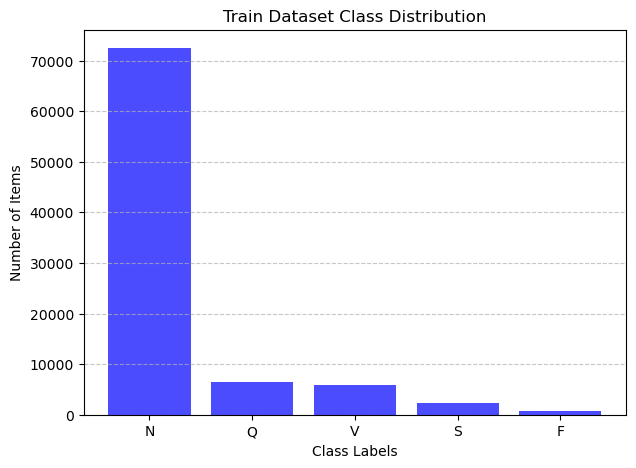


Test Class Distribution:
0.000000000000000000e+00.65
N    18117
Q     1608
V     1448
S      556
F      162
Name: count, dtype: int64

Test shape: (21891, 188)




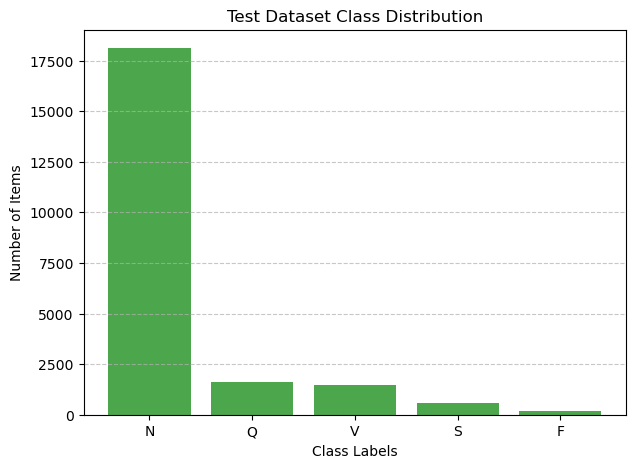

In [3]:
# Take a look at the dataset distribution
# Train
# We count the occurrences of each class label in the last column of the training dataset (which contains the labels)
train_class_counts = df.iloc[:, -1].map(label_names).value_counts()

print("Train Class Distribution:") # Header
print(train_class_counts) # Print the class counts in the training dataset
print("\nTrain shape:", df.shape)
print("\n")

# Plot Train Dataset Distribution
plt.figure(figsize=(7, 5))
plt.bar(train_class_counts.index, train_class_counts.values, color='blue', alpha=0.7) # Class labels on the x-axis and their counts on the y-axis
plt.title("Train Dataset Class Distribution") # Title
plt.xlabel("Class Labels") # x-axis
plt.ylabel("Number of Items") # y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -----------------------------------------------------------------------------------------

# Test
# We count the occurrences of each class label in the last column of the testing dataset (which contains the labels)
test_class_counts = df2.iloc[:, -1].map(label_names).value_counts()

print("\nTest Class Distribution:") # Header
print(test_class_counts) # Print the class counts in the testing dataset
print("\nTest shape:", df2.shape)
print("\n")

# Plot Test Dataset Distribution
plt.figure(figsize=(7, 5))
plt.bar(test_class_counts.index, test_class_counts.values, color='green', alpha=0.7) # Class labels on the x-axis and their counts on the y-axis
plt.title("Test Dataset Class Distribution") # Title
plt.xlabel("Class Labels") # x-axis
plt.ylabel("Number of Items") # y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Train Waveforms



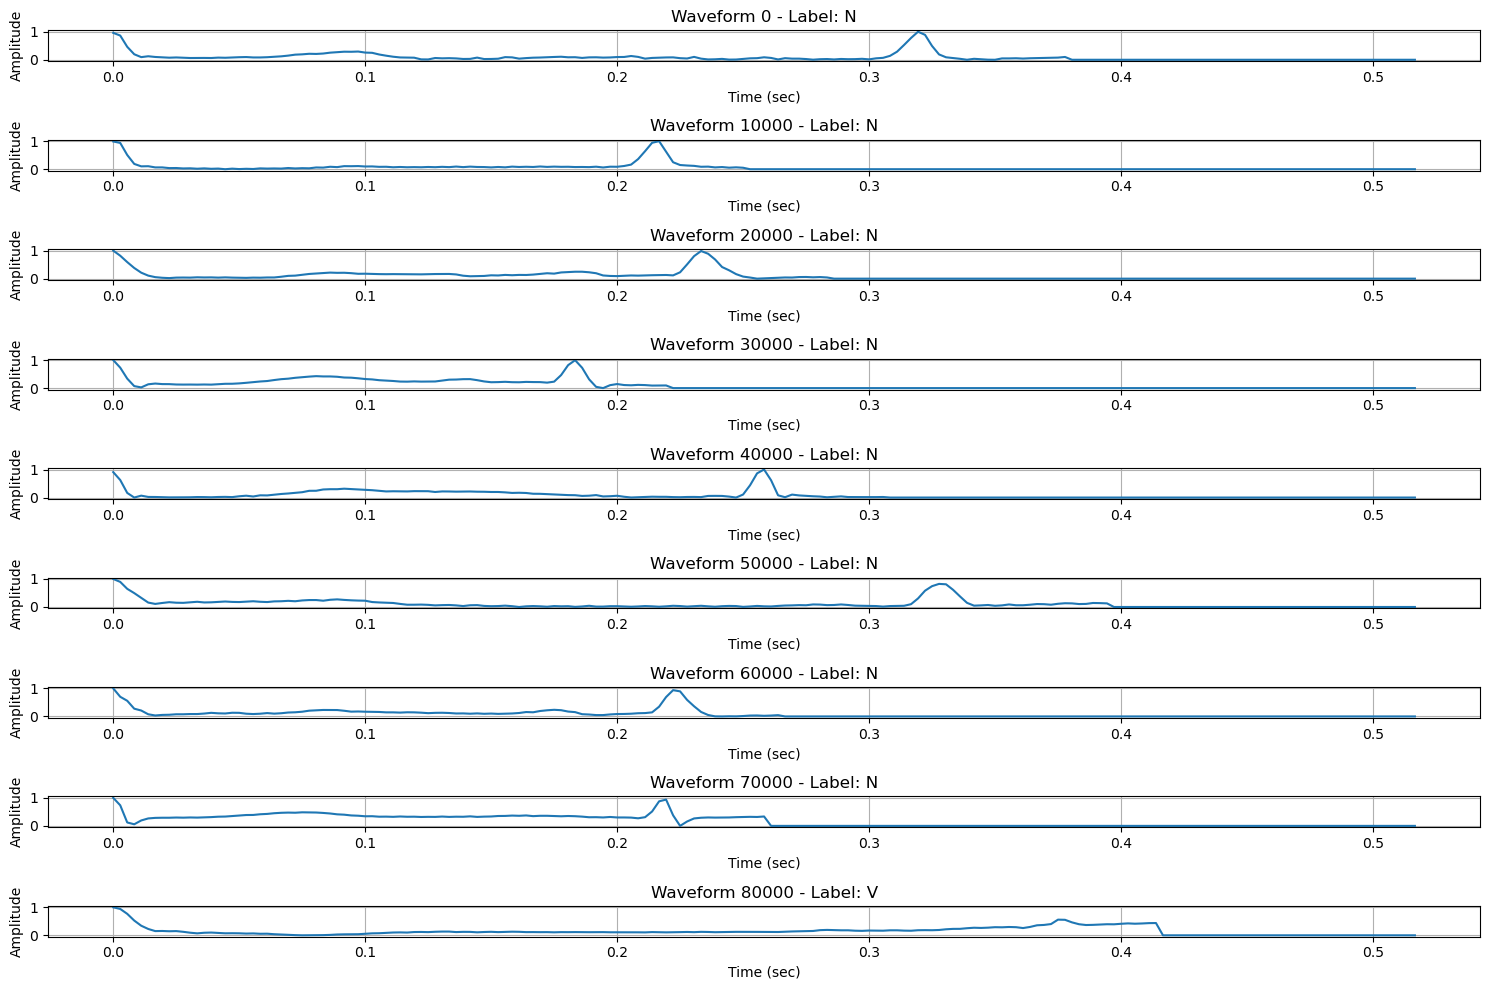


Test Waveforms



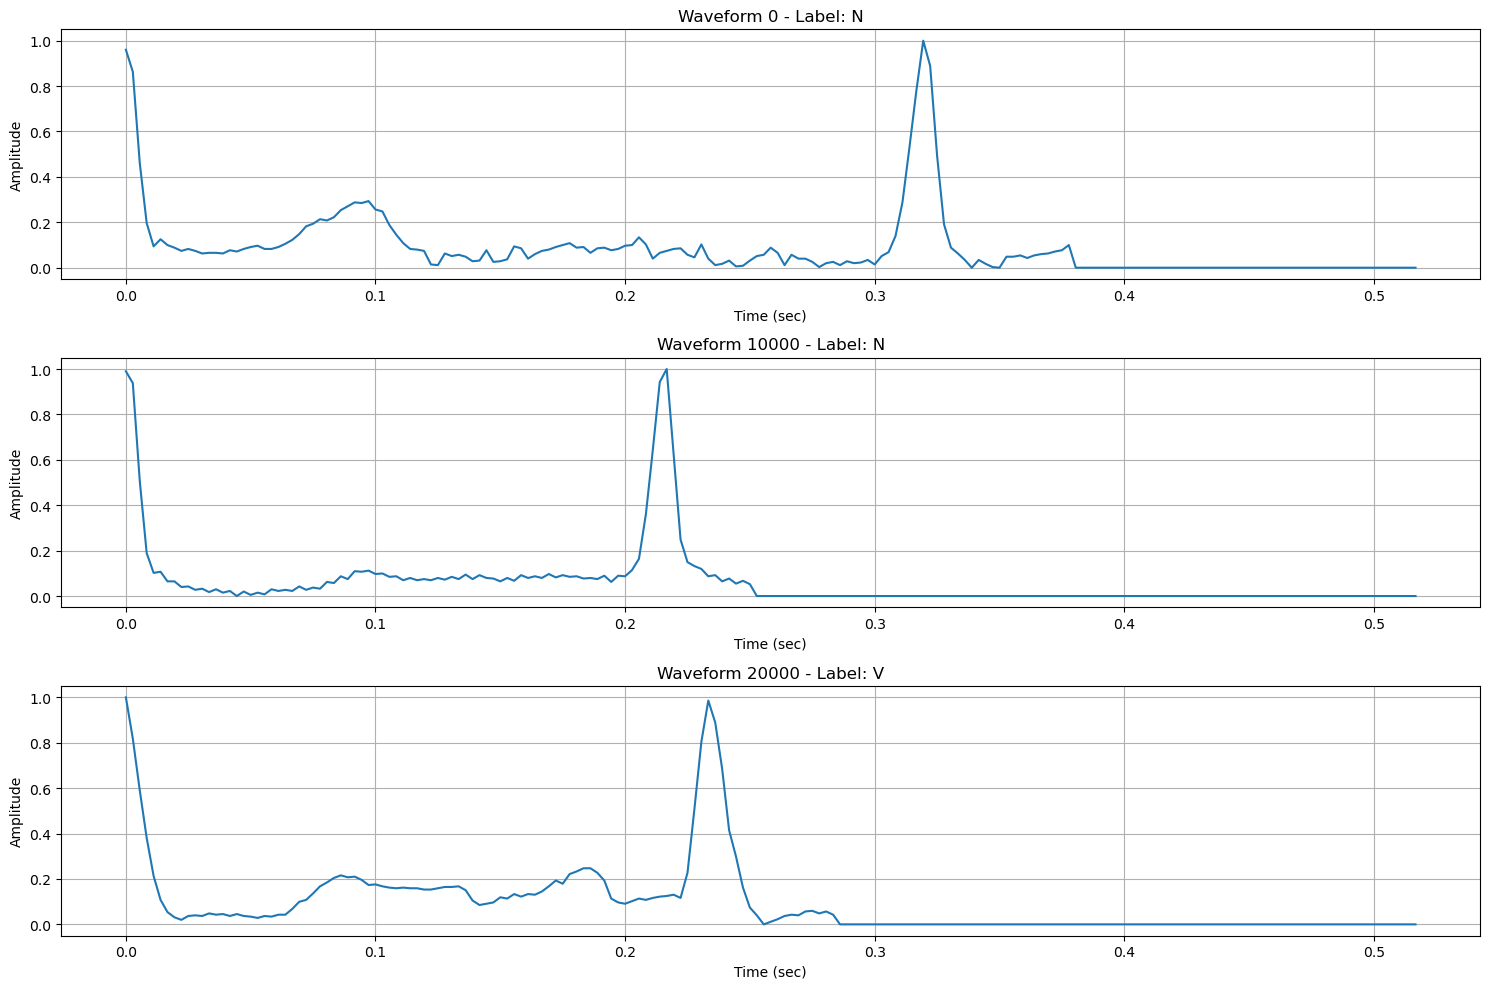

In [4]:
# Plot some ECG curves
# Sampling frequency in Hz 
Fs = 360 # This is a typical value for the MIT-BIH dataset.

# Defining indices for the range
first = 0  # First item of the dataset.
last = len(df)  # Last item of the dataset.

# We plot waveforms at intervals of 10,000 items
indices_to_plot = range(first, last, 10000) # Defines a range that selects every 10.000th index in the dataset. 

print("\nTrain Waveforms\n")
plt.figure(figsize=(15, 10)) # Set the figure size.
# Looping through the selected indices and, for each index, it creates a new subplot
for i, idx in enumerate(indices_to_plot, 1):
    plt.subplot(len(indices_to_plot), 1, i)  # Create a subplot for each waveform.
    
    # We extract the waveform
    waveform = df.iloc[idx, :-1] # Selecting all columns except the last one for the waveform data.
    
    # Time axis (in sec)
    time = np.arange(0, len(waveform)) / Fs # Divide sample indices by the sampling frequency to get time in seconds.
    
    # Plot the waveform, labeling the plot with the class name
    plt.plot(time, waveform, label=f'Label: {label_names[df.iloc[idx, -1]]}') # This plots the ECG waveform on the current subplot.
    plt.title(f"Waveform {idx} - Label: {label_names[df.iloc[idx, -1]]}") # This sets the title of each subplot.
    plt.xlabel("Time (sec)")  # X-axis label: time in seconds.
    plt.ylabel("Amplitude") # Y-axis label: amplitude (the value of the ECG signal).
    plt.grid()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------------------

last = len(df2)  # Last item of the dataset.

# We plot waveforms at intervals of 10,000 items
indices_to_plot = range(first, last, 10000) # Defines a range that selects every 10.000th index in the dataset. 

print("\nTest Waveforms\n")
plt.figure(figsize=(15, 10)) # Set the figure size.
# Looping through the selected indices and, for each index, it creates a new subplot
for i, idx in enumerate(indices_to_plot, 1):
    plt.subplot(len(indices_to_plot), 1, i)  # Create a subplot for each waveform.
    
    # We extract the waveform
    waveform = df.iloc[idx, :-1] # Selecting all columns except the last one for the waveform data.
    
    # Time axis (in sec)
    time = np.arange(0, len(waveform)) / Fs # Divide sample indices by the sampling frequency to get time in seconds.
    
    # Plot the waveform, labeling the plot with the class name
    plt.plot(time, waveform, label=f'Label: {label_names[df2.iloc[idx, -1]]}') # This plots the ECG waveform on the current subplot.
    plt.title(f"Waveform {idx} - Label: {label_names[df2.iloc[idx, -1]]}") # This sets the title of each subplot.
    plt.xlabel("Time (sec)")  # X-axis label: time in seconds.
    plt.ylabel("Amplitude") # Y-axis label: amplitude (the value of the ECG signal).
    plt.grid()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

Shape of train_df: (8755, 188)
Shape of test_df: (2189, 188)


Train DataFrame Class Distribution:
0.000000000000000000e+00.88
N    7247
S     222
V     579
F      64
Q     643
Name: count, dtype: int64

Test DataFrame Class Distribution:
0.000000000000000000e+00.65
N    1812
S      55
V     145
F      16
Q     161
Name: count, dtype: int64




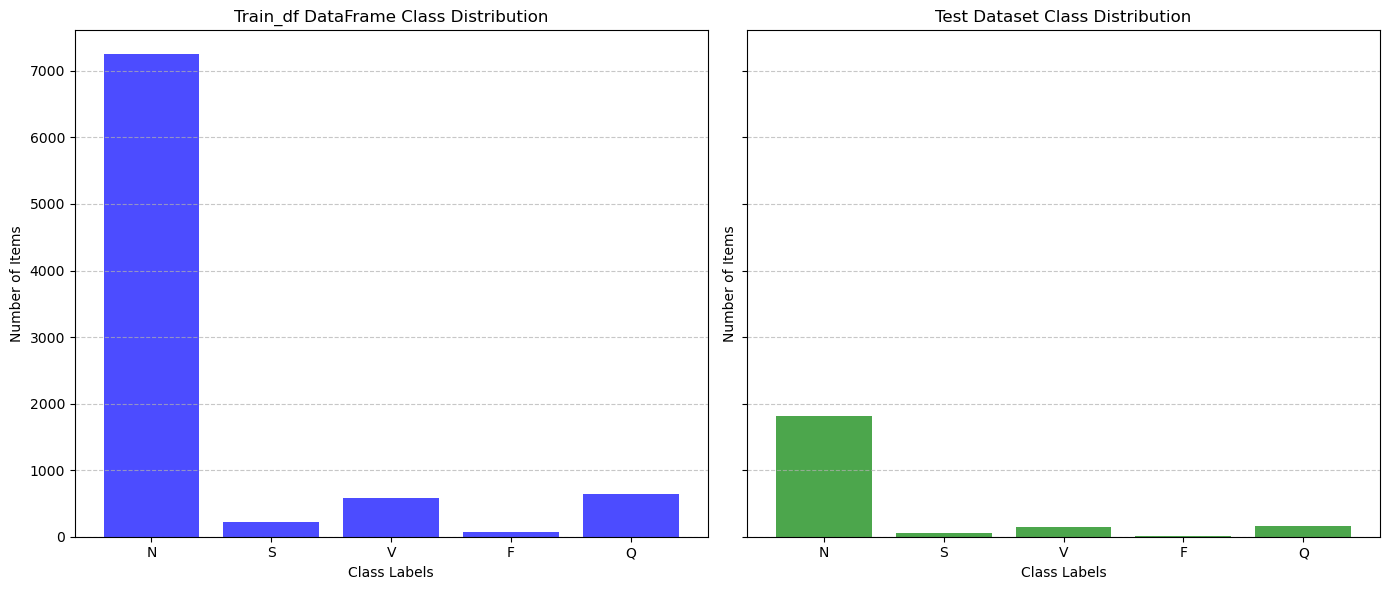


Train Waveforms



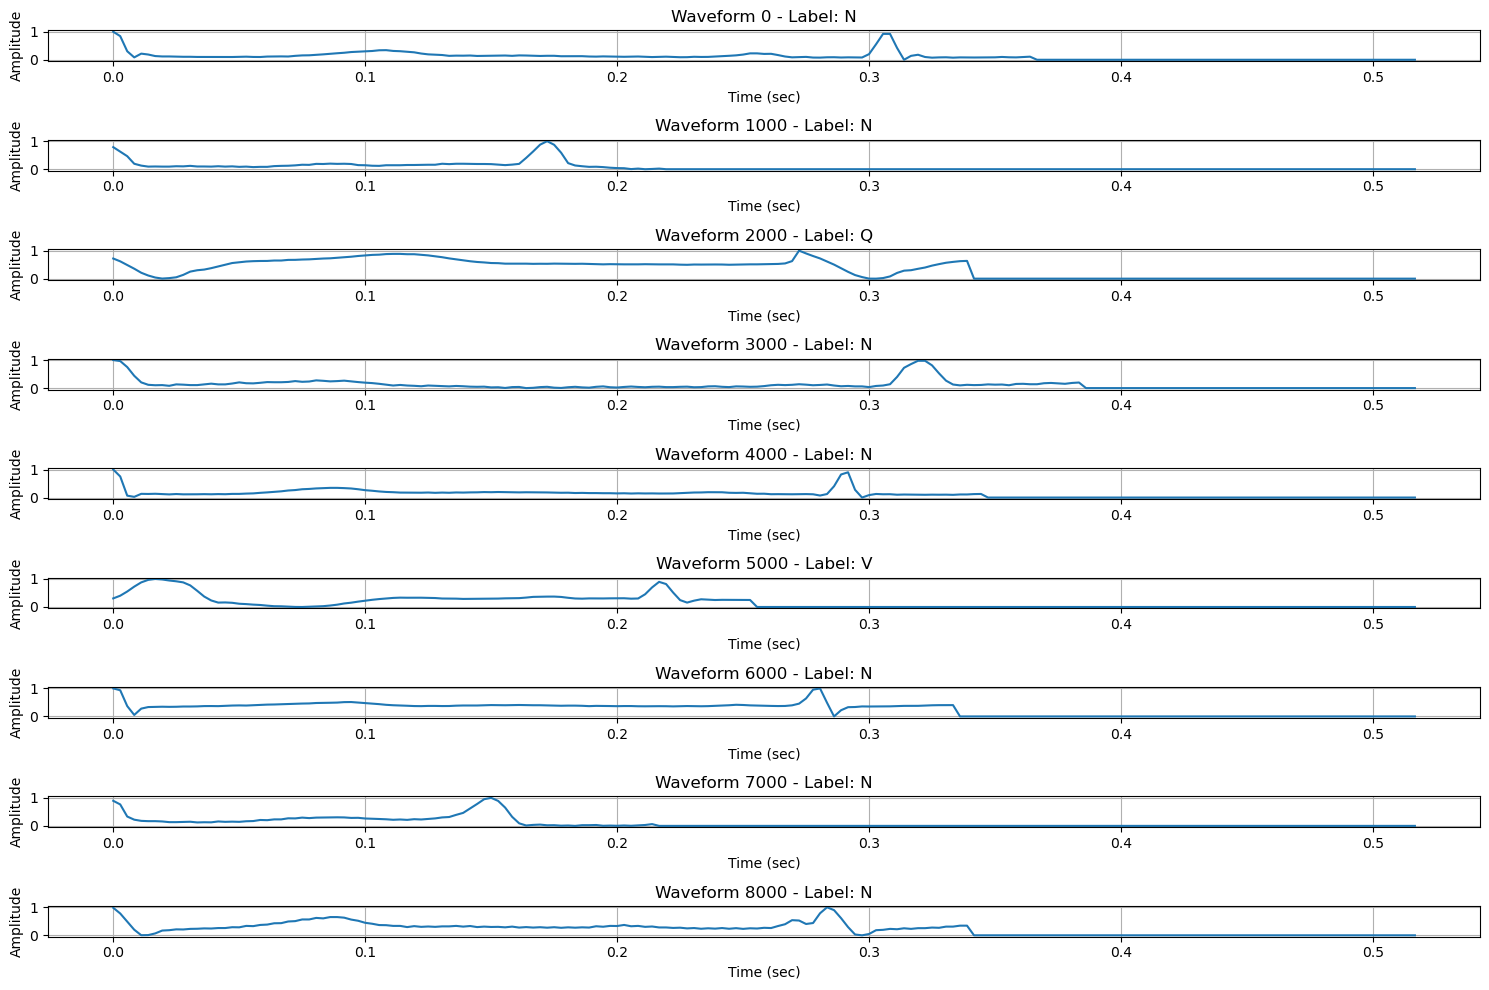


Test Waveforms



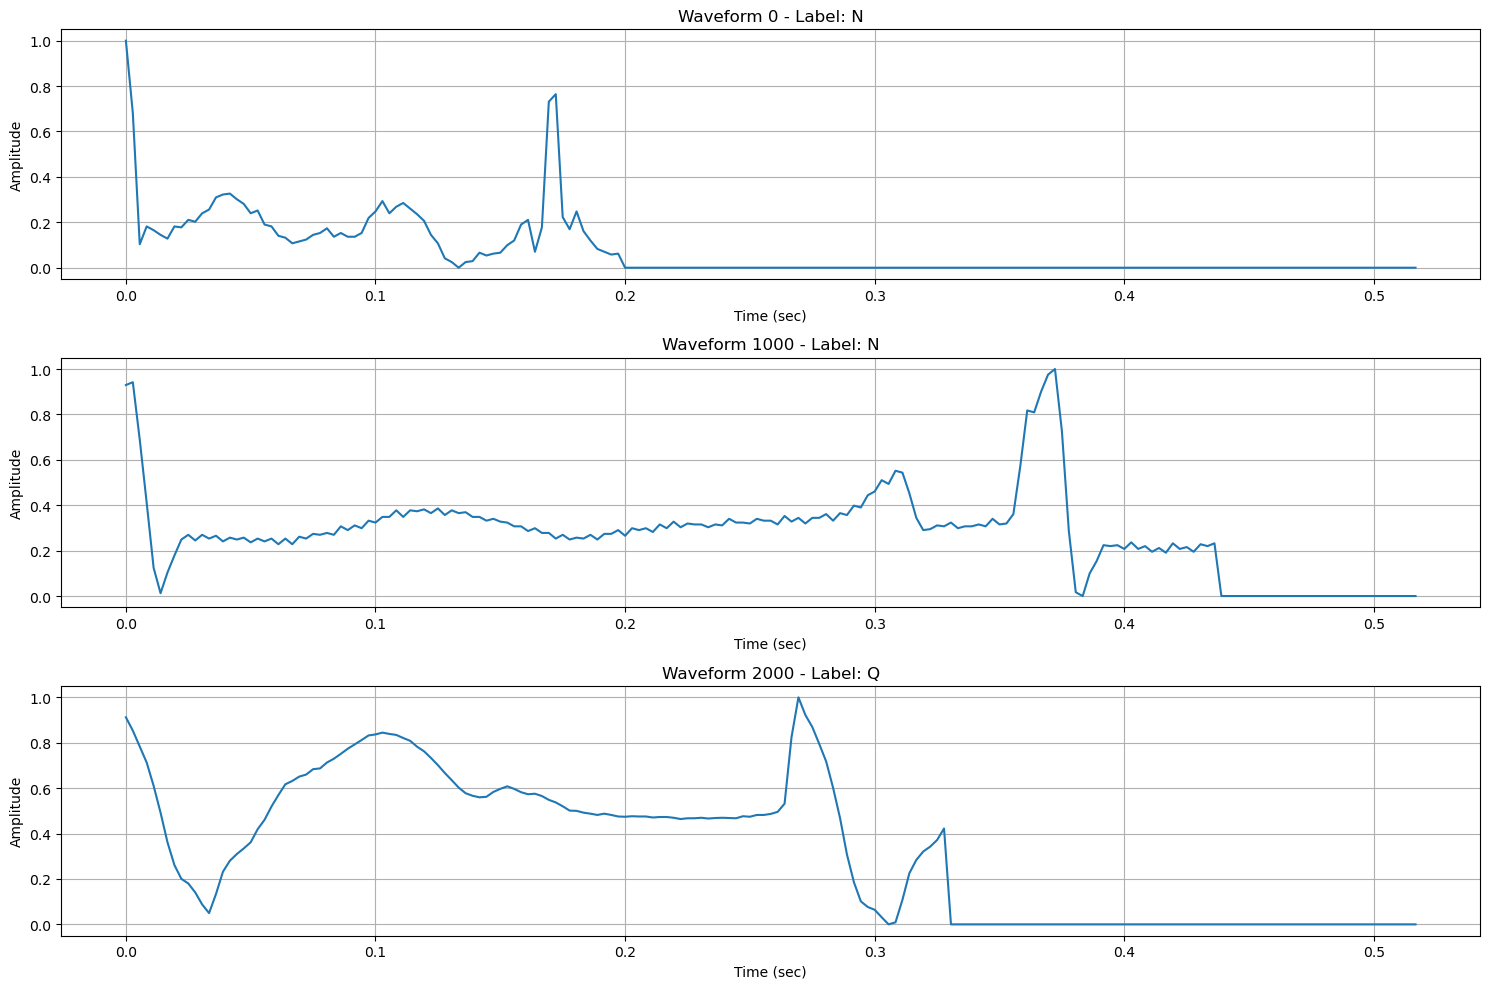



Shape of train_df (after removing label column): (8755, 187)
Shape of test_df (after removing label column): (2189, 187)
Shape of labels_train: (8755,)
Shape of labels_test: (2189,)


In [5]:
# Extract a subset of the dataset
# Importing train_test_split from sklearn to split the dataset into train and test subsets.
from sklearn.model_selection import train_test_split

# Train
# Splitting the training data (df) into a subset for training, second returned value is discarded.
# train_size=0.1 means 10% of the data will be used for training, and the rest will be discarded
# random_state is used for reproducibility (so the results are the same every time the code runs)
# The stratify argument ensures that the class distribution in the training set is the same as in the original dataset.
train_df, _ = train_test_split(df, train_size=0.1, random_state=28, stratify=df.iloc[:, -1])

# Test
# Splitting the testing data (df2) into a subset for testing, second returned value is discarded.
test_df, _ = train_test_split(df2, train_size=0.1, random_state=5, stratify=df2.iloc[:, -1])

# Print the shapes of train_df and test_df
print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)
print("\n")

# -----------------------------------------------------------------------------------------

# Repeat the last two points of the previous list (i.e., point 7 and point 8)
# Create the figure and axes for plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey=True ensures that both subplots share the same y-axis

# //Train
# Calculate the distribution of classes in the training dataset (train_df)
train_df_class_counts = train_df.iloc[:, -1].value_counts() # Last column contains the class labels
train_df_class_counts = train_df_class_counts.sort_index() # Sort the classes by their index in ascending numerical order
# Map the numeric labels to their respective names
train_df_class_counts.index = train_df_class_counts.index.map(label_names)

print("Train DataFrame Class Distribution:")
print(train_df_class_counts)

# Plot Train_df DataFrame Distribution
# Create a bar plot of the class distribution for the training dataset on the first subplot (axes[0])
axes[0].bar(train_df_class_counts.index, train_df_class_counts.values, color='blue', alpha=0.7)
axes[0].set_title("Train_df DataFrame Class Distribution") # Title
axes[0].set_xlabel("Class Labels") # x-axis
axes[0].set_ylabel("Number of Items") # y-axis
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# //Test
# Calculate the distribution of classes in the testing dataset (test_df)
test_df_class_counts = test_df.iloc[:, -1].value_counts()  # Last column contains the class labels
test_df_class_counts = test_df_class_counts.sort_index() # Sort the classes by their index in ascending numerical order
# Map the numeric labels to their respective names
test_df_class_counts.index = test_df_class_counts.index.map(label_names)

print("\nTest DataFrame Class Distribution:")
print(test_df_class_counts)
print("\n")

axes[1].bar(test_df_class_counts.index, test_df_class_counts.values, color='green', alpha=0.7)
axes[1].set_title("Test Dataset Class Distribution") # Title
axes[1].set_xlabel("Class Labels") # x-axis
axes[1].set_ylabel("Number of Items") # y-axis
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------------------
# Fs= 360 

# Define indices for the range
# first = 0  # First item
last = len(train_df)  # Last item of the dataframe

# //Train
# Plot waveforms at intervals of 10,000 items for train_df
indices_to_plot_train = range(first, last, 1000) # N.B. it will be just one plot with range(10000) because we have less than 10000 elements,
# so we have put 1000 to plot more waveforms.

print("\nTrain Waveforms\n")
plt.figure(figsize=(15, 10)) # Set the figure size for train waveforms.
# Looping through the selected indices and, for each index, it creates a new subplot
for i, idx in enumerate(indices_to_plot_train, 1):
    plt.subplot(len(indices_to_plot_train), 1, i) # Create a subplot for each waveform
    
    # We extract the waveform
    waveform = train_df.iloc[idx, :-1] # Select all columns except the last one for the waveform data.
    
    # Time axis (in sec)
    time = np.arange(0, len(waveform)) / Fs # Divide sample indices by the sampling frequency to get time in seconds.
    
    # Plot the waveform, labeling the plot with the class name
    plt.plot(time, waveform, label=f'Label: {label_names[train_df.iloc[idx, -1]]}')
    plt.title(f"Waveform {idx} - Label: {label_names[train_df.iloc[idx, -1]]}")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# //Test
# Plot waveforms at intervals of 10,000 items for test_df
indices_to_plot_test = range(first, len(test_df), 1000) # N.B. it will be just one plot with range(10000) because we have less than 10000 elements,
# so we have put 1000 to plot more waveforms.

print("\nTest Waveforms\n")
plt.figure(figsize=(15, 10)) # Set the figure size for test waveforms.
# Looping through the selected indices and, for each index, it creates a new subplot
for i, idx in enumerate(indices_to_plot_test, 1):
    plt.subplot(len(indices_to_plot_test), 1, i) # Create a subplot for each waveform
    
    # We extract the waveform
    waveform = test_df.iloc[idx, :-1] # Select all columns except the last one for the waveform data.
    
    # Time axis (in sec)
    time = np.arange(0, len(waveform)) / Fs # Divide sample indices by the sampling frequency to get time in seconds.
    
    # Plot the waveform, labeling the plot with the class name
    plt.plot(time, waveform, label=f'Label: {label_names[test_df.iloc[idx, -1]]}')
    plt.title(f"Waveform {idx} - Label: {label_names[test_df.iloc[idx, -1]]}")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------------------

# We remove the label column from train_df and store it in labels_train
labels_train = train_df.iloc[:, -1].tolist() # Last column is the label
train_df = train_df.drop(columns=train_df.columns[-1]) # Removing the last column

# We remove the label column from test_df and store it in labels_test
labels_test = test_df.iloc[:, -1].tolist() # Last column is the label
test_df = test_df.drop(columns=test_df.columns[-1]) # Removing the last column

# Printing the new shapes...
print("\n")
print("Shape of train_df (after removing label column):", train_df.shape)  # Expected: (8755, 187)
print("Shape of test_df (after removing label column):", test_df.shape)  # Expected: (2189, 187)
print("Shape of labels_train:", np.shape(labels_train))  # Expected: (8755,)
print("Shape of labels_test:", np.shape(labels_test))  # Expected: (2189,)

## Question 2

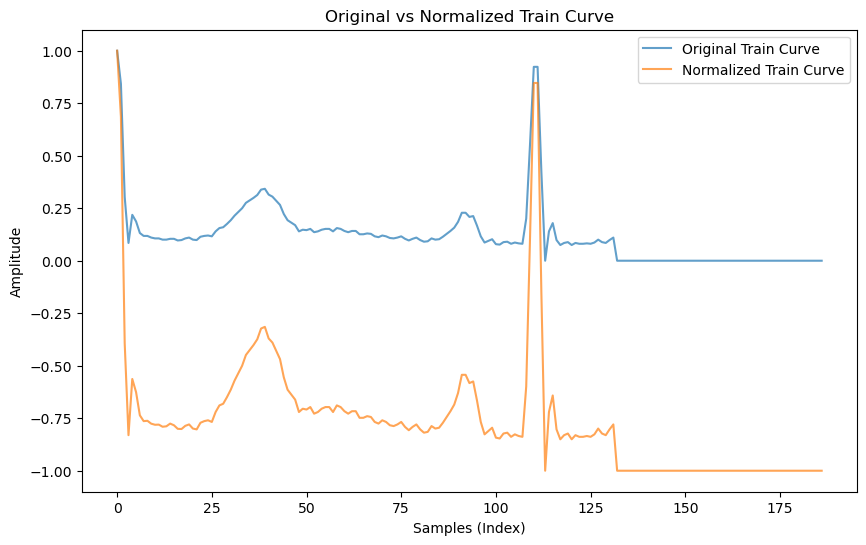



Shape of train_set: (8755, 187)
Shape of test_set: (2189, 187)


In [6]:
# Preprocessing ...
# We need to import the necessary class for scaling
from sklearn.preprocessing import MinMaxScaler

# We convert train_df and test_df to lists of waveforms
train_list = train_df.values.tolist()  # (Each row is a waveform)
test_list = test_df.values.tolist()    # (Each row is a waveform)

# Initialization of the MinMaxScaler with a feature range of (-1, 1)
# In this way, the scaler will normalize each feature (column) of the dataframe to be between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# We apply MinMax scaling to the training data
train_set = scaler.fit_transform(train_list) # Fit and transform the training data.

# We apply the same scaling to the test data (transform only, without fitting)
# The test data should be scaled using the parameters learned from the training data
test_set = scaler.transform(test_list)  # Only transform using parameters from the train set.

# Plotting
plt.figure(figsize=(10, 6))

# Plot the first waveform from the original train data (before normalization)
# This will show us the raw waveform before any scaling is applied.
plt.plot(train_list[0], label="Original Train Curve", alpha=0.7)

# Plot the first waveform from the normalized train data (after MinMax normalization)
# This will show us the waveform after applying the MinMaxScaler normalization.
plt.plot(train_set[0], label="Normalized Train Curve", alpha=0.7)

# Add labels, title, and legend to the plot
plt.xlabel("Samples (Index)")
plt.ylabel("Amplitude")
plt.title("Original vs Normalized Train Curve")
plt.legend()

# Show the plot
plt.show()

# Verify the shape of the preprocessed data
print("\n")
print("Shape of train_set:", train_set.shape)
print("Shape of test_set:", test_set.shape)

In [7]:
def compute_feature_vector(x, Fs, N=64, H=16):
    """Compute the feature vector from an ECG signal.

    Args:
        x: Input signal (ECG waveform).
        Fs: Sampling rate (in Hz).
        N: Window length (number of samples per window).
        H: Hop size (number of samples between consecutive windows).

    Returns:
        f_vector: Feature vector (numpy array with concatenated features).
    """
    # 1. Mean and standard deviation of the ECG signal
    mean_x = np.mean(x)
    std_x = np.std(x)
    
    # 2. Zero-crossing rate using librosa's feature function
    zero_crossing_rate_frames = librosa.feature.zero_crossing_rate(x, frame_length=N, hop_length=H)[0]
    zero_crossing_rate_mean = np.mean(zero_crossing_rate_frames)
    zero_crossing_rate_std = np.std(zero_crossing_rate_frames)

    # 3. Short-Time Fourier Transform (STFT)
    C = np.abs(librosa.stft(x, n_fft=N, hop_length=H))  # Magnitude of the STFT

    # 4. Spectral flux
    spectral_flux = librosa.onset.onset_strength(S=librosa.amplitude_to_db(C, ref=np.max))
    spectral_flux_mean = np.mean(spectral_flux)
    spectral_flux_std = np.std(spectral_flux)

    # 5. Concatenate all computed features into a single feature vector
    f_vector_stats = np.array([mean_x, std_x, 
                                zero_crossing_rate_mean, zero_crossing_rate_std, 
                                spectral_flux_mean, spectral_flux_std])
    
    # Include detailed per-frame features
    f_vector_details = np.concatenate([zero_crossing_rate_frames, spectral_flux])

    # Combine statistics and detailed features
    f_vector = np.concatenate([f_vector_stats, f_vector_details])
    
    return f_vector

Feature vector for the first waveform: [-7.59548132e-01  3.01234854e-01  1.30208333e-02  1.24891446e-02
  2.56899988e+00  4.11357552e+00  1.56250000e-02  1.56250000e-02
  1.56250000e-02  0.00000000e+00  0.00000000e+00  1.56250000e-02
  3.12500000e-02  3.12500000e-02  3.12500000e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.41137775e-01  6.37425960e-03  2.47043456e+00
  4.65721359e-01  7.24641376e+00  1.37987632e+01  5.70304032e+00
  5.72504925e-01  2.23608435e-01]




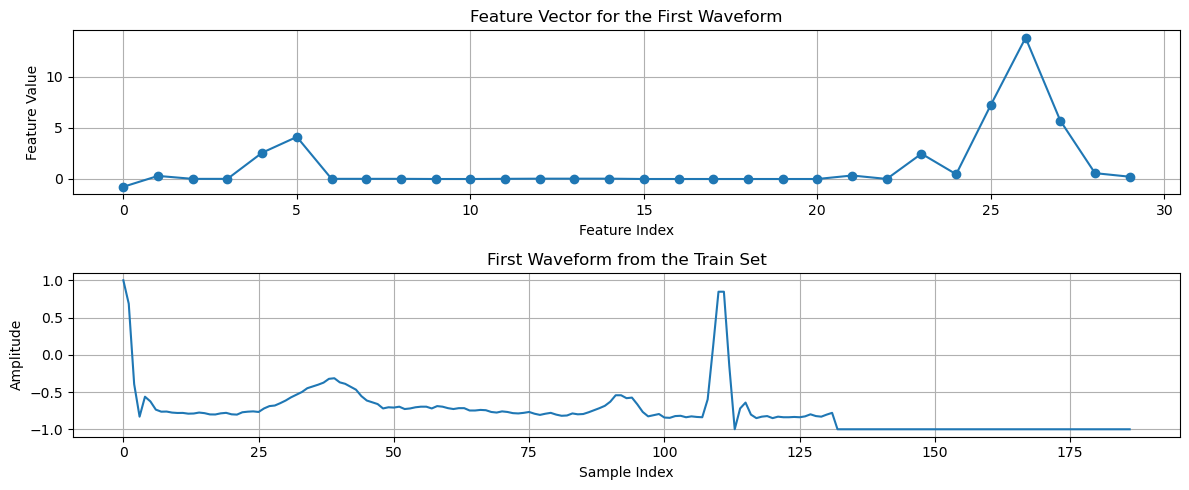

In [12]:
# Compute the feature vector for the first waveform
x_first = train_set[0]  # Example: first waveform from the train set
Fs = 360  # Sampling frequency in Hz
f_vector_first = compute_feature_vector(x_first, Fs)

# Print the computed feature vector
print("Feature vector for the first waveform:", f_vector_first)
print("\n")

# Plot the first waveform from the train set
plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.plot(f_vector_first, marker='o')
plt.title("Feature Vector for the First Waveform")
plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.grid(True)

# Plot the feature vector
plt.subplot(2, 1, 2)
plt.plot(x_first)
plt.title("First Waveform from the Train Set")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [9]:
# Compute feature vector for both training and test sets
N = 64 # Window length (number of samples per window).
H = 16 # Hop size (number of samples between consecutive windows).
Fs = 360

# We initialize empty lists to store feature vectors for training and test sets
train_fvector = []
test_fvector = []

# Train
print("Computing feature vectors for the training set...")
# Looping over each ECG waveform in the training set
for x in tqdm(train_set, desc="Train Set Processing"):
    # For each waveform (x), we compute the feature vector
    f_vector = compute_feature_vector(x, Fs, N, H)
    # The computed feature vector is append to the train_fvector list
    train_fvector.append(f_vector)
    
# Test
print("\nComputing feature vectors for the test set...")
# Looping over each ECG waveform in the testing set
for x in tqdm(test_set, desc="Test Set Processing"):
    # For each waveform (x), we compute the feature vector
    f_vector = compute_feature_vector(x, Fs, N, H)
    # The computed feature vector is append to the test_fvector list
    test_fvector.append(f_vector)

# We need to convert the lists to numpy arrays to check the shape of the feature vectors
train_fvector = np.array(train_fvector)
test_fvector = np.array(test_fvector)

# Checking the shapes of the feature vectors ...
print(f"\nShape of train_fvector: {train_fvector.shape}")
print(f"Shape of test_fvector: {test_fvector.shape}")
print("The shape of the fvectors have the same number of rows of the previous train_set/test_set.")

Computing feature vectors for the training set...


Train Set Processing: 100%|███████████████████████████████████████████████████████| 8755/8755 [00:23<00:00, 364.95it/s]



Computing feature vectors for the test set...


Test Set Processing: 100%|████████████████████████████████████████████████████████| 2189/2189 [00:05<00:00, 374.04it/s]


Shape of train_fvector: (8755, 30)
Shape of test_fvector: (2189, 30)
The shape of the fvectors have the same number of rows of the previous train_set/test_set.


## Question 3

In [10]:
# Importing Support Vector Classification (SVC) from sklearn
from sklearn.svm import SVC

# Define model parameters
kernel = 'rbf' # The kernel function used by the SVC model,'rbf' stands for Radial Basis Function.
# Regularization parameter
C = 10 # This controls the trade-off between achieving a low error on the training data and minimizing the model complexity.

# We can now initialize the SVC model with the specified kernel and C parameter
model = SVC(C=C, kernel=kernel)

# Training our SVC
# The 'train_fvector' contains the feature vectors for the training set, 
# and 'labels_train' contains the labels (true classes) for training samples.
model.fit(train_fvector, labels_train)

# Making predictions on the training set
train_predictions = model.predict(train_fvector)

# Create the directory to save the model if it doesn't exist
# This is just to checks if the directory 'my_model' already exists. If not, it creates the directory.
model_dir = "my_model"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the trained model using joblib
model_filename = f"{model_dir}/svc_{kernel}_C_{C}_N_64_H_16"
joblib.dump(model, model_filename)

# Printing the location where the model is saved
print(f"Model saved to: {model_filename}") # This confirms us the model has been saved successfully and shows the path where it is stored.

Model saved to: my_model/svc_rbf_C_10_N_64_H_16


In [11]:
# We can print the accuracy on the training set
# 'labels_train' contains the true labels for the training set.
# 'train_predictions' contains the predicted labels for the training set.

# The function compares the two arrays element-wise and calculates the proportion of correct predictions.
train_accuracy = accuracy_score(labels_train, train_predictions)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 89.22%


In [12]:
# Classify the test set
# The 'predict' method of the trained model is used to make predictions on the test set.
test_predictions = model.predict(test_fvector)

Testing Accuracy: 88.94%




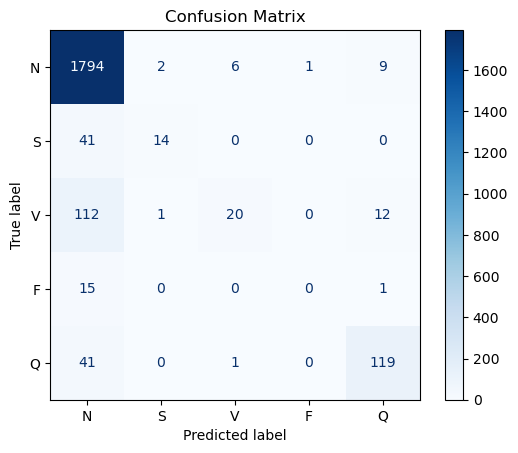

In [13]:
# Importing elements in order to build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Print the accuracy on the test set
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print("\n")

# -----------------------------------------------------------------------------------------
# We found out that the function plot_confusion_matrix is removed since version 1.2 of sklearn ...

# cm = confusion_matrix(labels_test, test_predictions)
# plt.figure(figsize=(10, 7))

# plot_confusion_matrix(model, test_set, labels_test, 
#                      cmap=plt.cm.Blues, 
#                      display_labels=label_names.values())

# plt.title("Confusion Matrix")
# plt.show()
# -----------------------------------------------------------------------------------------

# Now we can plot the confusion matrix
# Predictions on the test set
test_predictions = model.predict(test_fvector)

# 'ConfusionMatrixDisplay.from_estimator' automatically computes and displays the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    estimator = model,          # The trained model (estimator)
    X = test_fvector,           # The test features (input data for predictions)
    y = labels_test,            # The true labels for the test set (ground truth)
    display_labels = label_names.values(), # Labels for the classes
    cmap ='Blues'              # Color map for the confusion matrix
)

# Adding a title to the plot
disp.ax_.set_title("Confusion Matrix")
plt.show()

In [14]:
# Importing the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# Classification report
# The 'classification_report' function computes several classification metrics (precision, recall, F1-score, support) for each class.
# The function takes the true labels ('labels_test') and the predicted labels ('test_predictions') as input.
report = classification_report(labels_test, test_predictions, target_names=[label_names[i] for i in range(5)], zero_division=0) 
# The result is a detailed report of the classification performance for each class.

# Printing our classification report
print(report)

conf_matrix = confusion_matrix(labels_test, test_predictions)

# True Positives (TP):
# True Positives represent the cases where the model correctly predicts the presence of the class.
# This is simply the diagonal elements of the confusion matrix.
true_positives = np.diag(conf_matrix)

# False Positives (FP):
# False Positives represent the cases where the model incorrectly predicts the presence of a class.
false_positives = conf_matrix.sum(axis=0) - np.diag(conf_matrix)

# False Negatives (FN):
# False Negatives represent the cases where the model incorrectly predicts the absence of a class.
false_negatives = conf_matrix.sum(axis=1) - np.diag(conf_matrix)

# True Negatives (TN):
# True Negatives represent the cases where the model correctly predicts the absence of the class.
true_negatives = conf_matrix.sum() - (false_positives + false_negatives + true_positives)

# Printing the total True Positives across all classes...
total_true_positives = true_positives.sum()
# Printing the total True Negative across all classes...
total_true_negatives = true_negatives.sum()
# Printing the total False Positives across all classes...
total_false_positives = false_positives.sum()
# Printing the total False Negatives across all classes...
total_false_negatives = false_negatives.sum()

print(f"Total True Positives: {total_true_positives}")
print(f"Total True Negatives: {total_true_negatives}")
print(f"Total False Positives: {total_false_positives}")
print(f"Total False Negatives: {total_false_negatives}") # Apart from the true positive, this is the other value we care the most

              precision    recall  f1-score   support

           N       0.90      0.99      0.94      1812
           S       0.82      0.25      0.39        55
           V       0.74      0.14      0.23       145
           F       0.00      0.00      0.00        16
           Q       0.84      0.74      0.79       161

    accuracy                           0.89      2189
   macro avg       0.66      0.42      0.47      2189
weighted avg       0.87      0.89      0.86      2189

Total True Positives: 1947
Total True Negatives: 8514
Total False Positives: 242
Total False Negatives: 242


## Question 4

In [15]:
# //Train

# We initialize an empty DataFrame to hold the balanced train set
train_df = pd.DataFrame()

# First, we neede to extract the labels from the last column of df
labels_train = df.iloc[:, -1]  # (Assuming the last column contains the labels)

# Looping over each unique class label in the labels_train
for class_label in labels_train.unique():  # Iterating over unique class labels.
    # Use boolean indexing to get all rows corresponding to the current class label in df
    class_df = df[labels_train == class_label] # Filter the data by class label
    
    sample_class_df = class_df.sample(n=641, random_state=42) # Randomly sample 641 instances.
    
    # We concatenate the sampled class data into the train_df DataFrame
    train_df = pd.concat([train_df, sample_class_df])

# Reset the index of the resulting test DataFrame ...
train_df = train_df.reset_index(drop=True)

# Checking the shape of the balanced test DataFrame
print(f"Train DataFrame shape (641 instances * 5 classes): {train_df.shape}")
print(train_df.iloc[:, -1].map(label_names).value_counts())
# //Test
# We initialize an empty DataFrame for the balanced test set
test_df = pd.DataFrame()

# Extract the labels from the last column of df2
labels_test = df2.iloc[:, -1] # (Assuming the last column contains the labels)

# Loop over each unique class label in the labels_test
for class_label in labels_test.unique():  # Iterating over unique class labels.
    # Use boolean indexing to get all rows corresponding to the current class label in df2
    class_df = df2[labels_test == class_label]  # Direct boolean indexing
    
    sample_class_df = class_df.sample(n=162, random_state=42) # Randomly sample 641 instances.
    
    # We concatenate the sampled class data into the test_df DataFrame
    test_df = pd.concat([test_df, sample_class_df])

# Reset the index of the resulting test DataFrame ...
test_df = test_df.reset_index(drop=True)

# Checking the shape of the balanced test DataFrame
print(f"\nTest DataFrame shape (162 instances * 5 classes): {test_df.shape}")
print(test_df.iloc[:, -1].map(label_names).value_counts())

Train DataFrame shape (641 instances * 5 classes): (3205, 188)
0.000000000000000000e+00.88
N    641
S    641
V    641
F    641
Q    641
Name: count, dtype: int64

Test DataFrame shape (162 instances * 5 classes): (810, 188)
0.000000000000000000e+00.65
N    162
S    162
V    162
F    162
Q    162
Name: count, dtype: int64


In [16]:
from scipy.signal import resample

# Define Augmentation class
class augment:
    def __init__(self):
        pass

    def stretch(self, x):
        """
        Stretches the input signal `x` by resampling it to a new length based on a random factor.
        """
        # This will generate random value beta in range [0, 1]
        beta = random.random()

        # We calculate a new length `l` for the signal, with variation around 187.
        l = int(187 * (1 + beta - 0.5)**3)

        # Resampling the signal to the new length l
        y = resample(x, l)

        # Then, we create an array of zeros with length 187
        y1 = np.zeros(187)

        # If l < 187, copy the resampled signal into the first l elements of y1
        if l < 187:
            y1[:l] = y
        else:
            # Truncate the resampled signal if it's longer than 187
            y1[:187] = y[:187]  # Ensure we truncate if the resampled signal is too long

        # Return the adjusted signal `y1`, which is always 187 elements long
        return y1

    def amplify(self, x):
        """
        Amplifies the input signal `x` by applying a random factor between -0.5 and 0.5.
        """
        # Convert x to a numpy array if it's not already
        x = np.array(x)
        
        # Generate random alpha in range [-0.5, 0.5]
        alpha = random.uniform(-0.5, 0.5)
        
        # Multiply the input signal by the factor (1 + alpha)
        # This will scale the signal by a factor between 0.5 and 1.5, introducing random amplification or attenuation
        return x * (alpha + 1)

    def perform(self, x):
        """
        Randomly applies the stretch and/or amplify augmentations to the signal `x`.
        """
        performed_augmentations = []  # Initialization of an empty list to track applied augmentations
        
        # Apply the stretch augmentation with a 50% probability
        if np.random.binomial(1, 0.5) == 1:
            x = self.stretch(x) # Apply stretch
            performed_augmentations.append('stretch')  # Track that stretch was applied

        # Apply the amplify augmentation with a 50% probability
        if np.random.binomial(1, 0.5) == 1:
            x = self.amplify(x) # Apply amplify
            performed_augmentations.append('amplify')  # Track that amplify was applied

        # Return the modified signal and the list of augmentations performed
        return x, performed_augmentations  

In [17]:
# New datasets
augmenter = augment()

# Train
x = train_list[0][:-1]  # Access the first element and remove the last column

Applied augmentations: ['stretch']




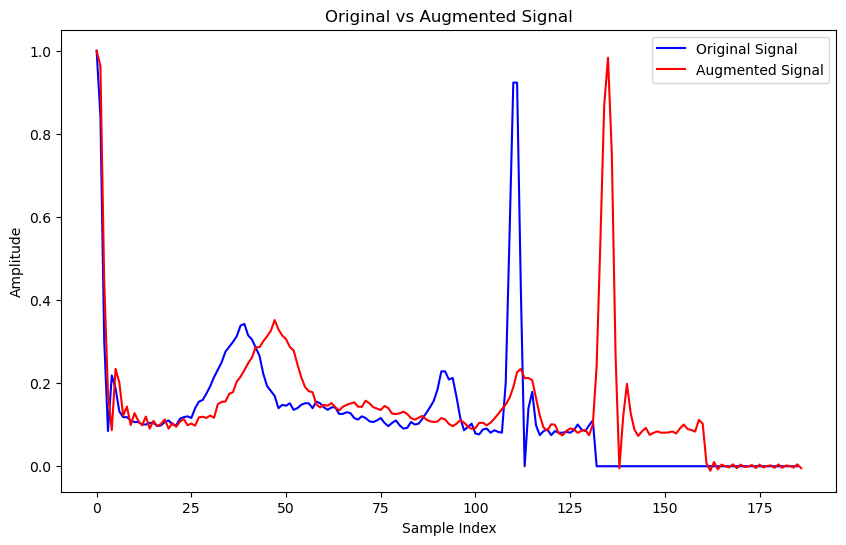

In [19]:
# Test augment class

# Apply the augmentations to the signal `x` using the 'perform' method from the 'augment' class
augmented_signal, augmentations = augmenter.perform(x) # This will return the augmented signal and the list of applied augmentations.

# Print which augmentations were applied to the signal
print(f"Applied augmentations: {augmentations}")
print("\n")

plt.figure(figsize=(10, 6))
# Plot the original signal with a blue color
plt.plot(x, label='Original Signal', color='blue')
# Plot the augmented signal with a red color
plt.plot(augmented_signal, label='Augmented Signal', color='red')

# Add Title, Labels and Legend
plt.title('Original vs Augmented Signal')
plt.xlabel('Sample Index') # x-axis
plt.ylabel('Amplitude') # y-axis
plt.legend()
plt.show()

In [20]:
# Augment the train dataset
# Number of augmented samples per class
n_aug = 100  # This means that for each class, we will generate 100 augmented samples.

In [21]:
# Sample the data for each class and apply the augmentation
# First, we create a list to store augmented signals and their classes
augmented_signals = []
train_labels = train_df.iloc[:, -1].values  # Last column (label)

# Looping through each unique class in the 'class' column
for label in np.unique(train_labels):
    # Check for initial possible NaN values
    if pd.isna(label):
        print(f"Warning: Missing class label for signal!")
        
    # We exctract the signals belonging to the current class
    class_subset = train_df[train_labels == label] # Filtering the data

    # Sampling `n_aug` signals from the current class
    sampled_signals = class_subset.sample(n=n_aug, random_state=16, replace=False)

    # Now, we can apply augmentation to each sampled signal
    for _, row in sampled_signals.iterrows():
        # This exclude the last column ('class') and only take the signal (assumed to be in 'signal' column)
        signal = row.iloc[:-1] # Removes the last column (label column)

        # Apply the augmentation to the signal (using the perform method)
        augmented_signal, applied_augmentations = augmenter.perform(signal)

        # Checking if the augmentation is working good
        if np.isnan(augmented_signal).any():
            print(f"Warning: NaN detected in augmented signal for class {label}")
         
        # Finally, we store the augmented signal and its corresponding class label
        augmented_signals.append({
            'signal': augmented_signal,  # Store the augmented signal
            'class': label         # Store the class label of the signal
        })

# Converting the list of augmented signals into a DataFrame...
augmented_df = pd.DataFrame(augmented_signals)

# Now concatenate this augmented DataFrame with the original train_df
train_df = pd.concat([train_df, augmented_df], ignore_index=True)
train_labels = np.concatenate([train_labels, augmented_df['class'].values])  # Concatenate original and augmented labels

# Then, we ensure an equal counts per class 
class_counts = train_df['class'].map(label_names).value_counts() # (after augmentation, you should have the same number of samples per class)

# We need to remove the label column from train_df
train_df = train_df.drop(columns=['signal','class'])  # Remove the last column

# Print the counts for each class after augmentation
print("Number of augmented signals for each class:")
print(class_counts)

# Print the shape of the Train DataFrame
print("\nShape of train_df after Augmentation:")
print(train_df.shape) # Expected (3705, 188)
# print(test_df.shape)   

# Optional: Verify the total number of samples and the feature count (should be 188 if the augmentation was applied correctly)
total_samples = train_df.shape[0]
feature_count = train_df.shape[1]
print(f"\nTotal Samples: {total_samples}, Feature Count: {feature_count}")

Number of augmented signals for each class:
class
N    100
S    100
V    100
F    100
Q    100
Name: count, dtype: int64

Shape of train_df after Augmentation:
(3705, 188)

Total Samples: 3705, Feature Count: 188


In [22]:
# //Train
# We separate features and labels for train_df
train_features = train_df.iloc[:, :-1].values  # All columns except the last one (features)

# We convert to list of features and labels
train_features_list = train_features.tolist()  # Convert features to list
train_labels_list = train_labels.tolist()  # Convert labels to list

# Now train_list is a list of tuples (features, label)
train_list = list(zip(train_features_list, train_labels_list))

# Printing train_list
# print(f"(CHECK) Train list length: {len(train_list)}")

# //Test
# We separate features and labels for test_df
test_features = test_df.iloc[:, :-1].values  # All columns except the last one (features)
test_labels = test_df.iloc[:, -1].values  # Last column (label)

# We convert to list of features and labels
test_features_list = test_features.tolist()  # Convert features to list
test_labels_list = test_labels.tolist()  # Convert labels to list

# Now test_list is a list of tuples (features, label)
test_list = list(zip(test_features_list, test_labels_list))

# Printing test_list length
# print(f"(CHECK) Test list length: {len(test_list)}")

# -----------------------------------------------------------------------------------------

# Creating and fit the MinMaxScaler on the train_df
scaler = MinMaxScaler()

# We fit the scaler on the training data (train_features) to learn the min and max values for each feature
train_features_scaled = scaler.fit_transform(train_features)

# Now, we can apply the MinMaxScaler to the test_df using the scaling parameters learned from train_df
test_features_scaled = scaler.transform(test_features)

# Convert the normalized (scaled) data back into DataFrames
train_scaled_df = pd.DataFrame(train_features_scaled, columns=train_df.columns[:-1]) # Excluding label column
train_scaled_df['label'] = train_labels  # Add the label column

test_scaled_df = pd.DataFrame(test_features_scaled, columns=test_df.columns[:-1]) # Excluding label column
test_scaled_df['label'] = test_labels  # Add the label column

# Converting train_scaled_df and test_scaled_df into lists
train_list = list(zip(train_scaled_df.iloc[:, :-1].values.tolist(), train_scaled_df['label'].tolist()))
test_list = list(zip(test_scaled_df.iloc[:, :-1].values.tolist(), test_scaled_df['label'].tolist()))

# Printing the length
print(f"Train list length: {len(train_list)}")
print(f"Test list length: {len(test_list)}")

# Now that the data is ready, we can use it to train our classifier.

Train list length: 3705
Test list length: 810


## Question 5

In [23]:
# Define feature extraction parameters
N = 64 # Window length
H = 16 # Hop size
Fs = 360 # Sampling rate (in Hz)

# Initializing lists to store feature vectors
train_fvector = []
test_fvector = []

def clean_signal(x):
    """Ensure the signal contains only finite values."""
    if not np.isfinite(x).all():
        # Replace non-finite values with zeros (or choose another strategy)
        x = np.nan_to_num(x)
    return x

# Train set feature vector computation
print("Computing feature vectors for the augmented train set...")
for x, _ in tqdm(train_list, desc="Train Set Processing"):
    # Convert x to numpy array and ensure it is a float32 type, if necessary
    x = np.array(x, dtype=np.float32)
    
    # Clean the signal to remove any non-finite values
    x = clean_signal(x)
    
    # Compute the feature vector using the function defined
    f_vector = compute_feature_vector(x, Fs, N, H)
    # Append the feature vector to the list
    train_fvector.append(f_vector)

# Test set feature vector computation
print("\nComputing feature vectors for the test set...")
for x, _ in tqdm(test_list, desc="Test Set Processing"):
    # Convert x to numpy array and ensure it is a float32 type, if necessary
    x = np.array(x, dtype=np.float32)
    
    # Clean the signal to remove any non-finite values
    x = clean_signal(x)
    
    # Compute the feature vector using the function defined
    f_vector = compute_feature_vector(x, Fs, N, H)
    # Append the feature vector to the list
    test_fvector.append(f_vector)

# Convert lists to numpy arrays for SVM compatibility
train_fvector = np.array(train_fvector)
test_fvector = np.array(test_fvector)

# Finally, we check the shapes of the feature vectors to ensure they have the expected dimensions
print(f"\nShape of train_fvector: {train_fvector.shape}")
print(f"Shape of test_fvector: {test_fvector.shape}")

print(f"\nShape of train_labels: {train_labels.shape}")
print(f"Shape of test_labels: {test_labels.shape}")

Computing feature vectors for the augmented train set...


Train Set Processing: 100%|███████████████████████████████████████████████████████| 3705/3705 [00:10<00:00, 338.18it/s]



Computing feature vectors for the test set...


Test Set Processing: 100%|██████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 357.53it/s]


Shape of train_fvector: (3705, 30)
Shape of test_fvector: (810, 30)

Shape of train_labels: (3705,)
Shape of test_labels: (810,)


In [24]:
# We had issues with NaN values, so we check ...
# Just for debugging steps: Check for NaNs in train_features and test_features!
print(f"(Check) for NaNs in train_fvector: {np.isnan(train_fvector).sum()} NaN values found")
print(f"(Check) for NaNs in test_fvector: {np.isnan(test_fvector).sum()} NaN values found")
# Just for debugging steps: Check for NaNs in train_labels and test_labels!
print(f"(Check) NaNs in train_labels: {np.isnan(train_labels).sum()} NaN values found")
print(f"(Check) NaNs in test_labels: {np.isnan(test_labels).sum()} NaN values found\n")

print(f"Shape of train_labels: {train_labels.shape}")
print("\n")

# Now, train a classifier with SVM using RBF kernel
svm_classifier = SVC(kernel='rbf', C=10)

# Then, fit the classifier on the train set
svm_classifier.fit(train_fvector, train_labels)

# Test the classifier on the test set
test_predictions = svm_classifier.predict(test_fvector)

# Step 4: Evaluate the performance and compute accuracy
accuracy = accuracy_score(test_labels, test_predictions) # Make predictions on the test set

# Printing the accuracy
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Check if the model overfits by evaluating it on the training set as well
train_predictions = svm_classifier.predict(train_fvector)
train_accuracy = accuracy_score(train_labels, train_predictions)

print(f"Accuracy on the training set: {train_accuracy * 100:.2f}%")

# Compare the two accuracies
# N.B. Difference below 5%: 
# - An accuracy difference of less than 5% between the training and test set is generally considered acceptable.
# Difference between 5% and 10%: 
# - A difference between 5% and 10% is a possible warning sign, but it’s not necessarily overfitting.
# Difference above 10%: 
# - A difference greater than 10% typically signals overfitting.
# Define a threshold for overfitting (ex. 10%)
overfit_threshold = 0.10

# Check for overfitting with the threshold
if (train_accuracy - accuracy) > overfit_threshold:
    print("The model is overfitting, as the training accuracy is significantly higher than the test accuracy.")
else:
    print("The model is not overfitting.")

(Check) for NaNs in train_fvector: 0 NaN values found
(Check) for NaNs in test_fvector: 0 NaN values found
(Check) NaNs in train_labels: 0 NaN values found
(Check) NaNs in test_labels: 0 NaN values found

Shape of train_labels: (3705,)


Accuracy on the test set: 67.53%
Accuracy on the training set: 65.75%
The model is not overfitting.


Classification Report for default configuration (kernel=rbf, C=10):
              precision    recall  f1-score   support

           N       0.59      0.69      0.64       162
           S       0.84      0.67      0.75       162
           V       0.80      0.71      0.75       162
           F       0.79      0.89      0.84       162
           Q       0.89      0.91      0.90       162

    accuracy                           0.78       810
   macro avg       0.78      0.78      0.78       810
weighted avg       0.78      0.78      0.78       810



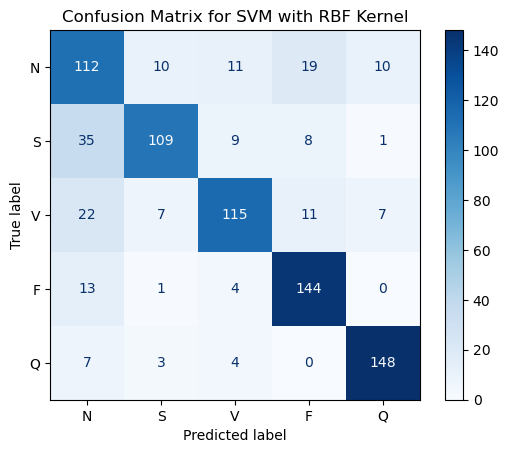


Total False Negatives: 182


In [25]:
# Importing StandardScaler from sklearn.preprocessing to standardize the features of the dataset
# StandardScaler is used to scale data such that the mean is 0 and the standard deviation is 1.
# This is useful in machine learning algorithms that are sensitive to the scale of the data (e.g., linear models, SVM).
from sklearn.preprocessing import StandardScaler
# Importing GridSearchCV from sklearn.model_selection to perform hyperparameter tuning through cross-validation.
# GridSearchCV helps in finding the best combination of hyperparameters for a given model by exhaustively searching through
# a specified parameter grid. It performs cross-validation to evaluate each combination.
from sklearn.model_selection import GridSearchCV

# Standardize features (this is important for our SVM)
scaler = StandardScaler()
train_fvector_scaled = scaler.fit_transform(train_fvector)
test_fvector_scaled = scaler.transform(test_fvector)

# Training SVM model with default C=1 and RBF kernel, this is the default
svm_classifier = SVC(kernel='rbf', C=10)
svm_classifier.fit(train_fvector_scaled, train_labels)

# Predictions on the test set
test_predictions = svm_classifier.predict(test_fvector_scaled)

# Printing the accuracy, recall, and F1-score using classification_report
print("Classification Report for default configuration (kernel=rbf, C=10):")
print(classification_report(test_labels, test_predictions, target_names=[label_names[i] for i in range(5)], zero_division=1))

# Plotting confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names.values())
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM with RBF Kernel")
plt.show()

# False Negatives (FN):
# False Negatives represent the cases where the model incorrectly predicts the absence of a class.
false_negatives = cm.sum(axis=1) - np.diag(cm)

# Printing the total False Negatives across all classes...
total_false_negatives = false_negatives.sum()
print(f"\nTotal False Negatives: {total_false_negatives}") # Apart from the true positive, this is the other value we care the most


[Training SVM with C=0.1]

Accuracy: 67.53%
F1-Score (macro avg): 0.6666
Recall (macro avg): 0.6753


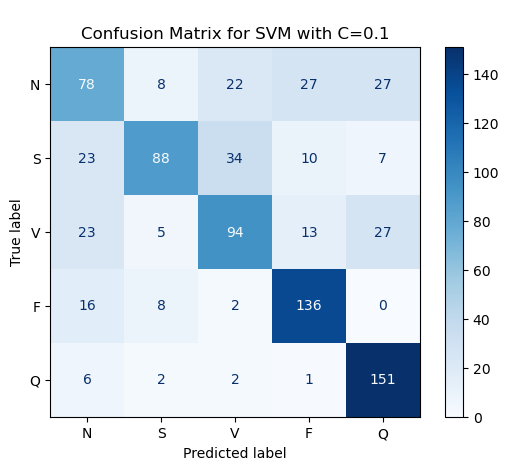


Total False Negatives: 263
------------------------------------

[Training SVM with C=1]

Accuracy: 72.72%
F1-Score (macro avg): 0.7252
Recall (macro avg): 0.7272


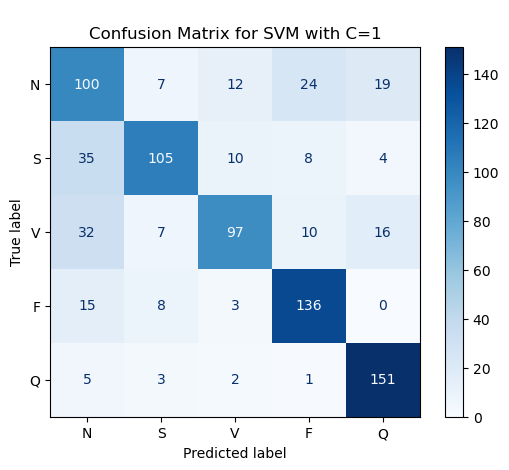


Total False Negatives: 221
------------------------------------

[Training SVM with C=100]

Accuracy: 79.26%
F1-Score (macro avg): 0.7926
Recall (macro avg): 0.7926


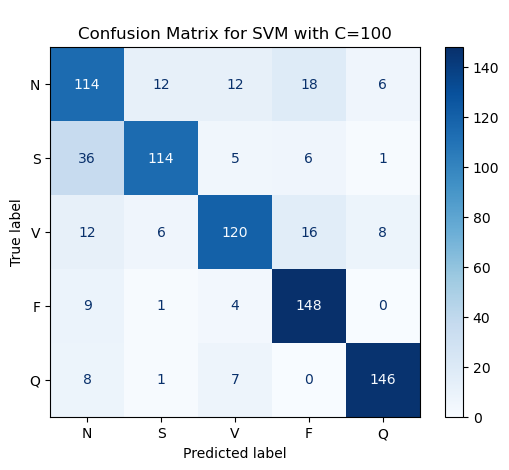


Total False Negatives: 168
------------------------------------

[Training SVM with C=1000]

Accuracy: 80.00%
F1-Score (macro avg): 0.8003
Recall (macro avg): 0.8000


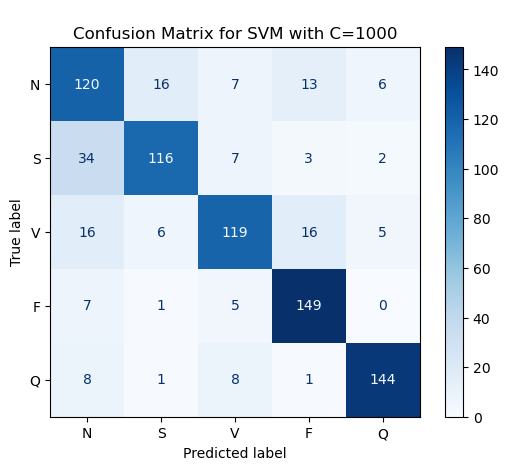


Total False Negatives: 162
------------------------------------

[Training SVM with C=10000]

Accuracy: 77.28%
F1-Score (macro avg): 0.7732
Recall (macro avg): 0.7728


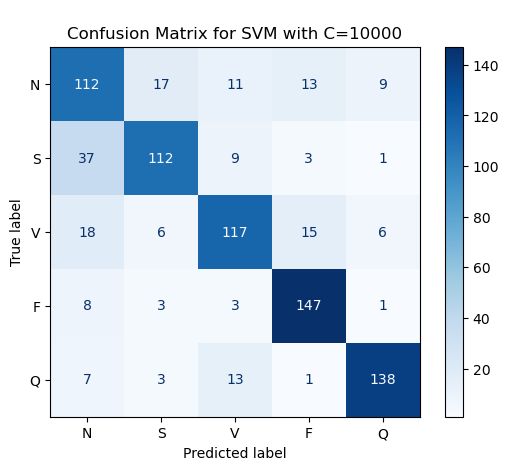


Total False Negatives: 184
------------------------------------

[Training SVM with C=100000]

Accuracy: 77.04%
F1-Score (macro avg): 0.7722
Recall (macro avg): 0.7704


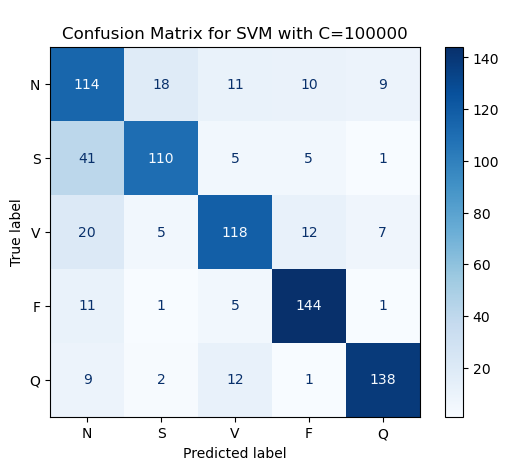


Total False Negatives: 186
------------------------------------

Best C value: 1000 with accuracy: 80.00%


In [26]:
# Now, we can test different parameter configurations for different C values, by keeping fixed the kernel.
C_values = [0.1, 1, 100, 1000, 10000, 100000]
results = {}

for C_val in C_values:
    print(f"\n[Training SVM with C={C_val}]\n")
    
    # Initializing and train the SVM with different values of C
    svm_classifier = SVC(kernel='rbf', C=C_val)
    svm_classifier.fit(train_fvector_scaled, train_labels)
    
    # Predictions on the test set
    test_predictions = svm_classifier.predict(test_fvector_scaled)
    
    # Evaluate performance
    accuracy = accuracy_score(test_labels, test_predictions)
    class_report = classification_report(test_labels, test_predictions, target_names=[label_names[i] for i in range(5)], zero_division=1, output_dict=True)
    
    results[C_val] = {
        'accuracy': accuracy,
        'f1-score': class_report['accuracy'],
        'recall': class_report['macro avg']['recall']
    }
    
    # Print results for current C
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1-Score (macro avg): {class_report['macro avg']['f1-score']:.4f}")
    print(f"Recall (macro avg): {class_report['macro avg']['recall']:.4f}")
    
    # Plotting confusion matrix for current model
    cm = confusion_matrix(test_labels, test_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names.values())
    disp.plot(cmap='Blues')
    plt.title(f"\nConfusion Matrix for SVM with C={C_val}")
    plt.show()

    # False Negatives (FN):
    false_negatives = cm.sum(axis=1) - np.diag(cm)
    # Printing the total False Negatives across all classes...
    total_false_negatives = false_negatives.sum()
    print(f"\nTotal False Negatives: {total_false_negatives}")
    print("------------------------------------")
# Finally, we identify the best C value
best_C_val = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nBest C value: {best_C_val} with accuracy: {results[best_C_val]['accuracy'] * 100:.2f}%")

In [27]:
# Define the hyperparameter grid to search over
kernels = ['rbf', 'poly', 'sigmoid'] # We deleted kernel=linear because we concentrate on non-linear kernels
gamma_values = ['scale', 'auto']
# C_values are the same as before
N_values = [32, 64, 128]
H_values = [8, 16, 32]

# Best configuration placeholder
best_config = {'accuracy': 0, 'C': 1, 'kernel': 'rbf', 'gamma': 'scale', 'N': 32, 'H': 8}

# Pre-compute feature vectors for both train and test sets to avoid redundancy
def compute_feature_vectors(data_list, N, H):
    feature_vectors = []
    for x, _ in tqdm(data_list, desc=f"Processing N={N}, H={H}"):
        x = np.array(x, dtype=np.float32)
        x = clean_signal(x)  # Clean the signal
        f_vector = compute_feature_vector(x, Fs, N, H)
        feature_vectors.append(f_vector)
    return np.array(feature_vectors)

# Perform hyperparameter tuning
for kernel in kernels:
    print(f"\nTraining SVM with kernel={kernel}")
    
    # No need for the degree loop anymore, since we're removing it
    for C_val in C_values:
        for gamma_val in gamma_values:
            for N in N_values:
                for H in H_values:
                    # Compute feature vectors for the train and test sets
                    train_fvector = compute_feature_vectors(train_list, N, H)
                    test_fvector = compute_feature_vectors(test_list, N, H)

                    # Scale the feature vectors
                    scaler = StandardScaler()
                    train_fvector_scaled = scaler.fit_transform(train_fvector)
                    test_fvector_scaled = scaler.transform(test_fvector)
                    
                    # Train the SVM classifier
                    svm_classifier = SVC(kernel=kernel, C=C_val, gamma=gamma_val)
                    svm_classifier.fit(train_fvector_scaled, train_labels)
            
                    # Make predictions and evaluate the model
                    test_predictions = svm_classifier.predict(test_fvector_scaled)
                    accuracy = accuracy_score(test_labels, test_predictions)
            
                    # Update the best configuration if current model is better
                    if accuracy > best_config['accuracy']:
                        best_config.update({
                            'accuracy': accuracy,
                            'C': C_val,
                            'kernel': kernel,
                            'gamma': gamma_val,
                            'N': N,
                            'H': H
                        })

                    # Print performance for each configuration
                    print(f"Kernel: {kernel}, C={C_val}, Gamma={gamma_val}, N={N}, H={H}, Accuracy: {accuracy * 100:.2f}%")
                    print(classification_report(test_labels, test_predictions, target_names=[label_names[i] for i in range(5)], zero_division=1))

# Output the best configuration found
print(f"\nBest configuration found: Kernel={best_config['kernel']}, C={best_config['C']}, "
      f"Gamma={best_config['gamma']}, N={best_config['N']}, H={best_config['H']}, Accuracy={best_config['accuracy']:.4f}")


Training SVM with kernel=rbf


Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.09it/s]


Kernel: rbf, C=0.1, Gamma=scale, N=32, H=8, Accuracy: 69.14%
              precision    recall  f1-score   support

           N       0.58      0.54      0.56       162
           S       0.72      0.53      0.61       162
           V       0.57      0.62      0.60       162
           F       0.73      0.86      0.79       162
           Q       0.84      0.90      0.87       162

    accuracy                           0.69       810
   macro avg       0.69      0.69      0.69       810
weighted avg       0.69      0.69      0.69       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 382.95it/s]


Kernel: rbf, C=0.1, Gamma=scale, N=32, H=16, Accuracy: 69.51%
              precision    recall  f1-score   support

           N       0.59      0.55      0.57       162
           S       0.69      0.62      0.65       162
           V       0.60      0.57      0.59       162
           F       0.73      0.86      0.79       162
           Q       0.85      0.88      0.86       162

    accuracy                           0.70       810
   macro avg       0.69      0.70      0.69       810
weighted avg       0.69      0.70      0.69       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.54it/s]


Kernel: rbf, C=0.1, Gamma=scale, N=32, H=32, Accuracy: 66.91%
              precision    recall  f1-score   support

           N       0.53      0.44      0.48       162
           S       0.68      0.62      0.65       162
           V       0.66      0.46      0.54       162
           F       0.73      0.87      0.79       162
           Q       0.71      0.94      0.81       162

    accuracy                           0.67       810
   macro avg       0.66      0.67      0.66       810
weighted avg       0.66      0.67      0.66       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 386.41it/s]


Kernel: rbf, C=0.1, Gamma=scale, N=64, H=8, Accuracy: 69.01%
              precision    recall  f1-score   support

           N       0.55      0.57      0.56       162
           S       0.82      0.49      0.61       162
           V       0.61      0.58      0.59       162
           F       0.72      0.88      0.79       162
           Q       0.78      0.93      0.85       162

    accuracy                           0.69       810
   macro avg       0.70      0.69      0.68       810
weighted avg       0.70      0.69      0.68       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 397.07it/s]


Kernel: rbf, C=0.1, Gamma=scale, N=64, H=16, Accuracy: 67.53%
              precision    recall  f1-score   support

           N       0.53      0.48      0.51       162
           S       0.79      0.54      0.64       162
           V       0.61      0.58      0.59       162
           F       0.73      0.84      0.78       162
           Q       0.71      0.93      0.81       162

    accuracy                           0.68       810
   macro avg       0.68      0.68      0.67       810
weighted avg       0.68      0.68      0.67       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 380.58it/s]


Kernel: rbf, C=0.1, Gamma=scale, N=64, H=32, Accuracy: 63.95%
              precision    recall  f1-score   support

           N       0.60      0.25      0.36       162
           S       0.60      0.73      0.66       162
           V       0.72      0.40      0.52       162
           F       0.61      0.90      0.73       162
           Q       0.68      0.91      0.78       162

    accuracy                           0.64       810
   macro avg       0.64      0.64      0.61       810
weighted avg       0.64      0.64      0.61       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 380.33it/s]


Kernel: rbf, C=0.1, Gamma=scale, N=128, H=8, Accuracy: 63.58%
              precision    recall  f1-score   support

           N       0.51      0.28      0.36       162
           S       0.74      0.44      0.56       162
           V       0.63      0.60      0.61       162
           F       0.61      0.94      0.74       162
           Q       0.67      0.92      0.78       162

    accuracy                           0.64       810
   macro avg       0.63      0.64      0.61       810
weighted avg       0.63      0.64      0.61       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 355.95it/s]


Kernel: rbf, C=0.1, Gamma=scale, N=128, H=16, Accuracy: 65.56%
              precision    recall  f1-score   support

           N       0.55      0.38      0.45       162
           S       0.78      0.46      0.58       162
           V       0.64      0.59      0.61       162
           F       0.62      0.94      0.75       162
           Q       0.71      0.92      0.80       162

    accuracy                           0.66       810
   macro avg       0.66      0.66      0.64       810
weighted avg       0.66      0.66      0.64       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 377.68it/s]


Kernel: rbf, C=0.1, Gamma=scale, N=128, H=32, Accuracy: 60.00%
              precision    recall  f1-score   support

           N       0.49      0.28      0.36       162
           S       0.62      0.49      0.55       162
           V       0.68      0.39      0.49       162
           F       0.58      0.94      0.72       162
           Q       0.62      0.90      0.73       162

    accuracy                           0.60       810
   macro avg       0.60      0.60      0.57       810
weighted avg       0.60      0.60      0.57       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 372.15it/s]


Kernel: rbf, C=0.1, Gamma=auto, N=32, H=8, Accuracy: 68.77%
              precision    recall  f1-score   support

           N       0.58      0.55      0.56       162
           S       0.68      0.56      0.61       162
           V       0.61      0.56      0.58       162
           F       0.71      0.88      0.79       162
           Q       0.83      0.89      0.86       162

    accuracy                           0.69       810
   macro avg       0.68      0.69      0.68       810
weighted avg       0.68      0.69      0.68       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 378.60it/s]


Kernel: rbf, C=0.1, Gamma=auto, N=32, H=16, Accuracy: 68.40%
              precision    recall  f1-score   support

           N       0.57      0.53      0.55       162
           S       0.67      0.60      0.63       162
           V       0.61      0.53      0.57       162
           F       0.71      0.89      0.79       162
           Q       0.83      0.87      0.85       162

    accuracy                           0.68       810
   macro avg       0.68      0.68      0.68       810
weighted avg       0.68      0.68      0.68       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.59it/s]


Kernel: rbf, C=0.1, Gamma=auto, N=32, H=32, Accuracy: 63.95%
              precision    recall  f1-score   support

           N       0.46      0.44      0.45       162
           S       0.64      0.62      0.63       162
           V       0.65      0.33      0.44       162
           F       0.71      0.88      0.78       162
           Q       0.70      0.93      0.80       162

    accuracy                           0.64       810
   macro avg       0.63      0.64      0.62       810
weighted avg       0.63      0.64      0.62       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 378.04it/s]


Kernel: rbf, C=0.1, Gamma=auto, N=64, H=8, Accuracy: 67.90%
              precision    recall  f1-score   support

           N       0.51      0.57      0.54       162
           S       0.81      0.50      0.62       162
           V       0.68      0.50      0.58       162
           F       0.71      0.88      0.79       162
           Q       0.73      0.94      0.82       162

    accuracy                           0.68       810
   macro avg       0.69      0.68      0.67       810
weighted avg       0.69      0.68      0.67       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 345.27it/s]


Kernel: rbf, C=0.1, Gamma=auto, N=64, H=16, Accuracy: 65.06%
              precision    recall  f1-score   support

           N       0.48      0.50      0.49       162
           S       0.72      0.54      0.62       162
           V       0.65      0.44      0.53       162
           F       0.71      0.84      0.77       162
           Q       0.69      0.93      0.79       162

    accuracy                           0.65       810
   macro avg       0.65      0.65      0.64       810
weighted avg       0.65      0.65      0.64       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 342.11it/s]


Kernel: rbf, C=0.1, Gamma=auto, N=64, H=32, Accuracy: 60.49%
              precision    recall  f1-score   support

           N       0.58      0.19      0.29       162
           S       0.54      0.74      0.62       162
           V       0.67      0.27      0.38       162
           F       0.60      0.91      0.72       162
           Q       0.66      0.92      0.77       162

    accuracy                           0.60       810
   macro avg       0.61      0.60      0.56       810
weighted avg       0.61      0.60      0.56       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 377.85it/s]


Kernel: rbf, C=0.1, Gamma=auto, N=128, H=8, Accuracy: 61.60%
              precision    recall  f1-score   support

           N       0.49      0.27      0.35       162
           S       0.85      0.37      0.52       162
           V       0.65      0.54      0.59       162
           F       0.57      0.95      0.71       162
           Q       0.63      0.94      0.75       162

    accuracy                           0.62       810
   macro avg       0.64      0.62      0.58       810
weighted avg       0.64      0.62      0.58       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 380.90it/s]


Kernel: rbf, C=0.1, Gamma=auto, N=128, H=16, Accuracy: 59.51%
              precision    recall  f1-score   support

           N       0.50      0.32      0.39       162
           S       0.89      0.25      0.39       162
           V       0.66      0.53      0.59       162
           F       0.59      0.94      0.72       162
           Q       0.56      0.94      0.70       162

    accuracy                           0.60       810
   macro avg       0.64      0.60      0.56       810
weighted avg       0.64      0.60      0.56       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 380.06it/s]


Kernel: rbf, C=0.1, Gamma=auto, N=128, H=32, Accuracy: 54.32%
              precision    recall  f1-score   support

           N       0.36      0.17      0.23       162
           S       0.58      0.39      0.46       162
           V       0.63      0.33      0.43       162
           F       0.53      0.94      0.68       162
           Q       0.56      0.89      0.69       162

    accuracy                           0.54       810
   macro avg       0.53      0.54      0.50       810
weighted avg       0.53      0.54      0.50       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 392.08it/s]


Kernel: rbf, C=1, Gamma=scale, N=32, H=8, Accuracy: 76.42%
              precision    recall  f1-score   support

           N       0.61      0.69      0.64       162
           S       0.85      0.62      0.71       162
           V       0.72      0.69      0.70       162
           F       0.77      0.91      0.84       162
           Q       0.91      0.93      0.92       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.67it/s]


Kernel: rbf, C=1, Gamma=scale, N=32, H=16, Accuracy: 75.43%
              precision    recall  f1-score   support

           N       0.61      0.64      0.62       162
           S       0.81      0.69      0.74       162
           V       0.69      0.69      0.69       162
           F       0.77      0.89      0.82       162
           Q       0.91      0.87      0.89       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 404.58it/s]


Kernel: rbf, C=1, Gamma=scale, N=32, H=32, Accuracy: 70.25%
              precision    recall  f1-score   support

           N       0.54      0.56      0.55       162
           S       0.70      0.59      0.64       162
           V       0.74      0.57      0.65       162
           F       0.74      0.86      0.80       162
           Q       0.78      0.94      0.85       162

    accuracy                           0.70       810
   macro avg       0.70      0.70      0.70       810
weighted avg       0.70      0.70      0.70       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.87it/s]


Kernel: rbf, C=1, Gamma=scale, N=64, H=8, Accuracy: 75.19%
              precision    recall  f1-score   support

           N       0.56      0.68      0.61       162
           S       0.88      0.62      0.72       162
           V       0.79      0.64      0.70       162
           F       0.74      0.89      0.81       162
           Q       0.88      0.94      0.91       162

    accuracy                           0.75       810
   macro avg       0.77      0.75      0.75       810
weighted avg       0.77      0.75      0.75       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 376.85it/s]


Kernel: rbf, C=1, Gamma=scale, N=64, H=16, Accuracy: 72.72%
              precision    recall  f1-score   support

           N       0.53      0.62      0.57       162
           S       0.81      0.65      0.72       162
           V       0.78      0.60      0.68       162
           F       0.76      0.84      0.80       162
           Q       0.79      0.93      0.86       162

    accuracy                           0.73       810
   macro avg       0.74      0.73      0.73       810
weighted avg       0.74      0.73      0.73       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 377.46it/s]


Kernel: rbf, C=1, Gamma=scale, N=64, H=32, Accuracy: 68.40%
              precision    recall  f1-score   support

           N       0.54      0.38      0.44       162
           S       0.70      0.73      0.71       162
           V       0.77      0.52      0.62       162
           F       0.65      0.88      0.75       162
           Q       0.74      0.91      0.82       162

    accuracy                           0.68       810
   macro avg       0.68      0.68      0.67       810
weighted avg       0.68      0.68      0.67       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 358.81it/s]


Kernel: rbf, C=1, Gamma=scale, N=128, H=8, Accuracy: 71.48%
              precision    recall  f1-score   support

           N       0.55      0.49      0.52       162
           S       0.81      0.62      0.70       162
           V       0.76      0.60      0.67       162
           F       0.69      0.91      0.79       162
           Q       0.77      0.94      0.85       162

    accuracy                           0.71       810
   macro avg       0.72      0.71      0.71       810
weighted avg       0.72      0.71      0.71       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 395.77it/s]


Kernel: rbf, C=1, Gamma=scale, N=128, H=16, Accuracy: 71.60%
              precision    recall  f1-score   support

           N       0.55      0.52      0.54       162
           S       0.82      0.62      0.71       162
           V       0.77      0.61      0.68       162
           F       0.71      0.91      0.79       162
           Q       0.76      0.91      0.83       162

    accuracy                           0.72       810
   macro avg       0.72      0.72      0.71       810
weighted avg       0.72      0.72      0.71       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 385.04it/s]


Kernel: rbf, C=1, Gamma=scale, N=128, H=32, Accuracy: 66.42%
              precision    recall  f1-score   support

           N       0.49      0.42      0.45       162
           S       0.74      0.52      0.61       162
           V       0.78      0.56      0.65       162
           F       0.65      0.92      0.76       162
           Q       0.68      0.90      0.78       162

    accuracy                           0.66       810
   macro avg       0.67      0.66      0.65       810
weighted avg       0.67      0.66      0.65       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 395.95it/s]


Kernel: rbf, C=1, Gamma=auto, N=32, H=8, Accuracy: 74.20%
              precision    recall  f1-score   support

           N       0.59      0.64      0.61       162
           S       0.83      0.62      0.71       162
           V       0.66      0.63      0.64       162
           F       0.76      0.91      0.83       162
           Q       0.89      0.92      0.91       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 402.92it/s]


Kernel: rbf, C=1, Gamma=auto, N=32, H=16, Accuracy: 71.48%
              precision    recall  f1-score   support

           N       0.58      0.57      0.58       162
           S       0.73      0.62      0.67       162
           V       0.64      0.60      0.62       162
           F       0.75      0.90      0.81       162
           Q       0.86      0.88      0.87       162

    accuracy                           0.71       810
   macro avg       0.71      0.71      0.71       810
weighted avg       0.71      0.71      0.71       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 411.32it/s]


Kernel: rbf, C=1, Gamma=auto, N=32, H=32, Accuracy: 68.27%
              precision    recall  f1-score   support

           N       0.54      0.50      0.52       162
           S       0.67      0.62      0.65       162
           V       0.70      0.47      0.56       162
           F       0.73      0.88      0.80       162
           Q       0.74      0.94      0.83       162

    accuracy                           0.68       810
   macro avg       0.68      0.68      0.67       810
weighted avg       0.68      0.68      0.67       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 399.07it/s]


Kernel: rbf, C=1, Gamma=auto, N=64, H=8, Accuracy: 72.35%
              precision    recall  f1-score   support

           N       0.53      0.66      0.59       162
           S       0.84      0.60      0.70       162
           V       0.78      0.54      0.64       162
           F       0.72      0.89      0.80       162
           Q       0.83      0.93      0.88       162

    accuracy                           0.72       810
   macro avg       0.74      0.72      0.72       810
weighted avg       0.74      0.72      0.72       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 383.36it/s]


Kernel: rbf, C=1, Gamma=auto, N=64, H=16, Accuracy: 70.62%
              precision    recall  f1-score   support

           N       0.51      0.59      0.55       162
           S       0.79      0.65      0.71       162
           V       0.79      0.51      0.62       162
           F       0.74      0.85      0.79       162
           Q       0.76      0.93      0.83       162

    accuracy                           0.71       810
   macro avg       0.72      0.71      0.70       810
weighted avg       0.72      0.71      0.70       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 377.30it/s]


Kernel: rbf, C=1, Gamma=auto, N=64, H=32, Accuracy: 64.94%
              precision    recall  f1-score   support

           N       0.55      0.31      0.40       162
           S       0.61      0.72      0.66       162
           V       0.72      0.41      0.53       162
           F       0.64      0.88      0.74       162
           Q       0.71      0.93      0.80       162

    accuracy                           0.65       810
   macro avg       0.65      0.65      0.62       810
weighted avg       0.65      0.65      0.62       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 339.70it/s]


Kernel: rbf, C=1, Gamma=auto, N=128, H=8, Accuracy: 68.89%
              precision    recall  f1-score   support

           N       0.51      0.48      0.50       162
           S       0.81      0.57      0.67       162
           V       0.77      0.52      0.62       162
           F       0.68      0.94      0.79       162
           Q       0.73      0.93      0.82       162

    accuracy                           0.69       810
   macro avg       0.70      0.69      0.68       810
weighted avg       0.70      0.69      0.68       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 337.93it/s]


Kernel: rbf, C=1, Gamma=auto, N=128, H=16, Accuracy: 69.26%
              precision    recall  f1-score   support

           N       0.52      0.49      0.50       162
           S       0.84      0.57      0.68       162
           V       0.79      0.56      0.65       162
           F       0.65      0.93      0.77       162
           Q       0.74      0.91      0.82       162

    accuracy                           0.69       810
   macro avg       0.71      0.69      0.68       810
weighted avg       0.71      0.69      0.68       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 400.63it/s]


Kernel: rbf, C=1, Gamma=auto, N=128, H=32, Accuracy: 62.84%
              precision    recall  f1-score   support

           N       0.46      0.29      0.35       162
           S       0.72      0.54      0.61       162
           V       0.77      0.48      0.59       162
           F       0.60      0.93      0.73       162
           Q       0.63      0.91      0.74       162

    accuracy                           0.63       810
   macro avg       0.63      0.63      0.61       810
weighted avg       0.63      0.63      0.61       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 408.91it/s]


Kernel: rbf, C=100, Gamma=scale, N=32, H=8, Accuracy: 75.68%
              precision    recall  f1-score   support

           N       0.58      0.66      0.61       162
           S       0.81      0.61      0.70       162
           V       0.71      0.73      0.72       162
           F       0.82      0.90      0.86       162
           Q       0.91      0.89      0.90       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 418.61it/s]


Kernel: rbf, C=100, Gamma=scale, N=32, H=16, Accuracy: 78.27%
              precision    recall  f1-score   support

           N       0.63      0.73      0.68       162
           S       0.79      0.64      0.71       162
           V       0.79      0.78      0.79       162
           F       0.80      0.91      0.85       162
           Q       0.94      0.86      0.90       162

    accuracy                           0.78       810
   macro avg       0.79      0.78      0.78       810
weighted avg       0.79      0.78      0.78       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 415.55it/s]


Kernel: rbf, C=100, Gamma=scale, N=32, H=32, Accuracy: 75.06%
              precision    recall  f1-score   support

           N       0.62      0.62      0.62       162
           S       0.77      0.63      0.69       162
           V       0.80      0.73      0.76       162
           F       0.75      0.88      0.81       162
           Q       0.82      0.89      0.85       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 373.92it/s]


Kernel: rbf, C=100, Gamma=scale, N=64, H=8, Accuracy: 79.63%
              precision    recall  f1-score   support

           N       0.68      0.72      0.70       162
           S       0.77      0.70      0.73       162
           V       0.81      0.75      0.78       162
           F       0.79      0.90      0.84       162
           Q       0.94      0.91      0.93       162

    accuracy                           0.80       810
   macro avg       0.80      0.80      0.80       810
weighted avg       0.80      0.80      0.80       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 382.61it/s]


Kernel: rbf, C=100, Gamma=scale, N=64, H=16, Accuracy: 79.26%
              precision    recall  f1-score   support

           N       0.64      0.70      0.67       162
           S       0.85      0.70      0.77       162
           V       0.81      0.74      0.77       162
           F       0.79      0.91      0.85       162
           Q       0.91      0.90      0.90       162

    accuracy                           0.79       810
   macro avg       0.80      0.79      0.79       810
weighted avg       0.80      0.79      0.79       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 373.12it/s]


Kernel: rbf, C=100, Gamma=scale, N=64, H=32, Accuracy: 76.05%
              precision    recall  f1-score   support

           N       0.61      0.67      0.64       162
           S       0.78      0.66      0.71       162
           V       0.84      0.70      0.76       162
           F       0.78      0.90      0.84       162
           Q       0.82      0.87      0.84       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.00it/s]


Kernel: rbf, C=100, Gamma=scale, N=128, H=8, Accuracy: 76.30%
              precision    recall  f1-score   support

           N       0.62      0.63      0.62       162
           S       0.79      0.64      0.71       162
           V       0.77      0.73      0.75       162
           F       0.75      0.90      0.82       162
           Q       0.89      0.92      0.90       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 386.94it/s]


Kernel: rbf, C=100, Gamma=scale, N=128, H=16, Accuracy: 76.91%
              precision    recall  f1-score   support

           N       0.65      0.65      0.65       162
           S       0.83      0.65      0.73       162
           V       0.80      0.72      0.76       162
           F       0.74      0.91      0.82       162
           Q       0.84      0.91      0.88       162

    accuracy                           0.77       810
   macro avg       0.77      0.77      0.77       810
weighted avg       0.77      0.77      0.77       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 373.19it/s]


Kernel: rbf, C=100, Gamma=scale, N=128, H=32, Accuracy: 72.10%
              precision    recall  f1-score   support

           N       0.59      0.61      0.60       162
           S       0.80      0.62      0.70       162
           V       0.77      0.64      0.70       162
           F       0.71      0.90      0.79       162
           Q       0.76      0.84      0.80       162

    accuracy                           0.72       810
   macro avg       0.73      0.72      0.72       810
weighted avg       0.73      0.72      0.72       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.55it/s]


Kernel: rbf, C=100, Gamma=auto, N=32, H=8, Accuracy: 77.04%
              precision    recall  f1-score   support

           N       0.60      0.75      0.67       162
           S       0.86      0.61      0.71       162
           V       0.72      0.70      0.71       162
           F       0.79      0.90      0.84       162
           Q       0.95      0.90      0.93       162

    accuracy                           0.77       810
   macro avg       0.78      0.77      0.77       810
weighted avg       0.78      0.77      0.77       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.29it/s]


Kernel: rbf, C=100, Gamma=auto, N=32, H=16, Accuracy: 78.77%
              precision    recall  f1-score   support

           N       0.62      0.72      0.67       162
           S       0.81      0.70      0.75       162
           V       0.79      0.75      0.77       162
           F       0.80      0.90      0.85       162
           Q       0.95      0.87      0.91       162

    accuracy                           0.79       810
   macro avg       0.80      0.79      0.79       810
weighted avg       0.80      0.79      0.79       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 417.38it/s]


Kernel: rbf, C=100, Gamma=auto, N=32, H=32, Accuracy: 72.96%
              precision    recall  f1-score   support

           N       0.55      0.57      0.56       162
           S       0.75      0.60      0.67       162
           V       0.78      0.70      0.74       162
           F       0.74      0.88      0.80       162
           Q       0.83      0.90      0.86       162

    accuracy                           0.73       810
   macro avg       0.73      0.73      0.73       810
weighted avg       0.73      0.73      0.73       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 395.19it/s]


Kernel: rbf, C=100, Gamma=auto, N=64, H=8, Accuracy: 80.49%
              precision    recall  f1-score   support

           N       0.65      0.75      0.69       162
           S       0.87      0.69      0.77       162
           V       0.81      0.73      0.77       162
           F       0.80      0.93      0.86       162
           Q       0.94      0.94      0.94       162

    accuracy                           0.80       810
   macro avg       0.81      0.80      0.80       810
weighted avg       0.81      0.80      0.80       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 382.48it/s]


Kernel: rbf, C=100, Gamma=auto, N=64, H=16, Accuracy: 77.90%
              precision    recall  f1-score   support

           N       0.62      0.70      0.66       162
           S       0.81      0.67      0.73       162
           V       0.82      0.72      0.77       162
           F       0.78      0.90      0.84       162
           Q       0.90      0.90      0.90       162

    accuracy                           0.78       810
   macro avg       0.79      0.78      0.78       810
weighted avg       0.79      0.78      0.78       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 384.29it/s]


Kernel: rbf, C=100, Gamma=auto, N=64, H=32, Accuracy: 73.33%
              precision    recall  f1-score   support

           N       0.59      0.54      0.57       162
           S       0.74      0.65      0.69       162
           V       0.82      0.67      0.73       162
           F       0.72      0.92      0.81       162
           Q       0.80      0.88      0.84       162

    accuracy                           0.73       810
   macro avg       0.73      0.73      0.73       810
weighted avg       0.73      0.73      0.73       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 389.47it/s]


Kernel: rbf, C=100, Gamma=auto, N=128, H=8, Accuracy: 75.68%
              precision    recall  f1-score   support

           N       0.60      0.66      0.63       162
           S       0.79      0.59      0.68       162
           V       0.79      0.70      0.74       162
           F       0.75      0.91      0.82       162
           Q       0.89      0.92      0.90       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.75       810
weighted avg       0.76      0.76      0.75       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 389.12it/s]


Kernel: rbf, C=100, Gamma=auto, N=128, H=16, Accuracy: 74.69%
              precision    recall  f1-score   support

           N       0.58      0.58      0.58       162
           S       0.83      0.62      0.71       162
           V       0.80      0.72      0.76       162
           F       0.73      0.92      0.82       162
           Q       0.81      0.90      0.85       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.74       810
weighted avg       0.75      0.75      0.74       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 391.32it/s]


Kernel: rbf, C=100, Gamma=auto, N=128, H=32, Accuracy: 68.77%
              precision    recall  f1-score   support

           N       0.54      0.52      0.53       162
           S       0.79      0.56      0.66       162
           V       0.76      0.56      0.65       162
           F       0.68      0.91      0.78       162
           Q       0.71      0.88      0.79       162

    accuracy                           0.69       810
   macro avg       0.70      0.69      0.68       810
weighted avg       0.70      0.69      0.68       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.86it/s]


Kernel: rbf, C=1000, Gamma=scale, N=32, H=8, Accuracy: 74.07%
              precision    recall  f1-score   support

           N       0.55      0.67      0.61       162
           S       0.76      0.62      0.68       162
           V       0.70      0.70      0.70       162
           F       0.82      0.83      0.82       162
           Q       0.92      0.88      0.90       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 389.65it/s]


Kernel: rbf, C=1000, Gamma=scale, N=32, H=16, Accuracy: 76.42%
              precision    recall  f1-score   support

           N       0.60      0.69      0.64       162
           S       0.75      0.62      0.68       162
           V       0.75      0.77      0.76       162
           F       0.82      0.88      0.85       162
           Q       0.93      0.86      0.90       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 378.42it/s]


Kernel: rbf, C=1000, Gamma=scale, N=32, H=32, Accuracy: 75.93%
              precision    recall  f1-score   support

           N       0.64      0.64      0.64       162
           S       0.78      0.69      0.73       162
           V       0.79      0.71      0.75       162
           F       0.75      0.88      0.81       162
           Q       0.84      0.88      0.86       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 371.01it/s]


Kernel: rbf, C=1000, Gamma=scale, N=64, H=8, Accuracy: 76.30%
              precision    recall  f1-score   support

           N       0.62      0.66      0.64       162
           S       0.75      0.65      0.70       162
           V       0.76      0.70      0.73       162
           F       0.77      0.91      0.84       162
           Q       0.92      0.90      0.91       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 335.58it/s]


Kernel: rbf, C=1000, Gamma=scale, N=64, H=16, Accuracy: 80.00%
              precision    recall  f1-score   support

           N       0.65      0.74      0.69       162
           S       0.83      0.72      0.77       162
           V       0.82      0.73      0.77       162
           F       0.82      0.92      0.87       162
           Q       0.92      0.89      0.90       162

    accuracy                           0.80       810
   macro avg       0.81      0.80      0.80       810
weighted avg       0.81      0.80      0.80       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 379.74it/s]


Kernel: rbf, C=1000, Gamma=scale, N=64, H=32, Accuracy: 75.06%
              precision    recall  f1-score   support

           N       0.59      0.69      0.63       162
           S       0.78      0.64      0.70       162
           V       0.81      0.67      0.74       162
           F       0.78      0.90      0.84       162
           Q       0.82      0.86      0.84       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 379.92it/s]


Kernel: rbf, C=1000, Gamma=scale, N=128, H=8, Accuracy: 76.79%
              precision    recall  f1-score   support

           N       0.65      0.67      0.66       162
           S       0.76      0.67      0.71       162
           V       0.75      0.75      0.75       162
           F       0.78      0.87      0.82       162
           Q       0.92      0.88      0.90       162

    accuracy                           0.77       810
   macro avg       0.77      0.77      0.77       810
weighted avg       0.77      0.77      0.77       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 392.87it/s]


Kernel: rbf, C=1000, Gamma=scale, N=128, H=16, Accuracy: 75.68%
              precision    recall  f1-score   support

           N       0.62      0.67      0.64       162
           S       0.77      0.67      0.72       162
           V       0.77      0.67      0.72       162
           F       0.76      0.89      0.82       162
           Q       0.88      0.89      0.88       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 394.49it/s]


Kernel: rbf, C=1000, Gamma=scale, N=128, H=32, Accuracy: 74.20%
              precision    recall  f1-score   support

           N       0.60      0.64      0.62       162
           S       0.81      0.64      0.72       162
           V       0.78      0.70      0.74       162
           F       0.74      0.90      0.81       162
           Q       0.80      0.83      0.82       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 398.76it/s]


Kernel: rbf, C=1000, Gamma=auto, N=32, H=8, Accuracy: 74.81%
              precision    recall  f1-score   support

           N       0.55      0.67      0.60       162
           S       0.79      0.60      0.69       162
           V       0.73      0.69      0.71       162
           F       0.81      0.89      0.85       162
           Q       0.91      0.89      0.90       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 397.25it/s]


Kernel: rbf, C=1000, Gamma=auto, N=32, H=16, Accuracy: 77.04%
              precision    recall  f1-score   support

           N       0.63      0.71      0.67       162
           S       0.78      0.63      0.70       162
           V       0.77      0.74      0.76       162
           F       0.78      0.91      0.84       162
           Q       0.92      0.86      0.89       162

    accuracy                           0.77       810
   macro avg       0.78      0.77      0.77       810
weighted avg       0.78      0.77      0.77       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 407.92it/s]


Kernel: rbf, C=1000, Gamma=auto, N=32, H=32, Accuracy: 73.58%
              precision    recall  f1-score   support

           N       0.59      0.59      0.59       162
           S       0.76      0.63      0.69       162
           V       0.77      0.69      0.73       162
           F       0.74      0.88      0.81       162
           Q       0.82      0.89      0.85       162

    accuracy                           0.74       810
   macro avg       0.74      0.74      0.73       810
weighted avg       0.74      0.74      0.73       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.91it/s]


Kernel: rbf, C=1000, Gamma=auto, N=64, H=8, Accuracy: 77.65%
              precision    recall  f1-score   support

           N       0.64      0.68      0.66       162
           S       0.74      0.67      0.70       162
           V       0.79      0.74      0.76       162
           F       0.78      0.90      0.83       162
           Q       0.94      0.90      0.92       162

    accuracy                           0.78       810
   macro avg       0.78      0.78      0.78       810
weighted avg       0.78      0.78      0.78       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 377.29it/s]


Kernel: rbf, C=1000, Gamma=auto, N=64, H=16, Accuracy: 79.75%
              precision    recall  f1-score   support

           N       0.65      0.75      0.70       162
           S       0.85      0.69      0.76       162
           V       0.82      0.72      0.76       162
           F       0.78      0.91      0.84       162
           Q       0.93      0.91      0.92       162

    accuracy                           0.80       810
   macro avg       0.81      0.80      0.80       810
weighted avg       0.81      0.80      0.80       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 371.10it/s]


Kernel: rbf, C=1000, Gamma=auto, N=64, H=32, Accuracy: 76.30%
              precision    recall  f1-score   support

           N       0.62      0.67      0.64       162
           S       0.79      0.65      0.72       162
           V       0.81      0.72      0.76       162
           F       0.79      0.91      0.85       162
           Q       0.82      0.86      0.84       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 384.03it/s]


Kernel: rbf, C=1000, Gamma=auto, N=128, H=8, Accuracy: 76.17%
              precision    recall  f1-score   support

           N       0.63      0.64      0.63       162
           S       0.78      0.65      0.71       162
           V       0.74      0.72      0.73       162
           F       0.76      0.90      0.82       162
           Q       0.91      0.90      0.90       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.76it/s]


Kernel: rbf, C=1000, Gamma=auto, N=128, H=16, Accuracy: 76.54%
              precision    recall  f1-score   support

           N       0.64      0.67      0.65       162
           S       0.83      0.62      0.71       162
           V       0.79      0.73      0.76       162
           F       0.73      0.91      0.81       162
           Q       0.86      0.90      0.88       162

    accuracy                           0.77       810
   macro avg       0.77      0.77      0.76       810
weighted avg       0.77      0.77      0.76       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 400.02it/s]


Kernel: rbf, C=1000, Gamma=auto, N=128, H=32, Accuracy: 72.72%
              precision    recall  f1-score   support

           N       0.60      0.59      0.60       162
           S       0.82      0.62      0.71       162
           V       0.76      0.66      0.71       162
           F       0.71      0.90      0.79       162
           Q       0.77      0.86      0.81       162

    accuracy                           0.73       810
   macro avg       0.73      0.73      0.72       810
weighted avg       0.73      0.73      0.72       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.95it/s]


Kernel: rbf, C=10000, Gamma=scale, N=32, H=8, Accuracy: 73.09%
              precision    recall  f1-score   support

           N       0.53      0.66      0.59       162
           S       0.74      0.60      0.66       162
           V       0.73      0.70      0.71       162
           F       0.79      0.81      0.80       162
           Q       0.92      0.88      0.90       162

    accuracy                           0.73       810
   macro avg       0.74      0.73      0.73       810
weighted avg       0.74      0.73      0.73       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.74it/s]


Kernel: rbf, C=10000, Gamma=scale, N=32, H=16, Accuracy: 73.70%
              precision    recall  f1-score   support

           N       0.56      0.69      0.61       162
           S       0.74      0.59      0.66       162
           V       0.71      0.71      0.71       162
           F       0.81      0.85      0.83       162
           Q       0.91      0.85      0.88       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 345.55it/s]


Kernel: rbf, C=10000, Gamma=scale, N=32, H=32, Accuracy: 76.42%
              precision    recall  f1-score   support

           N       0.63      0.64      0.63       162
           S       0.78      0.69      0.73       162
           V       0.77      0.72      0.75       162
           F       0.77      0.88      0.82       162
           Q       0.87      0.90      0.88       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 389.81it/s]


Kernel: rbf, C=10000, Gamma=scale, N=64, H=8, Accuracy: 76.05%
              precision    recall  f1-score   support

           N       0.60      0.68      0.64       162
           S       0.75      0.65      0.70       162
           V       0.75      0.71      0.73       162
           F       0.80      0.87      0.83       162
           Q       0.93      0.89      0.91       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 370.64it/s]


Kernel: rbf, C=10000, Gamma=scale, N=64, H=16, Accuracy: 77.28%
              precision    recall  f1-score   support

           N       0.62      0.69      0.65       162
           S       0.79      0.69      0.74       162
           V       0.76      0.72      0.74       162
           F       0.82      0.91      0.86       162
           Q       0.89      0.85      0.87       162

    accuracy                           0.77       810
   macro avg       0.78      0.77      0.77       810
weighted avg       0.78      0.77      0.77       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 366.77it/s]


Kernel: rbf, C=10000, Gamma=scale, N=64, H=32, Accuracy: 75.31%
              precision    recall  f1-score   support

           N       0.56      0.66      0.61       162
           S       0.76      0.66      0.71       162
           V       0.83      0.70      0.76       162
           F       0.79      0.90      0.84       162
           Q       0.86      0.85      0.85       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.67it/s]


Kernel: rbf, C=10000, Gamma=scale, N=128, H=8, Accuracy: 75.43%
              precision    recall  f1-score   support

           N       0.62      0.67      0.64       162
           S       0.74      0.64      0.69       162
           V       0.69      0.74      0.71       162
           F       0.83      0.88      0.85       162
           Q       0.93      0.84      0.88       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.76       810
weighted avg       0.76      0.75      0.76       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 389.61it/s]


Kernel: rbf, C=10000, Gamma=scale, N=128, H=16, Accuracy: 76.42%
              precision    recall  f1-score   support

           N       0.63      0.65      0.64       162
           S       0.75      0.69      0.72       162
           V       0.77      0.72      0.74       162
           F       0.79      0.90      0.84       162
           Q       0.88      0.86      0.87       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.59it/s]


Kernel: rbf, C=10000, Gamma=scale, N=128, H=32, Accuracy: 75.31%
              precision    recall  f1-score   support

           N       0.62      0.65      0.63       162
           S       0.80      0.65      0.71       162
           V       0.79      0.72      0.75       162
           F       0.77      0.90      0.83       162
           Q       0.81      0.85      0.83       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 392.51it/s]


Kernel: rbf, C=10000, Gamma=auto, N=32, H=8, Accuracy: 74.32%
              precision    recall  f1-score   support

           N       0.56      0.69      0.61       162
           S       0.74      0.61      0.67       162
           V       0.73      0.69      0.71       162
           F       0.82      0.85      0.83       162
           Q       0.93      0.88      0.91       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.75       810
weighted avg       0.75      0.74      0.75       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 395.24it/s]


Kernel: rbf, C=10000, Gamma=auto, N=32, H=16, Accuracy: 76.30%
              precision    recall  f1-score   support

           N       0.61      0.67      0.64       162
           S       0.77      0.65      0.70       162
           V       0.76      0.76      0.76       162
           F       0.79      0.90      0.84       162
           Q       0.91      0.83      0.87       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 410.02it/s]


Kernel: rbf, C=10000, Gamma=auto, N=32, H=32, Accuracy: 75.06%
              precision    recall  f1-score   support

           N       0.62      0.64      0.63       162
           S       0.77      0.65      0.71       162
           V       0.78      0.70      0.74       162
           F       0.75      0.87      0.80       162
           Q       0.85      0.89      0.87       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 399.04it/s]


Kernel: rbf, C=10000, Gamma=auto, N=64, H=8, Accuracy: 76.17%
              precision    recall  f1-score   support

           N       0.62      0.69      0.65       162
           S       0.75      0.64      0.69       162
           V       0.74      0.70      0.72       162
           F       0.80      0.90      0.84       162
           Q       0.92      0.88      0.90       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 374.30it/s]


Kernel: rbf, C=10000, Gamma=auto, N=64, H=16, Accuracy: 79.63%
              precision    recall  f1-score   support

           N       0.61      0.73      0.67       162
           S       0.84      0.71      0.77       162
           V       0.84      0.72      0.77       162
           F       0.82      0.93      0.87       162
           Q       0.92      0.90      0.91       162

    accuracy                           0.80       810
   macro avg       0.81      0.80      0.80       810
weighted avg       0.81      0.80      0.80       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 397.95it/s]


Kernel: rbf, C=10000, Gamma=auto, N=64, H=32, Accuracy: 75.68%
              precision    recall  f1-score   support

           N       0.61      0.69      0.65       162
           S       0.79      0.65      0.72       162
           V       0.82      0.69      0.74       162
           F       0.78      0.90      0.83       162
           Q       0.82      0.85      0.84       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.64it/s]


Kernel: rbf, C=10000, Gamma=auto, N=128, H=8, Accuracy: 75.19%
              precision    recall  f1-score   support

           N       0.61      0.67      0.64       162
           S       0.74      0.65      0.69       162
           V       0.72      0.71      0.72       162
           F       0.79      0.88      0.83       162
           Q       0.91      0.86      0.88       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 380.34it/s]


Kernel: rbf, C=10000, Gamma=auto, N=128, H=16, Accuracy: 75.80%
              precision    recall  f1-score   support

           N       0.59      0.68      0.63       162
           S       0.80      0.65      0.72       162
           V       0.80      0.70      0.75       162
           F       0.74      0.88      0.81       162
           Q       0.89      0.87      0.88       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.31it/s]


Kernel: rbf, C=10000, Gamma=auto, N=128, H=32, Accuracy: 74.57%
              precision    recall  f1-score   support

           N       0.63      0.65      0.64       162
           S       0.79      0.65      0.72       162
           V       0.80      0.67      0.73       162
           F       0.72      0.90      0.80       162
           Q       0.80      0.85      0.83       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.74       810
weighted avg       0.75      0.75      0.74       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 392.73it/s]


Kernel: rbf, C=100000, Gamma=scale, N=32, H=8, Accuracy: 72.47%
              precision    recall  f1-score   support

           N       0.52      0.66      0.58       162
           S       0.74      0.60      0.66       162
           V       0.73      0.70      0.71       162
           F       0.78      0.78      0.78       162
           Q       0.92      0.88      0.90       162

    accuracy                           0.72       810
   macro avg       0.74      0.72      0.73       810
weighted avg       0.74      0.72      0.73       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 398.47it/s]


Kernel: rbf, C=100000, Gamma=scale, N=32, H=16, Accuracy: 71.85%
              precision    recall  f1-score   support

           N       0.52      0.64      0.57       162
           S       0.72      0.59      0.65       162
           V       0.71      0.70      0.71       162
           F       0.80      0.81      0.80       162
           Q       0.91      0.85      0.88       162

    accuracy                           0.72       810
   macro avg       0.73      0.72      0.72       810
weighted avg       0.73      0.72      0.72       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 389.72it/s]


Kernel: rbf, C=100000, Gamma=scale, N=32, H=32, Accuracy: 74.81%
              precision    recall  f1-score   support

           N       0.60      0.61      0.61       162
           S       0.75      0.67      0.71       162
           V       0.76      0.68      0.72       162
           F       0.78      0.90      0.83       162
           Q       0.85      0.88      0.86       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 371.49it/s]


Kernel: rbf, C=100000, Gamma=scale, N=64, H=8, Accuracy: 74.32%
              precision    recall  f1-score   support

           N       0.58      0.67      0.62       162
           S       0.73      0.65      0.69       162
           V       0.73      0.69      0.71       162
           F       0.78      0.82      0.80       162
           Q       0.93      0.89      0.91       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 393.44it/s]


Kernel: rbf, C=100000, Gamma=scale, N=64, H=16, Accuracy: 77.04%
              precision    recall  f1-score   support

           N       0.58      0.70      0.64       162
           S       0.81      0.68      0.74       162
           V       0.78      0.73      0.75       162
           F       0.84      0.89      0.86       162
           Q       0.88      0.85      0.87       162

    accuracy                           0.77       810
   macro avg       0.78      0.77      0.77       810
weighted avg       0.78      0.77      0.77       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 373.20it/s]


Kernel: rbf, C=100000, Gamma=scale, N=64, H=32, Accuracy: 73.46%
              precision    recall  f1-score   support

           N       0.59      0.65      0.62       162
           S       0.73      0.65      0.69       162
           V       0.76      0.63      0.69       162
           F       0.78      0.92      0.84       162
           Q       0.84      0.82      0.83       162

    accuracy                           0.73       810
   macro avg       0.74      0.73      0.73       810
weighted avg       0.74      0.73      0.73       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 386.94it/s]


Kernel: rbf, C=100000, Gamma=scale, N=128, H=8, Accuracy: 75.93%
              precision    recall  f1-score   support

           N       0.60      0.70      0.65       162
           S       0.75      0.65      0.70       162
           V       0.70      0.72      0.71       162
           F       0.85      0.88      0.86       162
           Q       0.94      0.83      0.88       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 396.14it/s]


Kernel: rbf, C=100000, Gamma=scale, N=128, H=16, Accuracy: 74.69%
              precision    recall  f1-score   support

           N       0.59      0.63      0.61       162
           S       0.74      0.69      0.71       162
           V       0.75      0.67      0.71       162
           F       0.79      0.90      0.84       162
           Q       0.88      0.85      0.86       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.48it/s]


Kernel: rbf, C=100000, Gamma=scale, N=128, H=32, Accuracy: 76.54%
              precision    recall  f1-score   support

           N       0.64      0.69      0.66       162
           S       0.79      0.67      0.72       162
           V       0.79      0.76      0.77       162
           F       0.79      0.91      0.85       162
           Q       0.82      0.81      0.82       162

    accuracy                           0.77       810
   macro avg       0.77      0.77      0.76       810
weighted avg       0.77      0.77      0.76       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 407.08it/s]


Kernel: rbf, C=100000, Gamma=auto, N=32, H=8, Accuracy: 72.59%
              precision    recall  f1-score   support

           N       0.53      0.67      0.59       162
           S       0.73      0.60      0.66       162
           V       0.71      0.69      0.70       162
           F       0.79      0.80      0.79       162
           Q       0.93      0.88      0.91       162

    accuracy                           0.73       810
   macro avg       0.74      0.73      0.73       810
weighted avg       0.74      0.73      0.73       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 414.60it/s]


Kernel: rbf, C=100000, Gamma=auto, N=32, H=16, Accuracy: 73.09%
              precision    recall  f1-score   support

           N       0.55      0.65      0.59       162
           S       0.73      0.64      0.68       162
           V       0.72      0.69      0.70       162
           F       0.79      0.85      0.82       162
           Q       0.92      0.83      0.87       162

    accuracy                           0.73       810
   macro avg       0.74      0.73      0.73       810
weighted avg       0.74      0.73      0.73       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.99it/s]


Kernel: rbf, C=100000, Gamma=auto, N=32, H=32, Accuracy: 76.05%
              precision    recall  f1-score   support

           N       0.61      0.65      0.63       162
           S       0.77      0.67      0.72       162
           V       0.79      0.72      0.75       162
           F       0.77      0.88      0.82       162
           Q       0.87      0.88      0.87       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 391.20it/s]


Kernel: rbf, C=100000, Gamma=auto, N=64, H=8, Accuracy: 75.31%
              precision    recall  f1-score   support

           N       0.58      0.71      0.64       162
           S       0.75      0.62      0.68       162
           V       0.74      0.67      0.70       162
           F       0.82      0.88      0.85       162
           Q       0.92      0.89      0.90       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 374.08it/s]


Kernel: rbf, C=100000, Gamma=auto, N=64, H=16, Accuracy: 77.65%
              precision    recall  f1-score   support

           N       0.61      0.70      0.65       162
           S       0.79      0.69      0.74       162
           V       0.79      0.72      0.75       162
           F       0.81      0.91      0.86       162
           Q       0.90      0.86      0.88       162

    accuracy                           0.78       810
   macro avg       0.78      0.78      0.78       810
weighted avg       0.78      0.78      0.78       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 383.57it/s]


Kernel: rbf, C=100000, Gamma=auto, N=64, H=32, Accuracy: 74.94%
              precision    recall  f1-score   support

           N       0.56      0.67      0.61       162
           S       0.78      0.65      0.71       162
           V       0.82      0.69      0.74       162
           F       0.79      0.90      0.84       162
           Q       0.84      0.84      0.84       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 351.87it/s]


Kernel: rbf, C=100000, Gamma=auto, N=128, H=8, Accuracy: 76.17%
              precision    recall  f1-score   support

           N       0.61      0.70      0.66       162
           S       0.74      0.64      0.68       162
           V       0.73      0.73      0.73       162
           F       0.82      0.88      0.85       162
           Q       0.94      0.86      0.90       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 392.23it/s]


Kernel: rbf, C=100000, Gamma=auto, N=128, H=16, Accuracy: 76.05%
              precision    recall  f1-score   support

           N       0.62      0.65      0.63       162
           S       0.75      0.67      0.71       162
           V       0.81      0.69      0.75       162
           F       0.75      0.91      0.82       162
           Q       0.88      0.89      0.88       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.56it/s]


Kernel: rbf, C=100000, Gamma=auto, N=128, H=32, Accuracy: 74.69%
              precision    recall  f1-score   support

           N       0.60      0.67      0.63       162
           S       0.80      0.65      0.72       162
           V       0.81      0.69      0.74       162
           F       0.76      0.89      0.82       162
           Q       0.80      0.84      0.82       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810


Training SVM with kernel=poly


Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.54it/s]


Kernel: poly, C=0.1, Gamma=scale, N=32, H=8, Accuracy: 66.42%
              precision    recall  f1-score   support

           N       0.41      0.79      0.54       162
           S       0.84      0.42      0.56       162
           V       0.86      0.41      0.56       162
           F       0.71      0.88      0.79       162
           Q       0.94      0.82      0.88       162

    accuracy                           0.66       810
   macro avg       0.75      0.66      0.66       810
weighted avg       0.75      0.66      0.66       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 383.87it/s]


Kernel: poly, C=0.1, Gamma=scale, N=32, H=16, Accuracy: 64.69%
              precision    recall  f1-score   support

           N       0.46      0.45      0.46       162
           S       0.48      0.75      0.59       162
           V       0.85      0.41      0.55       162
           F       0.76      0.88      0.81       162
           Q       0.90      0.75      0.82       162

    accuracy                           0.65       810
   macro avg       0.69      0.65      0.64       810
weighted avg       0.69      0.65      0.64       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 403.39it/s]


Kernel: poly, C=0.1, Gamma=scale, N=32, H=32, Accuracy: 56.42%
              precision    recall  f1-score   support

           N       0.25      0.15      0.19       162
           S       0.42      0.85      0.56       162
           V       0.77      0.25      0.38       162
           F       0.73      0.77      0.75       162
           Q       0.81      0.80      0.80       162

    accuracy                           0.56       810
   macro avg       0.60      0.56      0.54       810
weighted avg       0.60      0.56      0.54       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.81it/s]


Kernel: poly, C=0.1, Gamma=scale, N=64, H=8, Accuracy: 61.60%
              precision    recall  f1-score   support

           N       0.36      0.73      0.48       162
           S       0.83      0.30      0.44       162
           V       0.88      0.40      0.54       162
           F       0.74      0.81      0.77       162
           Q       0.80      0.83      0.82       162

    accuracy                           0.62       810
   macro avg       0.72      0.62      0.61       810
weighted avg       0.72      0.62      0.61       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.34it/s]


Kernel: poly, C=0.1, Gamma=scale, N=64, H=16, Accuracy: 61.98%
              precision    recall  f1-score   support

           N       0.44      0.32      0.37       162
           S       0.47      0.83      0.60       162
           V       0.92      0.34      0.50       162
           F       0.75      0.80      0.77       162
           Q       0.77      0.81      0.79       162

    accuracy                           0.62       810
   macro avg       0.67      0.62      0.61       810
weighted avg       0.67      0.62      0.61       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 347.19it/s]


Kernel: poly, C=0.1, Gamma=scale, N=64, H=32, Accuracy: 54.69%
              precision    recall  f1-score   support

           N       0.31      0.54      0.39       162
           S       0.49      0.35      0.41       162
           V       0.81      0.27      0.40       162
           F       0.67      0.75      0.71       162
           Q       0.75      0.83      0.79       162

    accuracy                           0.55       810
   macro avg       0.61      0.55      0.54       810
weighted avg       0.61      0.55      0.54       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 362.47it/s]


Kernel: poly, C=0.1, Gamma=scale, N=128, H=8, Accuracy: 51.85%
              precision    recall  f1-score   support

           N       0.32      0.14      0.19       162
           S       0.88      0.14      0.24       162
           V       0.83      0.41      0.55       162
           F       0.38      0.99      0.55       162
           Q       0.70      0.91      0.79       162

    accuracy                           0.52       810
   macro avg       0.62      0.52      0.47       810
weighted avg       0.62      0.52      0.47       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.62it/s]


Kernel: poly, C=0.1, Gamma=scale, N=128, H=16, Accuracy: 52.59%
              precision    recall  f1-score   support

           N       0.31      0.35      0.32       162
           S       0.92      0.14      0.25       162
           V       0.84      0.41      0.55       162
           F       0.43      0.99      0.60       162
           Q       0.79      0.75      0.77       162

    accuracy                           0.53       810
   macro avg       0.66      0.53      0.50       810
weighted avg       0.66      0.53      0.50       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 382.82it/s]


Kernel: poly, C=0.1, Gamma=scale, N=128, H=32, Accuracy: 47.28%
              precision    recall  f1-score   support

           N       0.27      0.58      0.37       162
           S       0.41      0.09      0.15       162
           V       0.75      0.29      0.42       162
           F       0.55      0.94      0.70       162
           Q       0.89      0.46      0.60       162

    accuracy                           0.47       810
   macro avg       0.57      0.47      0.45       810
weighted avg       0.57      0.47      0.45       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 392.27it/s]


Kernel: poly, C=0.1, Gamma=auto, N=32, H=8, Accuracy: 38.52%
              precision    recall  f1-score   support

           N       0.28      0.07      0.11       162
           S       0.81      0.18      0.29       162
           V       0.85      0.24      0.38       162
           F       0.26      0.99      0.42       162
           Q       0.90      0.45      0.60       162

    accuracy                           0.39       810
   macro avg       0.62      0.39      0.36       810
weighted avg       0.62      0.39      0.36       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 384.91it/s]


Kernel: poly, C=0.1, Gamma=auto, N=32, H=16, Accuracy: 40.99%
              precision    recall  f1-score   support

           N       0.25      0.11      0.15       162
           S       0.70      0.14      0.24       162
           V       0.84      0.19      0.31       162
           F       0.28      0.98      0.44       162
           Q       0.96      0.62      0.76       162

    accuracy                           0.41       810
   macro avg       0.61      0.41      0.38       810
weighted avg       0.61      0.41      0.38       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 422.67it/s]


Kernel: poly, C=0.1, Gamma=auto, N=32, H=32, Accuracy: 43.46%
              precision    recall  f1-score   support

           N       0.21      0.02      0.03       162
           S       0.28      0.94      0.44       162
           V       0.75      0.15      0.25       162
           F       0.74      0.40      0.52       162
           Q       0.77      0.66      0.71       162

    accuracy                           0.43       810
   macro avg       0.55      0.43      0.39       810
weighted avg       0.55      0.43      0.39       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 384.89it/s]


Kernel: poly, C=0.1, Gamma=auto, N=64, H=8, Accuracy: 47.90%
              precision    recall  f1-score   support

           N       0.26      0.09      0.13       162
           S       0.90      0.17      0.28       162
           V       0.85      0.25      0.38       162
           F       0.35      0.99      0.52       162
           Q       0.66      0.91      0.76       162

    accuracy                           0.48       810
   macro avg       0.60      0.48      0.41       810
weighted avg       0.60      0.48      0.41       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 383.21it/s]


Kernel: poly, C=0.1, Gamma=auto, N=64, H=16, Accuracy: 41.73%
              precision    recall  f1-score   support

           N       0.38      0.05      0.09       162
           S       0.26      0.13      0.17       162
           V       0.85      0.21      0.34       162
           F       0.31      0.99      0.48       162
           Q       0.72      0.71      0.72       162

    accuracy                           0.42       810
   macro avg       0.51      0.42      0.36       810
weighted avg       0.51      0.42      0.36       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 357.03it/s]


Kernel: poly, C=0.1, Gamma=auto, N=64, H=32, Accuracy: 42.47%
              precision    recall  f1-score   support

           N       0.05      0.01      0.01       162
           S       0.29      0.94      0.44       162
           V       0.76      0.10      0.17       162
           F       0.74      0.40      0.51       162
           Q       0.73      0.68      0.71       162

    accuracy                           0.42       810
   macro avg       0.51      0.42      0.37       810
weighted avg       0.51      0.42      0.37       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.40it/s]


Kernel: poly, C=0.1, Gamma=auto, N=128, H=8, Accuracy: 42.10%
              precision    recall  f1-score   support

           N       0.20      0.05      0.08       162
           S       0.91      0.12      0.22       162
           V       0.84      0.33      0.47       162
           F       0.31      0.98      0.48       162
           Q       0.57      0.62      0.59       162

    accuracy                           0.42       810
   macro avg       0.57      0.42      0.37       810
weighted avg       0.57      0.42      0.37       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.63it/s]


Kernel: poly, C=0.1, Gamma=auto, N=128, H=16, Accuracy: 43.33%
              precision    recall  f1-score   support

           N       0.20      0.06      0.09       162
           S       0.91      0.12      0.22       162
           V       0.84      0.36      0.50       162
           F       0.31      0.98      0.48       162
           Q       0.62      0.65      0.63       162

    accuracy                           0.43       810
   macro avg       0.58      0.43      0.38       810
weighted avg       0.58      0.43      0.38       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 391.11it/s]


Kernel: poly, C=0.1, Gamma=auto, N=128, H=32, Accuracy: 36.30%
              precision    recall  f1-score   support

           N       0.38      0.12      0.19       162
           S       0.50      0.04      0.07       162
           V       0.77      0.22      0.34       162
           F       0.27      0.98      0.42       162
           Q       0.69      0.45      0.54       162

    accuracy                           0.36       810
   macro avg       0.52      0.36      0.31       810
weighted avg       0.52      0.36      0.31       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 369.21it/s]


Kernel: poly, C=1, Gamma=scale, N=32, H=8, Accuracy: 71.36%
              precision    recall  f1-score   support

           N       0.47      0.74      0.57       162
           S       0.85      0.53      0.65       162
           V       0.75      0.53      0.62       162
           F       0.77      0.88      0.82       162
           Q       0.93      0.88      0.91       162

    accuracy                           0.71       810
   macro avg       0.76      0.71      0.72       810
weighted avg       0.76      0.71      0.72       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 385.50it/s]


Kernel: poly, C=1, Gamma=scale, N=32, H=16, Accuracy: 72.35%
              precision    recall  f1-score   support

           N       0.52      0.66      0.58       162
           S       0.70      0.65      0.68       162
           V       0.79      0.57      0.66       162
           F       0.78      0.89      0.83       162
           Q       0.91      0.85      0.88       162

    accuracy                           0.72       810
   macro avg       0.74      0.72      0.72       810
weighted avg       0.74      0.72      0.72       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 397.65it/s]


Kernel: poly, C=1, Gamma=scale, N=32, H=32, Accuracy: 65.06%
              precision    recall  f1-score   support

           N       0.44      0.49      0.47       162
           S       0.55      0.70      0.62       162
           V       0.77      0.40      0.53       162
           F       0.75      0.82      0.78       162
           Q       0.84      0.83      0.84       162

    accuracy                           0.65       810
   macro avg       0.67      0.65      0.65       810
weighted avg       0.67      0.65      0.65       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.80it/s]


Kernel: poly, C=1, Gamma=scale, N=64, H=8, Accuracy: 71.60%
              precision    recall  f1-score   support

           N       0.50      0.70      0.58       162
           S       0.85      0.61      0.71       162
           V       0.83      0.51      0.63       162
           F       0.74      0.88      0.80       162
           Q       0.84      0.88      0.86       162

    accuracy                           0.72       810
   macro avg       0.75      0.72      0.72       810
weighted avg       0.75      0.72      0.72       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 379.63it/s]


Kernel: poly, C=1, Gamma=scale, N=64, H=16, Accuracy: 70.62%
              precision    recall  f1-score   support

           N       0.51      0.54      0.53       162
           S       0.68      0.72      0.70       162
           V       0.82      0.52      0.64       162
           F       0.74      0.88      0.80       162
           Q       0.81      0.88      0.84       162

    accuracy                           0.71       810
   macro avg       0.71      0.71      0.70       810
weighted avg       0.71      0.71      0.70       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 375.41it/s]


Kernel: poly, C=1, Gamma=scale, N=64, H=32, Accuracy: 64.20%
              precision    recall  f1-score   support

           N       0.49      0.26      0.34       162
           S       0.52      0.83      0.64       162
           V       0.78      0.38      0.51       162
           F       0.68      0.88      0.77       162
           Q       0.79      0.86      0.82       162

    accuracy                           0.64       810
   macro avg       0.65      0.64      0.62       810
weighted avg       0.65      0.64      0.62       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 379.30it/s]


Kernel: poly, C=1, Gamma=scale, N=128, H=8, Accuracy: 62.10%
              precision    recall  f1-score   support

           N       0.38      0.65      0.48       162
           S       0.73      0.22      0.34       162
           V       0.80      0.50      0.62       162
           F       0.69      0.90      0.78       162
           Q       0.78      0.84      0.81       162

    accuracy                           0.62       810
   macro avg       0.68      0.62      0.61       810
weighted avg       0.68      0.62      0.61       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 369.45it/s]


Kernel: poly, C=1, Gamma=scale, N=128, H=16, Accuracy: 60.99%
              precision    recall  f1-score   support

           N       0.37      0.68      0.48       162
           S       0.72      0.24      0.36       162
           V       0.82      0.50      0.62       162
           F       0.68      0.85      0.75       162
           Q       0.78      0.78      0.78       162

    accuracy                           0.61       810
   macro avg       0.68      0.61      0.60       810
weighted avg       0.68      0.61      0.60       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.38it/s]


Kernel: poly, C=1, Gamma=scale, N=128, H=32, Accuracy: 54.57%
              precision    recall  f1-score   support

           N       0.30      0.67      0.42       162
           S       0.70      0.20      0.31       162
           V       0.83      0.44      0.58       162
           F       0.65      0.91      0.76       162
           Q       0.87      0.51      0.65       162

    accuracy                           0.55       810
   macro avg       0.67      0.55      0.54       810
weighted avg       0.67      0.55      0.54       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.10it/s]


Kernel: poly, C=1, Gamma=auto, N=32, H=8, Accuracy: 66.42%
              precision    recall  f1-score   support

           N       0.41      0.79      0.54       162
           S       0.84      0.42      0.56       162
           V       0.86      0.41      0.56       162
           F       0.71      0.88      0.78       162
           Q       0.94      0.82      0.88       162

    accuracy                           0.66       810
   macro avg       0.75      0.66      0.66       810
weighted avg       0.75      0.66      0.66       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 359.21it/s]


Kernel: poly, C=1, Gamma=auto, N=32, H=16, Accuracy: 65.31%
              precision    recall  f1-score   support

           N       0.47      0.51      0.49       162
           S       0.50      0.73      0.60       162
           V       0.84      0.40      0.54       162
           F       0.76      0.87      0.81       162
           Q       0.90      0.75      0.82       162

    accuracy                           0.65       810
   macro avg       0.69      0.65      0.65       810
weighted avg       0.69      0.65      0.65       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 408.22it/s]


Kernel: poly, C=1, Gamma=auto, N=32, H=32, Accuracy: 54.81%
              precision    recall  f1-score   support

           N       0.23      0.11      0.15       162
           S       0.39      0.88      0.54       162
           V       0.76      0.24      0.37       162
           F       0.73      0.75      0.74       162
           Q       0.80      0.76      0.78       162

    accuracy                           0.55       810
   macro avg       0.59      0.55      0.52       810
weighted avg       0.59      0.55      0.52       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.52it/s]


Kernel: poly, C=1, Gamma=auto, N=64, H=8, Accuracy: 61.48%
              precision    recall  f1-score   support

           N       0.36      0.73      0.48       162
           S       0.83      0.30      0.44       162
           V       0.88      0.39      0.54       162
           F       0.74      0.81      0.77       162
           Q       0.80      0.83      0.82       162

    accuracy                           0.61       810
   macro avg       0.72      0.61      0.61       810
weighted avg       0.72      0.61      0.61       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 391.73it/s]


Kernel: poly, C=1, Gamma=auto, N=64, H=16, Accuracy: 61.36%
              precision    recall  f1-score   support

           N       0.43      0.31      0.36       162
           S       0.45      0.82      0.58       162
           V       0.93      0.33      0.49       162
           F       0.75      0.80      0.77       162
           Q       0.77      0.80      0.79       162

    accuracy                           0.61       810
   macro avg       0.67      0.61      0.60       810
weighted avg       0.67      0.61      0.60       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 382.64it/s]


Kernel: poly, C=1, Gamma=auto, N=64, H=32, Accuracy: 51.48%
              precision    recall  f1-score   support

           N       0.29      0.56      0.38       162
           S       0.45      0.33      0.38       162
           V       0.81      0.22      0.34       162
           F       0.67      0.64      0.65       162
           Q       0.74      0.82      0.78       162

    accuracy                           0.51       810
   macro avg       0.59      0.51      0.51       810
weighted avg       0.59      0.51      0.51       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 379.90it/s]


Kernel: poly, C=1, Gamma=auto, N=128, H=8, Accuracy: 51.85%
              precision    recall  f1-score   support

           N       0.32      0.14      0.19       162
           S       0.88      0.14      0.24       162
           V       0.83      0.41      0.55       162
           F       0.38      0.99      0.55       162
           Q       0.70      0.91      0.80       162

    accuracy                           0.52       810
   macro avg       0.62      0.52      0.47       810
weighted avg       0.62      0.52      0.47       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 382.71it/s]


Kernel: poly, C=1, Gamma=auto, N=128, H=16, Accuracy: 52.22%
              precision    recall  f1-score   support

           N       0.31      0.29      0.30       162
           S       0.92      0.15      0.26       162
           V       0.85      0.40      0.54       162
           F       0.41      0.99      0.58       162
           Q       0.76      0.79      0.77       162

    accuracy                           0.52       810
   macro avg       0.65      0.52      0.49       810
weighted avg       0.65      0.52      0.49       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.64it/s]


Kernel: poly, C=1, Gamma=auto, N=128, H=32, Accuracy: 40.49%
              precision    recall  f1-score   support

           N       0.33      0.19      0.24       162
           S       0.20      0.14      0.16       162
           V       0.75      0.27      0.40       162
           F       0.34      0.98      0.50       162
           Q       0.88      0.44      0.59       162

    accuracy                           0.40       810
   macro avg       0.50      0.40      0.38       810
weighted avg       0.50      0.40      0.38       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 394.78it/s]


Kernel: poly, C=100, Gamma=scale, N=32, H=8, Accuracy: 74.57%
              precision    recall  f1-score   support

           N       0.53      0.67      0.60       162
           S       0.84      0.60      0.70       162
           V       0.72      0.67      0.69       162
           F       0.80      0.90      0.84       162
           Q       0.92      0.89      0.91       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 376.82it/s]


Kernel: poly, C=100, Gamma=scale, N=32, H=16, Accuracy: 75.68%
              precision    recall  f1-score   support

           N       0.55      0.69      0.62       162
           S       0.77      0.65      0.71       162
           V       0.80      0.67      0.73       162
           F       0.78      0.90      0.84       162
           Q       0.94      0.86      0.90       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 420.32it/s]


Kernel: poly, C=100, Gamma=scale, N=32, H=32, Accuracy: 70.12%
              precision    recall  f1-score   support

           N       0.49      0.62      0.55       162
           S       0.66      0.60      0.63       162
           V       0.79      0.53      0.63       162
           F       0.77      0.86      0.82       162
           Q       0.86      0.90      0.88       162

    accuracy                           0.70       810
   macro avg       0.71      0.70      0.70       810
weighted avg       0.71      0.70      0.70       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.08it/s]


Kernel: poly, C=100, Gamma=scale, N=64, H=8, Accuracy: 75.93%
              precision    recall  f1-score   support

           N       0.59      0.69      0.63       162
           S       0.75      0.64      0.69       162
           V       0.77      0.65      0.70       162
           F       0.79      0.90      0.84       162
           Q       0.93      0.92      0.92       162

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.76      0.76      0.76       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 377.68it/s]


Kernel: poly, C=100, Gamma=scale, N=64, H=16, Accuracy: 78.15%
              precision    recall  f1-score   support

           N       0.60      0.75      0.67       162
           S       0.86      0.70      0.77       162
           V       0.81      0.67      0.73       162
           F       0.80      0.91      0.85       162
           Q       0.91      0.88      0.89       162

    accuracy                           0.78       810
   macro avg       0.79      0.78      0.78       810
weighted avg       0.79      0.78      0.78       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 378.24it/s]


Kernel: poly, C=100, Gamma=scale, N=64, H=32, Accuracy: 69.01%
              precision    recall  f1-score   support

           N       0.50      0.44      0.47       162
           S       0.62      0.77      0.68       162
           V       0.76      0.48      0.59       162
           F       0.75      0.91      0.82       162
           Q       0.83      0.84      0.83       162

    accuracy                           0.69       810
   macro avg       0.69      0.69      0.68       810
weighted avg       0.69      0.69      0.68       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.07it/s]


Kernel: poly, C=100, Gamma=scale, N=128, H=8, Accuracy: 74.20%
              precision    recall  f1-score   support

           N       0.56      0.60      0.58       162
           S       0.79      0.62      0.70       162
           V       0.75      0.66      0.70       162
           F       0.75      0.91      0.82       162
           Q       0.87      0.91      0.89       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 385.35it/s]


Kernel: poly, C=100, Gamma=scale, N=128, H=16, Accuracy: 73.95%
              precision    recall  f1-score   support

           N       0.55      0.62      0.58       162
           S       0.81      0.62      0.70       162
           V       0.84      0.65      0.73       162
           F       0.73      0.91      0.81       162
           Q       0.83      0.89      0.86       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 379.69it/s]


Kernel: poly, C=100, Gamma=scale, N=128, H=32, Accuracy: 66.91%
              precision    recall  f1-score   support

           N       0.52      0.47      0.50       162
           S       0.59      0.67      0.62       162
           V       0.82      0.55      0.66       162
           F       0.69      0.88      0.78       162
           Q       0.76      0.78      0.77       162

    accuracy                           0.67       810
   macro avg       0.68      0.67      0.66       810
weighted avg       0.68      0.67      0.66       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.37it/s]


Kernel: poly, C=100, Gamma=auto, N=32, H=8, Accuracy: 76.42%
              precision    recall  f1-score   support

           N       0.57      0.76      0.65       162
           S       0.85      0.60      0.71       162
           V       0.77      0.65      0.71       162
           F       0.79      0.90      0.84       162
           Q       0.92      0.91      0.92       162

    accuracy                           0.76       810
   macro avg       0.78      0.76      0.76       810
weighted avg       0.78      0.76      0.76       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 389.70it/s]


Kernel: poly, C=100, Gamma=auto, N=32, H=16, Accuracy: 75.68%
              precision    recall  f1-score   support

           N       0.58      0.68      0.62       162
           S       0.76      0.71      0.73       162
           V       0.78      0.64      0.70       162
           F       0.78      0.91      0.84       162
           Q       0.94      0.85      0.89       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 407.56it/s]


Kernel: poly, C=100, Gamma=auto, N=32, H=32, Accuracy: 68.89%
              precision    recall  f1-score   support

           N       0.47      0.65      0.55       162
           S       0.69      0.59      0.64       162
           V       0.80      0.49      0.61       162
           F       0.75      0.83      0.79       162
           Q       0.85      0.88      0.86       162

    accuracy                           0.69       810
   macro avg       0.71      0.69      0.69       810
weighted avg       0.71      0.69      0.69       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 352.27it/s]


Kernel: poly, C=100, Gamma=auto, N=64, H=8, Accuracy: 76.17%
              precision    recall  f1-score   support

           N       0.56      0.74      0.63       162
           S       0.86      0.62      0.72       162
           V       0.80      0.62      0.70       162
           F       0.78      0.90      0.83       162
           Q       0.91      0.93      0.92       162

    accuracy                           0.76       810
   macro avg       0.78      0.76      0.76       810
weighted avg       0.78      0.76      0.76       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.91it/s]


Kernel: poly, C=100, Gamma=auto, N=64, H=16, Accuracy: 76.79%
              precision    recall  f1-score   support

           N       0.57      0.70      0.63       162
           S       0.83      0.70      0.76       162
           V       0.82      0.63      0.71       162
           F       0.78      0.89      0.83       162
           Q       0.90      0.92      0.91       162

    accuracy                           0.77       810
   macro avg       0.78      0.77      0.77       810
weighted avg       0.78      0.77      0.77       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 370.23it/s]


Kernel: poly, C=100, Gamma=auto, N=64, H=32, Accuracy: 67.28%
              precision    recall  f1-score   support

           N       0.52      0.35      0.42       162
           S       0.57      0.80      0.66       162
           V       0.80      0.47      0.59       162
           F       0.69      0.88      0.78       162
           Q       0.81      0.86      0.83       162

    accuracy                           0.67       810
   macro avg       0.68      0.67      0.66       810
weighted avg       0.68      0.67      0.66       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 386.04it/s]


Kernel: poly, C=100, Gamma=auto, N=128, H=8, Accuracy: 71.48%
              precision    recall  f1-score   support

           N       0.52      0.65      0.58       162
           S       0.82      0.55      0.66       162
           V       0.81      0.57      0.67       162
           F       0.71      0.90      0.79       162
           Q       0.82      0.90      0.86       162

    accuracy                           0.71       810
   macro avg       0.74      0.71      0.71       810
weighted avg       0.74      0.71      0.71       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.66it/s]


Kernel: poly, C=100, Gamma=auto, N=128, H=16, Accuracy: 69.38%
              precision    recall  f1-score   support

           N       0.48      0.62      0.54       162
           S       0.83      0.53      0.65       162
           V       0.78      0.58      0.67       162
           F       0.71      0.87      0.78       162
           Q       0.78      0.87      0.82       162

    accuracy                           0.69       810
   macro avg       0.72      0.69      0.69       810
weighted avg       0.72      0.69      0.69       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 379.75it/s]


Kernel: poly, C=100, Gamma=auto, N=128, H=32, Accuracy: 61.73%
              precision    recall  f1-score   support

           N       0.45      0.43      0.44       162
           S       0.49      0.70      0.57       162
           V       0.84      0.51      0.64       162
           F       0.66      0.90      0.76       162
           Q       0.85      0.55      0.67       162

    accuracy                           0.62       810
   macro avg       0.66      0.62      0.62       810
weighted avg       0.66      0.62      0.62       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.19it/s]


Kernel: poly, C=1000, Gamma=scale, N=32, H=8, Accuracy: 71.60%
              precision    recall  f1-score   support

           N       0.50      0.67      0.57       162
           S       0.72      0.57      0.64       162
           V       0.70      0.63      0.66       162
           F       0.80      0.83      0.82       162
           Q       0.93      0.88      0.90       162

    accuracy                           0.72       810
   macro avg       0.73      0.72      0.72       810
weighted avg       0.73      0.72      0.72       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 386.75it/s]


Kernel: poly, C=1000, Gamma=scale, N=32, H=16, Accuracy: 74.81%
              precision    recall  f1-score   support

           N       0.58      0.73      0.64       162
           S       0.76      0.64      0.69       162
           V       0.75      0.62      0.68       162
           F       0.78      0.90      0.84       162
           Q       0.93      0.86      0.89       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.22it/s]


Kernel: poly, C=1000, Gamma=scale, N=32, H=32, Accuracy: 70.49%
              precision    recall  f1-score   support

           N       0.51      0.59      0.54       162
           S       0.67      0.64      0.65       162
           V       0.76      0.54      0.63       162
           F       0.76      0.88      0.81       162
           Q       0.87      0.88      0.87       162

    accuracy                           0.70       810
   macro avg       0.71      0.70      0.70       810
weighted avg       0.71      0.70      0.70       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 388.21it/s]


Kernel: poly, C=1000, Gamma=scale, N=64, H=8, Accuracy: 74.81%
              precision    recall  f1-score   support

           N       0.58      0.67      0.62       162
           S       0.71      0.63      0.67       162
           V       0.73      0.63      0.68       162
           F       0.80      0.91      0.85       162
           Q       0.93      0.91      0.92       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 378.05it/s]


Kernel: poly, C=1000, Gamma=scale, N=64, H=16, Accuracy: 78.89%
              precision    recall  f1-score   support

           N       0.61      0.72      0.66       162
           S       0.81      0.71      0.76       162
           V       0.82      0.69      0.75       162
           F       0.83      0.93      0.88       162
           Q       0.92      0.90      0.91       162

    accuracy                           0.79       810
   macro avg       0.80      0.79      0.79       810
weighted avg       0.80      0.79      0.79       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 367.54it/s]


Kernel: poly, C=1000, Gamma=scale, N=64, H=32, Accuracy: 70.25%
              precision    recall  f1-score   support

           N       0.50      0.54      0.52       162
           S       0.68      0.73      0.71       162
           V       0.75      0.49      0.59       162
           F       0.76      0.92      0.83       162
           Q       0.85      0.83      0.84       162

    accuracy                           0.70       810
   macro avg       0.71      0.70      0.70       810
weighted avg       0.71      0.70      0.70       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 380.37it/s]


Kernel: poly, C=1000, Gamma=scale, N=128, H=8, Accuracy: 72.84%
              precision    recall  f1-score   support

           N       0.58      0.59      0.59       162
           S       0.73      0.61      0.66       162
           V       0.70      0.65      0.67       162
           F       0.75      0.90      0.82       162
           Q       0.88      0.89      0.88       162

    accuracy                           0.73       810
   macro avg       0.73      0.73      0.73       810
weighted avg       0.73      0.73      0.73       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.91it/s]


Kernel: poly, C=1000, Gamma=scale, N=128, H=16, Accuracy: 74.57%
              precision    recall  f1-score   support

           N       0.57      0.67      0.62       162
           S       0.79      0.65      0.72       162
           V       0.83      0.62      0.71       162
           F       0.74      0.90      0.81       162
           Q       0.85      0.89      0.87       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.74       810
weighted avg       0.76      0.75      0.74       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 353.37it/s]


Kernel: poly, C=1000, Gamma=scale, N=128, H=32, Accuracy: 68.40%
              precision    recall  f1-score   support

           N       0.53      0.54      0.54       162
           S       0.63      0.62      0.63       162
           V       0.82      0.58      0.68       162
           F       0.69      0.86      0.77       162
           Q       0.78      0.82      0.80       162

    accuracy                           0.68       810
   macro avg       0.69      0.68      0.68       810
weighted avg       0.69      0.68      0.68       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 380.37it/s]


Kernel: poly, C=1000, Gamma=auto, N=32, H=8, Accuracy: 74.57%
              precision    recall  f1-score   support

           N       0.53      0.67      0.60       162
           S       0.84      0.60      0.70       162
           V       0.72      0.67      0.69       162
           F       0.80      0.90      0.84       162
           Q       0.92      0.89      0.91       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 378.20it/s]


Kernel: poly, C=1000, Gamma=auto, N=32, H=16, Accuracy: 75.80%
              precision    recall  f1-score   support

           N       0.56      0.71      0.62       162
           S       0.79      0.65      0.71       162
           V       0.79      0.67      0.72       162
           F       0.79      0.91      0.84       162
           Q       0.94      0.86      0.90       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.40it/s]


Kernel: poly, C=1000, Gamma=auto, N=32, H=32, Accuracy: 69.88%
              precision    recall  f1-score   support

           N       0.49      0.64      0.55       162
           S       0.68      0.59      0.63       162
           V       0.79      0.53      0.63       162
           F       0.77      0.85      0.81       162
           Q       0.85      0.88      0.87       162

    accuracy                           0.70       810
   macro avg       0.72      0.70      0.70       810
weighted avg       0.72      0.70      0.70       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 344.82it/s]


Kernel: poly, C=1000, Gamma=auto, N=64, H=8, Accuracy: 76.30%
              precision    recall  f1-score   support

           N       0.59      0.70      0.64       162
           S       0.76      0.64      0.69       162
           V       0.78      0.66      0.71       162
           F       0.79      0.90      0.84       162
           Q       0.93      0.92      0.92       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 364.91it/s]


Kernel: poly, C=1000, Gamma=auto, N=64, H=16, Accuracy: 78.27%
              precision    recall  f1-score   support

           N       0.61      0.74      0.67       162
           S       0.84      0.70      0.77       162
           V       0.81      0.67      0.74       162
           F       0.81      0.92      0.86       162
           Q       0.90      0.88      0.89       162

    accuracy                           0.78       810
   macro avg       0.79      0.78      0.78       810
weighted avg       0.79      0.78      0.78       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 364.42it/s]


Kernel: poly, C=1000, Gamma=auto, N=64, H=32, Accuracy: 69.26%
              precision    recall  f1-score   support

           N       0.52      0.44      0.47       162
           S       0.60      0.78      0.68       162
           V       0.79      0.49      0.60       162
           F       0.75      0.91      0.82       162
           Q       0.82      0.84      0.83       162

    accuracy                           0.69       810
   macro avg       0.70      0.69      0.68       810
weighted avg       0.70      0.69      0.68       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 376.60it/s]


Kernel: poly, C=1000, Gamma=auto, N=128, H=8, Accuracy: 74.20%
              precision    recall  f1-score   support

           N       0.56      0.60      0.58       162
           S       0.79      0.62      0.70       162
           V       0.75      0.66      0.70       162
           F       0.75      0.91      0.82       162
           Q       0.87      0.91      0.89       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 390.27it/s]


Kernel: poly, C=1000, Gamma=auto, N=128, H=16, Accuracy: 73.95%
              precision    recall  f1-score   support

           N       0.55      0.63      0.59       162
           S       0.81      0.64      0.71       162
           V       0.84      0.64      0.73       162
           F       0.73      0.91      0.81       162
           Q       0.83      0.88      0.85       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 375.85it/s]


Kernel: poly, C=1000, Gamma=auto, N=128, H=32, Accuracy: 66.42%
              precision    recall  f1-score   support

           N       0.51      0.48      0.49       162
           S       0.59      0.67      0.62       162
           V       0.82      0.55      0.66       162
           F       0.69      0.90      0.78       162
           Q       0.77      0.72      0.75       162

    accuracy                           0.66       810
   macro avg       0.67      0.66      0.66       810
weighted avg       0.67      0.66      0.66       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.20it/s]


Kernel: poly, C=10000, Gamma=scale, N=32, H=8, Accuracy: 70.25%
              precision    recall  f1-score   support

           N       0.50      0.64      0.56       162
           S       0.69      0.54      0.61       162
           V       0.66      0.64      0.65       162
           F       0.79      0.82      0.81       162
           Q       0.93      0.88      0.90       162

    accuracy                           0.70       810
   macro avg       0.72      0.70      0.71       810
weighted avg       0.72      0.70      0.71       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.62it/s]


Kernel: poly, C=10000, Gamma=scale, N=32, H=16, Accuracy: 72.35%
              precision    recall  f1-score   support

           N       0.55      0.65      0.60       162
           S       0.72      0.60      0.66       162
           V       0.68      0.63      0.66       162
           F       0.78      0.89      0.83       162
           Q       0.93      0.84      0.88       162

    accuracy                           0.72       810
   macro avg       0.73      0.72      0.72       810
weighted avg       0.73      0.72      0.72       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 398.29it/s]


Kernel: poly, C=10000, Gamma=scale, N=32, H=32, Accuracy: 71.23%
              precision    recall  f1-score   support

           N       0.51      0.56      0.53       162
           S       0.68      0.64      0.66       162
           V       0.79      0.60      0.68       162
           F       0.76      0.87      0.81       162
           Q       0.86      0.89      0.87       162

    accuracy                           0.71       810
   macro avg       0.72      0.71      0.71       810
weighted avg       0.72      0.71      0.71       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 385.84it/s]


Kernel: poly, C=10000, Gamma=scale, N=64, H=8, Accuracy: 72.22%
              precision    recall  f1-score   support

           N       0.55      0.65      0.60       162
           S       0.69      0.63      0.66       162
           V       0.70      0.60      0.64       162
           F       0.80      0.86      0.83       162
           Q       0.90      0.87      0.88       162

    accuracy                           0.72       810
   macro avg       0.73      0.72      0.72       810
weighted avg       0.73      0.72      0.72       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 376.94it/s]


Kernel: poly, C=10000, Gamma=scale, N=64, H=16, Accuracy: 77.28%
              precision    recall  f1-score   support

           N       0.60      0.72      0.65       162
           S       0.78      0.71      0.74       162
           V       0.80      0.63      0.70       162
           F       0.82      0.93      0.87       162
           Q       0.91      0.88      0.89       162

    accuracy                           0.77       810
   macro avg       0.78      0.77      0.77       810
weighted avg       0.78      0.77      0.77       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 371.42it/s]


Kernel: poly, C=10000, Gamma=scale, N=64, H=32, Accuracy: 70.62%
              precision    recall  f1-score   support

           N       0.50      0.57      0.53       162
           S       0.70      0.70      0.70       162
           V       0.74      0.49      0.59       162
           F       0.77      0.92      0.84       162
           Q       0.85      0.85      0.85       162

    accuracy                           0.71       810
   macro avg       0.71      0.71      0.70       810
weighted avg       0.71      0.71      0.70       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 382.88it/s]


Kernel: poly, C=10000, Gamma=scale, N=128, H=8, Accuracy: 73.09%
              precision    recall  f1-score   support

           N       0.58      0.65      0.61       162
           S       0.70      0.61      0.65       162
           V       0.68      0.67      0.68       162
           F       0.82      0.88      0.85       162
           Q       0.88      0.85      0.87       162

    accuracy                           0.73       810
   macro avg       0.73      0.73      0.73       810
weighted avg       0.73      0.73      0.73       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 387.19it/s]


Kernel: poly, C=10000, Gamma=scale, N=128, H=16, Accuracy: 74.94%
              precision    recall  f1-score   support

           N       0.61      0.69      0.65       162
           S       0.76      0.66      0.71       162
           V       0.77      0.64      0.70       162
           F       0.76      0.90      0.82       162
           Q       0.88      0.86      0.87       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 377.84it/s]


Kernel: poly, C=10000, Gamma=scale, N=128, H=32, Accuracy: 70.62%
              precision    recall  f1-score   support

           N       0.56      0.60      0.58       162
           S       0.70      0.64      0.67       162
           V       0.81      0.59      0.68       162
           F       0.71      0.86      0.78       162
           Q       0.78      0.83      0.81       162

    accuracy                           0.71       810
   macro avg       0.71      0.71      0.70       810
weighted avg       0.71      0.71      0.70       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.30it/s]


Kernel: poly, C=10000, Gamma=auto, N=32, H=8, Accuracy: 71.60%
              precision    recall  f1-score   support

           N       0.50      0.67      0.57       162
           S       0.72      0.57      0.64       162
           V       0.70      0.63      0.66       162
           F       0.80      0.83      0.82       162
           Q       0.93      0.88      0.90       162

    accuracy                           0.72       810
   macro avg       0.73      0.72      0.72       810
weighted avg       0.73      0.72      0.72       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 391.76it/s]


Kernel: poly, C=10000, Gamma=auto, N=32, H=16, Accuracy: 75.43%
              precision    recall  f1-score   support

           N       0.58      0.75      0.65       162
           S       0.75      0.64      0.69       162
           V       0.77      0.62      0.69       162
           F       0.80      0.90      0.84       162
           Q       0.94      0.86      0.90       162

    accuracy                           0.75       810
   macro avg       0.77      0.75      0.76       810
weighted avg       0.77      0.75      0.76       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 405.73it/s]


Kernel: poly, C=10000, Gamma=auto, N=32, H=32, Accuracy: 70.74%
              precision    recall  f1-score   support

           N       0.51      0.59      0.55       162
           S       0.67      0.64      0.65       162
           V       0.77      0.54      0.64       162
           F       0.76      0.88      0.81       162
           Q       0.87      0.88      0.88       162

    accuracy                           0.71       810
   macro avg       0.71      0.71      0.71       810
weighted avg       0.71      0.71      0.71       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 386.14it/s]


Kernel: poly, C=10000, Gamma=auto, N=64, H=8, Accuracy: 74.81%
              precision    recall  f1-score   support

           N       0.58      0.67      0.62       162
           S       0.71      0.62      0.66       162
           V       0.74      0.64      0.68       162
           F       0.80      0.91      0.85       162
           Q       0.93      0.91      0.92       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810



Processing N=64, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 377.35it/s]


Kernel: poly, C=10000, Gamma=auto, N=64, H=16, Accuracy: 78.02%
              precision    recall  f1-score   support

           N       0.61      0.70      0.65       162
           S       0.79      0.70      0.74       162
           V       0.81      0.67      0.73       162
           F       0.82      0.93      0.87       162
           Q       0.91      0.90      0.90       162

    accuracy                           0.78       810
   macro avg       0.79      0.78      0.78       810
weighted avg       0.79      0.78      0.78       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 374.46it/s]


Kernel: poly, C=10000, Gamma=auto, N=64, H=32, Accuracy: 70.37%
              precision    recall  f1-score   support

           N       0.51      0.52      0.52       162
           S       0.68      0.75      0.71       162
           V       0.75      0.49      0.59       162
           F       0.75      0.92      0.83       162
           Q       0.85      0.83      0.84       162

    accuracy                           0.70       810
   macro avg       0.71      0.70      0.70       810
weighted avg       0.71      0.70      0.70       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 377.09it/s]


Kernel: poly, C=10000, Gamma=auto, N=128, H=8, Accuracy: 72.84%
              precision    recall  f1-score   support

           N       0.58      0.59      0.59       162
           S       0.73      0.61      0.66       162
           V       0.70      0.65      0.67       162
           F       0.75      0.90      0.82       162
           Q       0.88      0.89      0.88       162

    accuracy                           0.73       810
   macro avg       0.73      0.73      0.73       810
weighted avg       0.73      0.73      0.73       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.86it/s]


Kernel: poly, C=10000, Gamma=auto, N=128, H=16, Accuracy: 74.69%
              precision    recall  f1-score   support

           N       0.57      0.67      0.62       162
           S       0.80      0.65      0.72       162
           V       0.83      0.62      0.71       162
           F       0.73      0.90      0.80       162
           Q       0.87      0.89      0.88       162

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:02<00:00, 381.84it/s]


Kernel: poly, C=10000, Gamma=auto, N=128, H=32, Accuracy: 67.78%
              precision    recall  f1-score   support

           N       0.51      0.51      0.51       162
           S       0.64      0.62      0.63       162
           V       0.81      0.57      0.67       162
           F       0.69      0.88      0.77       162
           Q       0.77      0.81      0.79       162

    accuracy                           0.68       810
   macro avg       0.68      0.68      0.67       810
weighted avg       0.68      0.68      0.67       810



Processing N=32, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 384.42it/s]


Kernel: poly, C=100000, Gamma=scale, N=32, H=8, Accuracy: 69.26%
              precision    recall  f1-score   support

           N       0.49      0.65      0.56       162
           S       0.69      0.54      0.61       162
           V       0.67      0.64      0.65       162
           F       0.77      0.75      0.76       162
           Q       0.93      0.88      0.90       162

    accuracy                           0.69       810
   macro avg       0.71      0.69      0.70       810
weighted avg       0.71      0.69      0.70       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 352.20it/s]


Kernel: poly, C=100000, Gamma=scale, N=32, H=16, Accuracy: 73.09%
              precision    recall  f1-score   support

           N       0.56      0.67      0.61       162
           S       0.71      0.63      0.67       162
           V       0.70      0.65      0.68       162
           F       0.80      0.86      0.83       162
           Q       0.92      0.85      0.88       162

    accuracy                           0.73       810
   macro avg       0.74      0.73      0.73       810
weighted avg       0.74      0.73      0.73       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:02<00:00, 399.69it/s]


Kernel: poly, C=100000, Gamma=scale, N=32, H=32, Accuracy: 71.73%
              precision    recall  f1-score   support

           N       0.52      0.57      0.54       162
           S       0.69      0.65      0.67       162
           V       0.76      0.60      0.67       162
           F       0.76      0.87      0.81       162
           Q       0.86      0.90      0.88       162

    accuracy                           0.72       810
   macro avg       0.72      0.72      0.72       810
weighted avg       0.72      0.72      0.72       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 999.06it/s]


Kernel: poly, C=100000, Gamma=scale, N=64, H=8, Accuracy: 71.60%
              precision    recall  f1-score   support

           N       0.54      0.60      0.57       162
           S       0.68      0.63      0.65       162
           V       0.71      0.60      0.65       162
           F       0.78      0.87      0.82       162
           Q       0.89      0.87      0.88       162

    accuracy                           0.72       810
   macro avg       0.72      0.72      0.72       810
weighted avg       0.72      0.72      0.72       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1011.12it/s]


Kernel: poly, C=100000, Gamma=scale, N=64, H=16, Accuracy: 76.42%
              precision    recall  f1-score   support

           N       0.58      0.70      0.64       162
           S       0.80      0.70      0.74       162
           V       0.73      0.67      0.70       162
           F       0.85      0.88      0.86       162
           Q       0.92      0.88      0.90       162

    accuracy                           0.76       810
   macro avg       0.77      0.76      0.77       810
weighted avg       0.77      0.76      0.77       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 990.10it/s]


Kernel: poly, C=100000, Gamma=scale, N=64, H=32, Accuracy: 71.48%
              precision    recall  f1-score   support

           N       0.52      0.60      0.56       162
           S       0.70      0.71      0.71       162
           V       0.75      0.49      0.60       162
           F       0.78      0.92      0.85       162
           Q       0.84      0.85      0.85       162

    accuracy                           0.71       810
   macro avg       0.72      0.71      0.71       810
weighted avg       0.72      0.71      0.71       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:01<00:00, 644.06it/s]


Kernel: poly, C=100000, Gamma=scale, N=128, H=8, Accuracy: 72.47%
              precision    recall  f1-score   support

           N       0.54      0.66      0.59       162
           S       0.69      0.59      0.64       162
           V       0.71      0.67      0.69       162
           F       0.83      0.87      0.85       162
           Q       0.91      0.83      0.87       162

    accuracy                           0.72       810
   macro avg       0.73      0.72      0.73       810
weighted avg       0.73      0.72      0.73       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 971.88it/s]


Kernel: poly, C=100000, Gamma=scale, N=128, H=16, Accuracy: 74.32%
              precision    recall  f1-score   support

           N       0.59      0.66      0.63       162
           S       0.74      0.65      0.69       162
           V       0.77      0.65      0.70       162
           F       0.75      0.88      0.81       162
           Q       0.88      0.88      0.88       162

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 983.98it/s]


Kernel: poly, C=100000, Gamma=scale, N=128, H=32, Accuracy: 69.88%
              precision    recall  f1-score   support

           N       0.53      0.59      0.56       162
           S       0.70      0.62      0.66       162
           V       0.80      0.58      0.67       162
           F       0.71      0.86      0.78       162
           Q       0.79      0.83      0.81       162

    accuracy                           0.70       810
   macro avg       0.71      0.70      0.70       810
weighted avg       0.71      0.70      0.70       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1016.97it/s]


Kernel: poly, C=100000, Gamma=auto, N=32, H=8, Accuracy: 70.12%
              precision    recall  f1-score   support

           N       0.49      0.64      0.56       162
           S       0.69      0.54      0.61       162
           V       0.66      0.64      0.65       162
           F       0.79      0.81      0.80       162
           Q       0.93      0.88      0.90       162

    accuracy                           0.70       810
   macro avg       0.71      0.70      0.70       810
weighted avg       0.71      0.70      0.70       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 992.60it/s]


Kernel: poly, C=100000, Gamma=auto, N=32, H=16, Accuracy: 73.09%
              precision    recall  f1-score   support

           N       0.56      0.65      0.60       162
           S       0.71      0.62      0.66       162
           V       0.71      0.64      0.67       162
           F       0.78      0.91      0.84       162
           Q       0.93      0.85      0.89       162

    accuracy                           0.73       810
   macro avg       0.74      0.73      0.73       810
weighted avg       0.74      0.73      0.73       810



Processing N=32, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1017.18it/s]


Kernel: poly, C=100000, Gamma=auto, N=32, H=32, Accuracy: 70.99%
              precision    recall  f1-score   support

           N       0.50      0.57      0.53       162
           S       0.68      0.64      0.66       162
           V       0.78      0.57      0.66       162
           F       0.77      0.87      0.82       162
           Q       0.86      0.89      0.88       162

    accuracy                           0.71       810
   macro avg       0.72      0.71      0.71       810
weighted avg       0.72      0.71      0.71       810



Processing N=64, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1003.81it/s]


Kernel: poly, C=100000, Gamma=auto, N=64, H=8, Accuracy: 72.22%
              precision    recall  f1-score   support

           N       0.55      0.65      0.60       162
           S       0.69      0.63      0.66       162
           V       0.70      0.60      0.64       162
           F       0.80      0.86      0.83       162
           Q       0.90      0.87      0.88       162

    accuracy                           0.72       810
   macro avg       0.73      0.72      0.72       810
weighted avg       0.73      0.72      0.72       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1016.66it/s]


Kernel: poly, C=100000, Gamma=auto, N=64, H=16, Accuracy: 77.90%
              precision    recall  f1-score   support

           N       0.60      0.73      0.66       162
           S       0.80      0.72      0.76       162
           V       0.81      0.64      0.71       162
           F       0.83      0.93      0.88       162
           Q       0.91      0.88      0.89       162

    accuracy                           0.78       810
   macro avg       0.79      0.78      0.78       810
weighted avg       0.79      0.78      0.78       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 996.69it/s]


Kernel: poly, C=100000, Gamma=auto, N=64, H=32, Accuracy: 70.86%
              precision    recall  f1-score   support

           N       0.51      0.57      0.54       162
           S       0.71      0.72      0.72       162
           V       0.74      0.48      0.58       162
           F       0.76      0.93      0.84       162
           Q       0.85      0.85      0.85       162

    accuracy                           0.71       810
   macro avg       0.71      0.71      0.70       810
weighted avg       0.71      0.71      0.70       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 974.98it/s]


Kernel: poly, C=100000, Gamma=auto, N=128, H=8, Accuracy: 72.72%
              precision    recall  f1-score   support

           N       0.58      0.64      0.61       162
           S       0.70      0.61      0.65       162
           V       0.68      0.65      0.66       162
           F       0.81      0.88      0.84       162
           Q       0.88      0.85      0.87       162

    accuracy                           0.73       810
   macro avg       0.73      0.73      0.73       810
weighted avg       0.73      0.73      0.73       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 996.06it/s]


Kernel: poly, C=100000, Gamma=auto, N=128, H=16, Accuracy: 74.81%
              precision    recall  f1-score   support

           N       0.60      0.69      0.64       162
           S       0.74      0.67      0.71       162
           V       0.78      0.62      0.69       162
           F       0.76      0.90      0.82       162
           Q       0.89      0.86      0.87       162

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 969.18it/s]


Kernel: poly, C=100000, Gamma=auto, N=128, H=32, Accuracy: 70.25%
              precision    recall  f1-score   support

           N       0.54      0.59      0.56       162
           S       0.70      0.63      0.66       162
           V       0.82      0.59      0.69       162
           F       0.70      0.86      0.78       162
           Q       0.79      0.84      0.81       162

    accuracy                           0.70       810
   macro avg       0.71      0.70      0.70       810
weighted avg       0.71      0.70      0.70       810


Training SVM with kernel=sigmoid


Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1016.89it/s]


Kernel: sigmoid, C=0.1, Gamma=scale, N=32, H=8, Accuracy: 63.58%
              precision    recall  f1-score   support

           N       0.49      0.46      0.48       162
           S       0.54      0.46      0.49       162
           V       0.59      0.50      0.54       162
           F       0.69      0.89      0.77       162
           Q       0.82      0.87      0.84       162

    accuracy                           0.64       810
   macro avg       0.62      0.64      0.63       810
weighted avg       0.62      0.64      0.63       810



Processing N=32, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1005.12it/s]


Kernel: sigmoid, C=0.1, Gamma=scale, N=32, H=16, Accuracy: 55.31%
              precision    recall  f1-score   support

           N       0.42      0.49      0.46       162
           S       0.29      0.15      0.20       162
           V       0.51      0.40      0.45       162
           F       0.65      0.90      0.76       162
           Q       0.71      0.82      0.76       162

    accuracy                           0.55       810
   macro avg       0.52      0.55      0.52       810
weighted avg       0.52      0.55      0.52       810



Processing N=32, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1049.09it/s]


Kernel: sigmoid, C=0.1, Gamma=scale, N=32, H=32, Accuracy: 40.00%
              precision    recall  f1-score   support

           N       0.32      0.34      0.33       162
           S       0.03      0.01      0.02       162
           V       0.20      0.27      0.23       162
           F       0.72      0.85      0.78       162
           Q       0.49      0.53      0.51       162

    accuracy                           0.40       810
   macro avg       0.35      0.40      0.37       810
weighted avg       0.35      0.40      0.37       810



Processing N=64, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1007.47it/s]


Kernel: sigmoid, C=0.1, Gamma=scale, N=64, H=8, Accuracy: 59.01%
              precision    recall  f1-score   support

           N       0.45      0.48      0.46       162
           S       0.50      0.38      0.43       162
           V       0.50      0.34      0.40       162
           F       0.71      0.88      0.78       162
           Q       0.70      0.88      0.78       162

    accuracy                           0.59       810
   macro avg       0.57      0.59      0.57       810
weighted avg       0.57      0.59      0.57       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1008.89it/s]


Kernel: sigmoid, C=0.1, Gamma=scale, N=64, H=16, Accuracy: 52.22%
              precision    recall  f1-score   support

           N       0.43      0.46      0.45       162
           S       0.37      0.23      0.28       162
           V       0.35      0.27      0.30       162
           F       0.70      0.83      0.76       162
           Q       0.60      0.82      0.70       162

    accuracy                           0.52       810
   macro avg       0.49      0.52      0.50       810
weighted avg       0.49      0.52      0.50       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 976.13it/s]


Kernel: sigmoid, C=0.1, Gamma=scale, N=64, H=32, Accuracy: 43.46%
              precision    recall  f1-score   support

           N       0.49      0.16      0.24       162
           S       0.29      0.20      0.24       162
           V       0.31      0.33      0.32       162
           F       0.61      0.90      0.73       162
           Q       0.40      0.58      0.47       162

    accuracy                           0.43       810
   macro avg       0.42      0.43      0.40       810
weighted avg       0.42      0.43      0.40       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 967.09it/s]


Kernel: sigmoid, C=0.1, Gamma=scale, N=128, H=8, Accuracy: 46.30%
              precision    recall  f1-score   support

           N       0.35      0.12      0.18       162
           S       0.27      0.10      0.14       162
           V       0.34      0.26      0.29       162
           F       0.54      0.96      0.69       162
           Q       0.51      0.88      0.64       162

    accuracy                           0.46       810
   macro avg       0.40      0.46      0.39       810
weighted avg       0.40      0.46      0.39       810



Processing N=128, H=16: 100%|██████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1002.75it/s]


Kernel: sigmoid, C=0.1, Gamma=scale, N=128, H=16, Accuracy: 44.32%
              precision    recall  f1-score   support

           N       0.43      0.10      0.16       162
           S       0.29      0.07      0.11       162
           V       0.27      0.17      0.21       162
           F       0.55      0.97      0.70       162
           Q       0.43      0.91      0.58       162

    accuracy                           0.44       810
   macro avg       0.39      0.44      0.35       810
weighted avg       0.39      0.44      0.35       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 997.44it/s]


Kernel: sigmoid, C=0.1, Gamma=scale, N=128, H=32, Accuracy: 38.27%
              precision    recall  f1-score   support

           N       0.21      0.21      0.21       162
           S       0.57      0.21      0.31       162
           V       0.20      0.19      0.19       162
           F       0.65      0.83      0.73       162
           Q       0.33      0.48      0.39       162

    accuracy                           0.38       810
   macro avg       0.39      0.38      0.37       810
weighted avg       0.39      0.38      0.37       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1018.79it/s]


Kernel: sigmoid, C=0.1, Gamma=auto, N=32, H=8, Accuracy: 65.93%
              precision    recall  f1-score   support

           N       0.50      0.49      0.50       162
           S       0.60      0.52      0.56       162
           V       0.67      0.49      0.57       162
           F       0.67      0.91      0.77       162
           Q       0.83      0.88      0.85       162

    accuracy                           0.66       810
   macro avg       0.65      0.66      0.65       810
weighted avg       0.65      0.66      0.65       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 985.76it/s]


Kernel: sigmoid, C=0.1, Gamma=auto, N=32, H=16, Accuracy: 64.20%
              precision    recall  f1-score   support

           N       0.48      0.53      0.50       162
           S       0.67      0.38      0.49       162
           V       0.62      0.51      0.56       162
           F       0.64      0.93      0.76       162
           Q       0.81      0.86      0.84       162

    accuracy                           0.64       810
   macro avg       0.64      0.64      0.63       810
weighted avg       0.64      0.64      0.63       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 996.94it/s]


Kernel: sigmoid, C=0.1, Gamma=auto, N=32, H=32, Accuracy: 51.23%
              precision    recall  f1-score   support

           N       0.37      0.44      0.40       162
           S       0.14      0.02      0.04       162
           V       0.41      0.31      0.35       162
           F       0.68      0.87      0.76       162
           Q       0.58      0.91      0.71       162

    accuracy                           0.51       810
   macro avg       0.44      0.51      0.45       810
weighted avg       0.44      0.51      0.45       810



Processing N=64, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1003.85it/s]


Kernel: sigmoid, C=0.1, Gamma=auto, N=64, H=8, Accuracy: 64.69%
              precision    recall  f1-score   support

           N       0.46      0.51      0.49       162
           S       0.75      0.48      0.58       162
           V       0.68      0.43      0.52       162
           F       0.68      0.89      0.77       162
           Q       0.71      0.93      0.81       162

    accuracy                           0.65       810
   macro avg       0.65      0.65      0.63       810
weighted avg       0.65      0.65      0.63       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1008.75it/s]


Kernel: sigmoid, C=0.1, Gamma=auto, N=64, H=16, Accuracy: 60.12%
              precision    recall  f1-score   support

           N       0.45      0.47      0.46       162
           S       0.64      0.36      0.46       162
           V       0.64      0.38      0.47       162
           F       0.67      0.85      0.75       162
           Q       0.61      0.96      0.75       162

    accuracy                           0.60       810
   macro avg       0.60      0.60      0.58       810
weighted avg       0.60      0.60      0.58       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 999.32it/s]


Kernel: sigmoid, C=0.1, Gamma=auto, N=64, H=32, Accuracy: 51.48%
              precision    recall  f1-score   support

           N       0.50      0.19      0.27       162
           S       0.37      0.22      0.28       162
           V       0.45      0.31      0.37       162
           F       0.58      0.90      0.70       162
           Q       0.54      0.95      0.69       162

    accuracy                           0.51       810
   macro avg       0.49      0.51      0.46       810
weighted avg       0.49      0.51      0.46       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 972.16it/s]


Kernel: sigmoid, C=0.1, Gamma=auto, N=128, H=8, Accuracy: 51.48%
              precision    recall  f1-score   support

           N       0.42      0.14      0.20       162
           S       0.48      0.13      0.20       162
           V       0.58      0.38      0.46       162
           F       0.54      0.96      0.69       162
           Q       0.49      0.96      0.65       162

    accuracy                           0.51       810
   macro avg       0.50      0.51      0.44       810
weighted avg       0.50      0.51      0.44       810



Processing N=128, H=16: 100%|██████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1003.22it/s]


Kernel: sigmoid, C=0.1, Gamma=auto, N=128, H=16, Accuracy: 48.77%
              precision    recall  f1-score   support

           N       0.42      0.09      0.14       162
           S       0.33      0.06      0.10       162
           V       0.61      0.35      0.45       162
           F       0.55      0.96      0.70       162
           Q       0.43      0.98      0.59       162

    accuracy                           0.49       810
   macro avg       0.47      0.49      0.40       810
weighted avg       0.47      0.49      0.40       810



Processing N=128, H=32: 100%|██████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1010.08it/s]


Kernel: sigmoid, C=0.1, Gamma=auto, N=128, H=32, Accuracy: 46.67%
              precision    recall  f1-score   support

           N       0.31      0.23      0.26       162
           S       0.52      0.30      0.38       162
           V       0.43      0.16      0.23       162
           F       0.53      0.94      0.68       162
           Q       0.46      0.70      0.56       162

    accuracy                           0.47       810
   macro avg       0.45      0.47      0.42       810
weighted avg       0.45      0.47      0.42       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1029.37it/s]


Kernel: sigmoid, C=1, Gamma=scale, N=32, H=8, Accuracy: 53.70%
              precision    recall  f1-score   support

           N       0.43      0.39      0.41       162
           S       0.38      0.38      0.38       162
           V       0.41      0.38      0.39       162
           F       0.65      0.79      0.71       162
           Q       0.77      0.75      0.76       162

    accuracy                           0.54       810
   macro avg       0.53      0.54      0.53       810
weighted avg       0.53      0.54      0.53       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 966.65it/s]


Kernel: sigmoid, C=1, Gamma=scale, N=32, H=16, Accuracy: 41.36%
              precision    recall  f1-score   support

           N       0.27      0.35      0.30       162
           S       0.19      0.17      0.18       162
           V       0.35      0.20      0.26       162
           F       0.61      0.64      0.62       162
           Q       0.61      0.71      0.66       162

    accuracy                           0.41       810
   macro avg       0.40      0.41      0.40       810
weighted avg       0.40      0.41      0.40       810



Processing N=32, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1006.04it/s]


Kernel: sigmoid, C=1, Gamma=scale, N=32, H=32, Accuracy: 29.88%
              precision    recall  f1-score   support

           N       0.16      0.15      0.16       162
           S       0.10      0.07      0.08       162
           V       0.24      0.22      0.23       162
           F       0.56      0.70      0.62       162
           Q       0.33      0.35      0.34       162

    accuracy                           0.30       810
   macro avg       0.28      0.30      0.29       810
weighted avg       0.28      0.30      0.29       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 998.60it/s]


Kernel: sigmoid, C=1, Gamma=scale, N=64, H=8, Accuracy: 51.98%
              precision    recall  f1-score   support

           N       0.39      0.40      0.39       162
           S       0.39      0.32      0.35       162
           V       0.35      0.38      0.36       162
           F       0.77      0.80      0.78       162
           Q       0.67      0.70      0.69       162

    accuracy                           0.52       810
   macro avg       0.52      0.52      0.52       810
weighted avg       0.52      0.52      0.52       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1007.70it/s]


Kernel: sigmoid, C=1, Gamma=scale, N=64, H=16, Accuracy: 44.07%
              precision    recall  f1-score   support

           N       0.38      0.34      0.36       162
           S       0.26      0.20      0.23       162
           V       0.27      0.30      0.28       162
           F       0.67      0.74      0.71       162
           Q       0.55      0.62      0.59       162

    accuracy                           0.44       810
   macro avg       0.43      0.44      0.43       810
weighted avg       0.43      0.44      0.43       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 965.05it/s]


Kernel: sigmoid, C=1, Gamma=scale, N=64, H=32, Accuracy: 35.93%
              precision    recall  f1-score   support

           N       0.24      0.22      0.23       162
           S       0.21      0.15      0.18       162
           V       0.36      0.23      0.28       162
           F       0.60      0.65      0.62       162
           Q       0.33      0.54      0.41       162

    accuracy                           0.36       810
   macro avg       0.35      0.36      0.35       810
weighted avg       0.35      0.36      0.35       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 975.31it/s]


Kernel: sigmoid, C=1, Gamma=scale, N=128, H=8, Accuracy: 37.16%
              precision    recall  f1-score   support

           N       0.30      0.21      0.25       162
           S       0.22      0.15      0.18       162
           V       0.20      0.30      0.24       162
           F       0.62      0.64      0.63       162
           Q       0.51      0.56      0.53       162

    accuracy                           0.37       810
   macro avg       0.37      0.37      0.37       810
weighted avg       0.37      0.37      0.37       810



Processing N=128, H=16: 100%|██████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1000.88it/s]


Kernel: sigmoid, C=1, Gamma=scale, N=128, H=16, Accuracy: 28.64%
              precision    recall  f1-score   support

           N       0.17      0.15      0.16       162
           S       0.22      0.12      0.16       162
           V       0.18      0.16      0.17       162
           F       0.54      0.67      0.60       162
           Q       0.23      0.33      0.27       162

    accuracy                           0.29       810
   macro avg       0.27      0.29      0.27       810
weighted avg       0.27      0.29      0.27       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 992.10it/s]


Kernel: sigmoid, C=1, Gamma=scale, N=128, H=32, Accuracy: 23.33%
              precision    recall  f1-score   support

           N       0.13      0.14      0.13       162
           S       0.24      0.11      0.15       162
           V       0.16      0.19      0.18       162
           F       0.68      0.54      0.60       162
           Q       0.12      0.18      0.15       162

    accuracy                           0.23       810
   macro avg       0.27      0.23      0.24       810
weighted avg       0.27      0.23      0.24       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1013.97it/s]


Kernel: sigmoid, C=1, Gamma=auto, N=32, H=8, Accuracy: 62.35%
              precision    recall  f1-score   support

           N       0.45      0.46      0.46       162
           S       0.53      0.46      0.49       162
           V       0.51      0.41      0.46       162
           F       0.70      0.89      0.78       162
           Q       0.86      0.90      0.88       162

    accuracy                           0.62       810
   macro avg       0.61      0.62      0.61       810
weighted avg       0.61      0.62      0.61       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 988.78it/s]


Kernel: sigmoid, C=1, Gamma=auto, N=32, H=16, Accuracy: 59.14%
              precision    recall  f1-score   support

           N       0.45      0.51      0.47       162
           S       0.44      0.33      0.38       162
           V       0.53      0.40      0.45       162
           F       0.68      0.87      0.76       162
           Q       0.80      0.85      0.82       162

    accuracy                           0.59       810
   macro avg       0.58      0.59      0.58       810
weighted avg       0.58      0.59      0.58       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 996.85it/s]


Kernel: sigmoid, C=1, Gamma=auto, N=32, H=32, Accuracy: 44.20%
              precision    recall  f1-score   support

           N       0.35      0.38      0.36       162
           S       0.03      0.01      0.02       162
           V       0.25      0.32      0.28       162
           F       0.73      0.86      0.79       162
           Q       0.57      0.64      0.61       162

    accuracy                           0.44       810
   macro avg       0.39      0.44      0.41       810
weighted avg       0.39      0.44      0.41       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 996.71it/s]


Kernel: sigmoid, C=1, Gamma=auto, N=64, H=8, Accuracy: 61.60%
              precision    recall  f1-score   support

           N       0.46      0.49      0.47       162
           S       0.55      0.39      0.45       162
           V       0.49      0.45      0.47       162
           F       0.74      0.85      0.79       162
           Q       0.79      0.90      0.84       162

    accuracy                           0.62       810
   macro avg       0.60      0.62      0.61       810
weighted avg       0.60      0.62      0.61       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1000.07it/s]


Kernel: sigmoid, C=1, Gamma=auto, N=64, H=16, Accuracy: 55.93%
              precision    recall  f1-score   support

           N       0.42      0.44      0.43       162
           S       0.42      0.29      0.34       162
           V       0.38      0.38      0.38       162
           F       0.75      0.82      0.78       162
           Q       0.74      0.86      0.80       162

    accuracy                           0.56       810
   macro avg       0.54      0.56      0.55       810
weighted avg       0.54      0.56      0.55       810



Processing N=64, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1000.93it/s]


Kernel: sigmoid, C=1, Gamma=auto, N=64, H=32, Accuracy: 47.04%
              precision    recall  f1-score   support

           N       0.48      0.22      0.30       162
           S       0.32      0.22      0.26       162
           V       0.28      0.33      0.30       162
           F       0.65      0.87      0.74       162
           Q       0.53      0.71      0.61       162

    accuracy                           0.47       810
   macro avg       0.45      0.47      0.44       810
weighted avg       0.45      0.47      0.44       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 969.13it/s]


Kernel: sigmoid, C=1, Gamma=auto, N=128, H=8, Accuracy: 47.04%
              precision    recall  f1-score   support

           N       0.34      0.22      0.27       162
           S       0.31      0.16      0.21       162
           V       0.31      0.33      0.32       162
           F       0.61      0.81      0.70       162
           Q       0.58      0.83      0.68       162

    accuracy                           0.47       810
   macro avg       0.43      0.47      0.44       810
weighted avg       0.43      0.47      0.44       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 995.61it/s]


Kernel: sigmoid, C=1, Gamma=auto, N=128, H=16, Accuracy: 44.94%
              precision    recall  f1-score   support

           N       0.29      0.15      0.20       162
           S       0.10      0.02      0.04       162
           V       0.32      0.35      0.34       162
           F       0.63      0.84      0.72       162
           Q       0.48      0.88      0.63       162

    accuracy                           0.45       810
   macro avg       0.37      0.45      0.38       810
weighted avg       0.37      0.45      0.38       810



Processing N=128, H=32: 100%|██████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1002.39it/s]


Kernel: sigmoid, C=1, Gamma=auto, N=128, H=32, Accuracy: 35.43%
              precision    recall  f1-score   support

           N       0.22      0.23      0.23       162
           S       0.53      0.15      0.23       162
           V       0.17      0.25      0.20       162
           F       0.69      0.65      0.67       162
           Q       0.41      0.49      0.45       162

    accuracy                           0.35       810
   macro avg       0.40      0.35      0.35       810
weighted avg       0.40      0.35      0.35       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1017.16it/s]


Kernel: sigmoid, C=100, Gamma=scale, N=32, H=8, Accuracy: 50.49%
              precision    recall  f1-score   support

           N       0.42      0.38      0.40       162
           S       0.31      0.35      0.32       162
           V       0.41      0.40      0.40       162
           F       0.69      0.65      0.67       162
           Q       0.71      0.75      0.73       162

    accuracy                           0.50       810
   macro avg       0.51      0.50      0.51       810
weighted avg       0.51      0.50      0.51       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 980.78it/s]


Kernel: sigmoid, C=100, Gamma=scale, N=32, H=16, Accuracy: 40.74%
              precision    recall  f1-score   support

           N       0.29      0.40      0.33       162
           S       0.19      0.19      0.19       162
           V       0.34      0.24      0.28       162
           F       0.75      0.51      0.61       162
           Q       0.58      0.70      0.63       162

    accuracy                           0.41       810
   macro avg       0.43      0.41      0.41       810
weighted avg       0.43      0.41      0.41       810



Processing N=32, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1005.24it/s]


Kernel: sigmoid, C=100, Gamma=scale, N=32, H=32, Accuracy: 30.12%
              precision    recall  f1-score   support

           N       0.23      0.41      0.30       162
           S       0.10      0.08      0.09       162
           V       0.27      0.22      0.24       162
           F       0.87      0.48      0.62       162
           Q       0.31      0.31      0.31       162

    accuracy                           0.30       810
   macro avg       0.35      0.30      0.31       810
weighted avg       0.35      0.30      0.31       810



Processing N=64, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1000.94it/s]


Kernel: sigmoid, C=100, Gamma=scale, N=64, H=8, Accuracy: 46.67%
              precision    recall  f1-score   support

           N       0.35      0.33      0.34       162
           S       0.35      0.28      0.31       162
           V       0.30      0.38      0.34       162
           F       0.74      0.65      0.70       162
           Q       0.62      0.69      0.65       162

    accuracy                           0.47       810
   macro avg       0.47      0.47      0.47       810
weighted avg       0.47      0.47      0.47       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1010.02it/s]


Kernel: sigmoid, C=100, Gamma=scale, N=64, H=16, Accuracy: 40.86%
              precision    recall  f1-score   support

           N       0.36      0.33      0.35       162
           S       0.22      0.20      0.21       162
           V       0.24      0.30      0.26       162
           F       0.76      0.60      0.67       162
           Q       0.57      0.60      0.59       162

    accuracy                           0.41       810
   macro avg       0.43      0.41      0.42       810
weighted avg       0.43      0.41      0.42       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 965.07it/s]


Kernel: sigmoid, C=100, Gamma=scale, N=64, H=32, Accuracy: 33.83%
              precision    recall  f1-score   support

           N       0.21      0.15      0.18       162
           S       0.16      0.12      0.14       162
           V       0.35      0.23      0.28       162
           F       0.53      0.67      0.59       162
           Q       0.33      0.52      0.40       162

    accuracy                           0.34       810
   macro avg       0.31      0.34      0.32       810
weighted avg       0.31      0.34      0.32       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 968.49it/s]


Kernel: sigmoid, C=100, Gamma=scale, N=128, H=8, Accuracy: 37.28%
              precision    recall  f1-score   support

           N       0.22      0.19      0.21       162
           S       0.22      0.18      0.20       162
           V       0.26      0.31      0.29       162
           F       0.71      0.75      0.73       162
           Q       0.40      0.43      0.41       162

    accuracy                           0.37       810
   macro avg       0.36      0.37      0.37       810
weighted avg       0.36      0.37      0.37       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 998.36it/s]


Kernel: sigmoid, C=100, Gamma=scale, N=128, H=16, Accuracy: 22.59%
              precision    recall  f1-score   support

           N       0.14      0.16      0.15       162
           S       0.13      0.02      0.04       162
           V       0.17      0.26      0.21       162
           F       0.61      0.43      0.50       162
           Q       0.18      0.26      0.21       162

    accuracy                           0.23       810
   macro avg       0.25      0.23      0.22       810
weighted avg       0.25      0.23      0.22       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 987.95it/s]


Kernel: sigmoid, C=100, Gamma=scale, N=128, H=32, Accuracy: 24.44%
              precision    recall  f1-score   support

           N       0.12      0.12      0.12       162
           S       0.31      0.12      0.17       162
           V       0.19      0.19      0.19       162
           F       0.63      0.63      0.63       162
           Q       0.11      0.17      0.13       162

    accuracy                           0.24       810
   macro avg       0.27      0.24      0.25       810
weighted avg       0.27      0.24      0.25       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1008.26it/s]


Kernel: sigmoid, C=100, Gamma=auto, N=32, H=8, Accuracy: 55.80%
              precision    recall  f1-score   support

           N       0.43      0.43      0.43       162
           S       0.41      0.41      0.41       162
           V       0.45      0.45      0.45       162
           F       0.70      0.70      0.70       162
           Q       0.80      0.80      0.80       162

    accuracy                           0.56       810
   macro avg       0.56      0.56      0.56       810
weighted avg       0.56      0.56      0.56       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 993.27it/s]


Kernel: sigmoid, C=100, Gamma=auto, N=32, H=16, Accuracy: 45.56%
              precision    recall  f1-score   support

           N       0.31      0.40      0.35       162
           S       0.21      0.22      0.21       162
           V       0.38      0.35      0.37       162
           F       0.73      0.56      0.63       162
           Q       0.74      0.76      0.75       162

    accuracy                           0.46       810
   macro avg       0.47      0.46      0.46       810
weighted avg       0.47      0.46      0.46       810



Processing N=32, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1009.07it/s]


Kernel: sigmoid, C=100, Gamma=auto, N=32, H=32, Accuracy: 34.20%
              precision    recall  f1-score   support

           N       0.29      0.33      0.31       162
           S       0.05      0.04      0.05       162
           V       0.23      0.31      0.27       162
           F       0.83      0.51      0.63       162
           Q       0.47      0.51      0.49       162

    accuracy                           0.34       810
   macro avg       0.38      0.34      0.35       810
weighted avg       0.38      0.34      0.35       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 992.25it/s]


Kernel: sigmoid, C=100, Gamma=auto, N=64, H=8, Accuracy: 49.63%
              precision    recall  f1-score   support

           N       0.36      0.36      0.36       162
           S       0.34      0.25      0.29       162
           V       0.36      0.49      0.41       162
           F       0.75      0.71      0.73       162
           Q       0.72      0.67      0.69       162

    accuracy                           0.50       810
   macro avg       0.50      0.50      0.50       810
weighted avg       0.50      0.50      0.50       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1004.99it/s]


Kernel: sigmoid, C=100, Gamma=auto, N=64, H=16, Accuracy: 46.91%
              precision    recall  f1-score   support

           N       0.39      0.41      0.40       162
           S       0.26      0.22      0.24       162
           V       0.29      0.37      0.33       162
           F       0.79      0.65      0.71       162
           Q       0.68      0.70      0.69       162

    accuracy                           0.47       810
   macro avg       0.48      0.47      0.47       810
weighted avg       0.48      0.47      0.47       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 990.69it/s]


Kernel: sigmoid, C=100, Gamma=auto, N=64, H=32, Accuracy: 37.78%
              precision    recall  f1-score   support

           N       0.35      0.39      0.37       162
           S       0.20      0.09      0.12       162
           V       0.24      0.35      0.28       162
           F       0.82      0.48      0.61       162
           Q       0.41      0.59      0.49       162

    accuracy                           0.38       810
   macro avg       0.40      0.38      0.37       810
weighted avg       0.40      0.38      0.37       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 976.39it/s]


Kernel: sigmoid, C=100, Gamma=auto, N=128, H=8, Accuracy: 40.62%
              precision    recall  f1-score   support

           N       0.31      0.35      0.33       162
           S       0.37      0.23      0.28       162
           V       0.21      0.33      0.26       162
           F       0.79      0.52      0.63       162
           Q       0.57      0.61      0.59       162

    accuracy                           0.41       810
   macro avg       0.45      0.41      0.42       810
weighted avg       0.45      0.41      0.42       810



Processing N=128, H=16: 100%|██████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1002.91it/s]


Kernel: sigmoid, C=100, Gamma=auto, N=128, H=16, Accuracy: 28.64%
              precision    recall  f1-score   support

           N       0.13      0.15      0.14       162
           S       0.14      0.07      0.09       162
           V       0.24      0.35      0.29       162
           F       0.74      0.48      0.58       162
           Q       0.30      0.40      0.34       162

    accuracy                           0.29       810
   macro avg       0.31      0.29      0.29       810
weighted avg       0.31      0.29      0.29       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:01<00:00, 803.62it/s]


Kernel: sigmoid, C=100, Gamma=auto, N=128, H=32, Accuracy: 28.15%
              precision    recall  f1-score   support

           N       0.19      0.19      0.19       162
           S       0.24      0.12      0.16       162
           V       0.17      0.22      0.19       162
           F       0.65      0.61      0.63       162
           Q       0.21      0.27      0.24       162

    accuracy                           0.28       810
   macro avg       0.29      0.28      0.28       810
weighted avg       0.29      0.28      0.28       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1017.62it/s]


Kernel: sigmoid, C=1000, Gamma=scale, N=32, H=8, Accuracy: 50.25%
              precision    recall  f1-score   support

           N       0.42      0.39      0.41       162
           S       0.30      0.34      0.32       162
           V       0.41      0.39      0.40       162
           F       0.69      0.64      0.66       162
           Q       0.70      0.75      0.73       162

    accuracy                           0.50       810
   macro avg       0.51      0.50      0.50       810
weighted avg       0.51      0.50      0.50       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 970.31it/s]


Kernel: sigmoid, C=1000, Gamma=scale, N=32, H=16, Accuracy: 41.36%
              precision    recall  f1-score   support

           N       0.31      0.41      0.36       162
           S       0.19      0.19      0.19       162
           V       0.32      0.25      0.28       162
           F       0.75      0.51      0.61       162
           Q       0.59      0.70      0.64       162

    accuracy                           0.41       810
   macro avg       0.43      0.41      0.41       810
weighted avg       0.43      0.41      0.41       810



Processing N=32, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 965.84it/s]


Kernel: sigmoid, C=1000, Gamma=scale, N=32, H=32, Accuracy: 30.37%
              precision    recall  f1-score   support

           N       0.23      0.41      0.30       162
           S       0.10      0.08      0.09       162
           V       0.27      0.22      0.24       162
           F       0.87      0.49      0.62       162
           Q       0.31      0.32      0.32       162

    accuracy                           0.30       810
   macro avg       0.36      0.30      0.31       810
weighted avg       0.36      0.30      0.31       810



Processing N=64, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1012.85it/s]


Kernel: sigmoid, C=1000, Gamma=scale, N=64, H=8, Accuracy: 46.54%
              precision    recall  f1-score   support

           N       0.35      0.33      0.34       162
           S       0.35      0.28      0.31       162
           V       0.30      0.38      0.34       162
           F       0.74      0.65      0.70       162
           Q       0.62      0.69      0.65       162

    accuracy                           0.47       810
   macro avg       0.47      0.47      0.47       810
weighted avg       0.47      0.47      0.47       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1013.14it/s]


Kernel: sigmoid, C=1000, Gamma=scale, N=64, H=16, Accuracy: 41.11%
              precision    recall  f1-score   support

           N       0.37      0.34      0.36       162
           S       0.21      0.20      0.21       162
           V       0.23      0.30      0.26       162
           F       0.74      0.60      0.67       162
           Q       0.59      0.60      0.60       162

    accuracy                           0.41       810
   macro avg       0.43      0.41      0.42       810
weighted avg       0.43      0.41      0.42       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 953.11it/s]


Kernel: sigmoid, C=1000, Gamma=scale, N=64, H=32, Accuracy: 35.43%
              precision    recall  f1-score   support

           N       0.26      0.38      0.31       162
           S       0.23      0.11      0.15       162
           V       0.32      0.24      0.28       162
           F       0.74      0.52      0.61       162
           Q       0.32      0.52      0.40       162

    accuracy                           0.35       810
   macro avg       0.38      0.35      0.35       810
weighted avg       0.38      0.35      0.35       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 972.62it/s]


Kernel: sigmoid, C=1000, Gamma=scale, N=128, H=8, Accuracy: 37.16%
              precision    recall  f1-score   support

           N       0.21      0.19      0.20       162
           S       0.22      0.18      0.20       162
           V       0.26      0.31      0.29       162
           F       0.71      0.75      0.73       162
           Q       0.40      0.43      0.41       162

    accuracy                           0.37       810
   macro avg       0.36      0.37      0.37       810
weighted avg       0.36      0.37      0.37       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 990.59it/s]


Kernel: sigmoid, C=1000, Gamma=scale, N=128, H=16, Accuracy: 22.47%
              precision    recall  f1-score   support

           N       0.14      0.21      0.17       162
           S       0.10      0.02      0.03       162
           V       0.17      0.23      0.19       162
           F       0.68      0.43      0.52       162
           Q       0.18      0.24      0.20       162

    accuracy                           0.22       810
   macro avg       0.25      0.22      0.22       810
weighted avg       0.25      0.22      0.22       810



Processing N=128, H=32: 100%|██████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1010.32it/s]


Kernel: sigmoid, C=1000, Gamma=scale, N=128, H=32, Accuracy: 23.70%
              precision    recall  f1-score   support

           N       0.11      0.12      0.12       162
           S       0.25      0.09      0.13       162
           V       0.19      0.19      0.19       162
           F       0.64      0.62      0.63       162
           Q       0.11      0.17      0.13       162

    accuracy                           0.24       810
   macro avg       0.26      0.24      0.24       810
weighted avg       0.26      0.24      0.24       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1012.91it/s]


Kernel: sigmoid, C=1000, Gamma=auto, N=32, H=8, Accuracy: 55.43%
              precision    recall  f1-score   support

           N       0.41      0.41      0.41       162
           S       0.41      0.42      0.41       162
           V       0.46      0.46      0.46       162
           F       0.70      0.67      0.69       162
           Q       0.81      0.80      0.81       162

    accuracy                           0.55       810
   macro avg       0.56      0.55      0.56       810
weighted avg       0.56      0.55      0.56       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 990.57it/s]


Kernel: sigmoid, C=1000, Gamma=auto, N=32, H=16, Accuracy: 44.44%
              precision    recall  f1-score   support

           N       0.31      0.40      0.35       162
           S       0.19      0.19      0.19       162
           V       0.39      0.35      0.37       162
           F       0.71      0.54      0.61       162
           Q       0.71      0.75      0.73       162

    accuracy                           0.44       810
   macro avg       0.46      0.44      0.45       810
weighted avg       0.46      0.44      0.45       810



Processing N=32, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1041.73it/s]


Kernel: sigmoid, C=1000, Gamma=auto, N=32, H=32, Accuracy: 38.27%
              precision    recall  f1-score   support

           N       0.30      0.34      0.32       162
           S       0.07      0.03      0.04       162
           V       0.22      0.31      0.26       162
           F       0.80      0.69      0.74       162
           Q       0.48      0.54      0.51       162

    accuracy                           0.38       810
   macro avg       0.37      0.38      0.37       810
weighted avg       0.37      0.38      0.37       810



Processing N=64, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1018.26it/s]


Kernel: sigmoid, C=1000, Gamma=auto, N=64, H=8, Accuracy: 49.63%
              precision    recall  f1-score   support

           N       0.36      0.37      0.36       162
           S       0.34      0.25      0.29       162
           V       0.35      0.48      0.41       162
           F       0.76      0.71      0.73       162
           Q       0.71      0.67      0.69       162

    accuracy                           0.50       810
   macro avg       0.51      0.50      0.50       810
weighted avg       0.51      0.50      0.50       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1005.19it/s]


Kernel: sigmoid, C=1000, Gamma=auto, N=64, H=16, Accuracy: 47.04%
              precision    recall  f1-score   support

           N       0.39      0.41      0.40       162
           S       0.26      0.22      0.24       162
           V       0.29      0.37      0.33       162
           F       0.79      0.63      0.70       162
           Q       0.68      0.72      0.70       162

    accuracy                           0.47       810
   macro avg       0.48      0.47      0.47       810
weighted avg       0.48      0.47      0.47       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 994.71it/s]


Kernel: sigmoid, C=1000, Gamma=auto, N=64, H=32, Accuracy: 37.78%
              precision    recall  f1-score   support

           N       0.34      0.39      0.37       162
           S       0.20      0.09      0.12       162
           V       0.24      0.35      0.28       162
           F       0.83      0.48      0.61       162
           Q       0.41      0.59      0.49       162

    accuracy                           0.38       810
   macro avg       0.41      0.38      0.37       810
weighted avg       0.41      0.38      0.37       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 977.42it/s]


Kernel: sigmoid, C=1000, Gamma=auto, N=128, H=8, Accuracy: 40.37%
              precision    recall  f1-score   support

           N       0.29      0.33      0.31       162
           S       0.36      0.32      0.34       162
           V       0.23      0.32      0.27       162
           F       0.82      0.46      0.59       162
           Q       0.59      0.59      0.59       162

    accuracy                           0.40       810
   macro avg       0.46      0.40      0.42       810
weighted avg       0.46      0.40      0.42       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 987.07it/s]


Kernel: sigmoid, C=1000, Gamma=auto, N=128, H=16, Accuracy: 28.40%
              precision    recall  f1-score   support

           N       0.14      0.17      0.16       162
           S       0.12      0.05      0.07       162
           V       0.24      0.33      0.28       162
           F       0.75      0.48      0.58       162
           Q       0.29      0.39      0.33       162

    accuracy                           0.28       810
   macro avg       0.31      0.28      0.28       810
weighted avg       0.31      0.28      0.28       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 984.93it/s]


Kernel: sigmoid, C=1000, Gamma=auto, N=128, H=32, Accuracy: 26.79%
              precision    recall  f1-score   support

           N       0.14      0.15      0.14       162
           S       0.32      0.15      0.20       162
           V       0.16      0.20      0.18       162
           F       0.63      0.58      0.60       162
           Q       0.21      0.26      0.23       162

    accuracy                           0.27       810
   macro avg       0.29      0.27      0.27       810
weighted avg       0.29      0.27      0.27       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1011.24it/s]


Kernel: sigmoid, C=10000, Gamma=scale, N=32, H=8, Accuracy: 50.49%
              precision    recall  f1-score   support

           N       0.44      0.40      0.42       162
           S       0.31      0.35      0.33       162
           V       0.40      0.38      0.39       162
           F       0.68      0.65      0.66       162
           Q       0.71      0.75      0.73       162

    accuracy                           0.50       810
   macro avg       0.51      0.50      0.51       810
weighted avg       0.51      0.50      0.51       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 990.28it/s]


Kernel: sigmoid, C=10000, Gamma=scale, N=32, H=16, Accuracy: 41.11%
              precision    recall  f1-score   support

           N       0.31      0.41      0.35       162
           S       0.18      0.19      0.18       162
           V       0.32      0.25      0.28       162
           F       0.75      0.51      0.61       162
           Q       0.59      0.70      0.64       162

    accuracy                           0.41       810
   macro avg       0.43      0.41      0.41       810
weighted avg       0.43      0.41      0.41       810



Processing N=32, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1036.01it/s]


Kernel: sigmoid, C=10000, Gamma=scale, N=32, H=32, Accuracy: 30.37%
              precision    recall  f1-score   support

           N       0.23      0.41      0.30       162
           S       0.10      0.08      0.09       162
           V       0.27      0.22      0.24       162
           F       0.87      0.49      0.62       162
           Q       0.31      0.32      0.32       162

    accuracy                           0.30       810
   macro avg       0.36      0.30      0.31       810
weighted avg       0.36      0.30      0.31       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 996.03it/s]


Kernel: sigmoid, C=10000, Gamma=scale, N=64, H=8, Accuracy: 46.54%
              precision    recall  f1-score   support

           N       0.35      0.33      0.34       162
           S       0.35      0.28      0.31       162
           V       0.30      0.38      0.34       162
           F       0.74      0.65      0.70       162
           Q       0.62      0.69      0.65       162

    accuracy                           0.47       810
   macro avg       0.47      0.47      0.47       810
weighted avg       0.47      0.47      0.47       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1017.82it/s]


Kernel: sigmoid, C=10000, Gamma=scale, N=64, H=16, Accuracy: 40.62%
              precision    recall  f1-score   support

           N       0.39      0.34      0.36       162
           S       0.21      0.21      0.21       162
           V       0.24      0.30      0.27       162
           F       0.74      0.57      0.64       162
           Q       0.56      0.61      0.58       162

    accuracy                           0.41       810
   macro avg       0.43      0.41      0.41       810
weighted avg       0.43      0.41      0.41       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 983.02it/s]


Kernel: sigmoid, C=10000, Gamma=scale, N=64, H=32, Accuracy: 35.43%
              precision    recall  f1-score   support

           N       0.26      0.38      0.31       162
           S       0.23      0.11      0.15       162
           V       0.32      0.24      0.28       162
           F       0.74      0.52      0.61       162
           Q       0.32      0.52      0.40       162

    accuracy                           0.35       810
   macro avg       0.38      0.35      0.35       810
weighted avg       0.38      0.35      0.35       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 980.05it/s]


Kernel: sigmoid, C=10000, Gamma=scale, N=128, H=8, Accuracy: 37.16%
              precision    recall  f1-score   support

           N       0.21      0.19      0.20       162
           S       0.22      0.18      0.20       162
           V       0.26      0.31      0.29       162
           F       0.71      0.75      0.73       162
           Q       0.40      0.43      0.41       162

    accuracy                           0.37       810
   macro avg       0.36      0.37      0.37       810
weighted avg       0.36      0.37      0.37       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 982.97it/s]


Kernel: sigmoid, C=10000, Gamma=scale, N=128, H=16, Accuracy: 22.47%
              precision    recall  f1-score   support

           N       0.14      0.21      0.17       162
           S       0.11      0.02      0.03       162
           V       0.17      0.23      0.19       162
           F       0.68      0.43      0.52       162
           Q       0.18      0.24      0.20       162

    accuracy                           0.22       810
   macro avg       0.25      0.22      0.22       810
weighted avg       0.25      0.22      0.22       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 975.39it/s]


Kernel: sigmoid, C=10000, Gamma=scale, N=128, H=32, Accuracy: 23.70%
              precision    recall  f1-score   support

           N       0.11      0.12      0.12       162
           S       0.25      0.09      0.13       162
           V       0.19      0.19      0.19       162
           F       0.64      0.62      0.63       162
           Q       0.11      0.17      0.13       162

    accuracy                           0.24       810
   macro avg       0.26      0.24      0.24       810
weighted avg       0.26      0.24      0.24       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1012.28it/s]


Kernel: sigmoid, C=10000, Gamma=auto, N=32, H=8, Accuracy: 55.19%
              precision    recall  f1-score   support

           N       0.41      0.43      0.42       162
           S       0.40      0.42      0.41       162
           V       0.46      0.45      0.45       162
           F       0.70      0.66      0.68       162
           Q       0.83      0.80      0.81       162

    accuracy                           0.55       810
   macro avg       0.56      0.55      0.55       810
weighted avg       0.56      0.55      0.55       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 996.67it/s]


Kernel: sigmoid, C=10000, Gamma=auto, N=32, H=16, Accuracy: 45.19%
              precision    recall  f1-score   support

           N       0.32      0.40      0.35       162
           S       0.21      0.21      0.21       162
           V       0.38      0.36      0.37       162
           F       0.72      0.53      0.61       162
           Q       0.72      0.76      0.74       162

    accuracy                           0.45       810
   macro avg       0.47      0.45      0.46       810
weighted avg       0.47      0.45      0.46       810



Processing N=32, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1075.29it/s]


Kernel: sigmoid, C=10000, Gamma=auto, N=32, H=32, Accuracy: 35.80%
              precision    recall  f1-score   support

           N       0.26      0.35      0.29       162
           S       0.11      0.05      0.07       162
           V       0.22      0.31      0.26       162
           F       0.85      0.54      0.66       162
           Q       0.49      0.54      0.51       162

    accuracy                           0.36       810
   macro avg       0.38      0.36      0.36       810
weighted avg       0.38      0.36      0.36       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 894.47it/s]


Kernel: sigmoid, C=10000, Gamma=auto, N=64, H=8, Accuracy: 49.75%
              precision    recall  f1-score   support

           N       0.36      0.36      0.36       162
           S       0.34      0.25      0.29       162
           V       0.35      0.48      0.41       162
           F       0.76      0.72      0.74       162
           Q       0.71      0.67      0.69       162

    accuracy                           0.50       810
   macro avg       0.50      0.50      0.50       810
weighted avg       0.50      0.50      0.50       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1008.79it/s]


Kernel: sigmoid, C=10000, Gamma=auto, N=64, H=16, Accuracy: 46.54%
              precision    recall  f1-score   support

           N       0.39      0.41      0.40       162
           S       0.26      0.22      0.24       162
           V       0.29      0.37      0.33       162
           F       0.80      0.64      0.71       162
           Q       0.68      0.69      0.68       162

    accuracy                           0.47       810
   macro avg       0.48      0.47      0.47       810
weighted avg       0.48      0.47      0.47       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 983.04it/s]


Kernel: sigmoid, C=10000, Gamma=auto, N=64, H=32, Accuracy: 37.65%
              precision    recall  f1-score   support

           N       0.34      0.39      0.36       162
           S       0.20      0.09      0.12       162
           V       0.24      0.35      0.28       162
           F       0.83      0.48      0.61       162
           Q       0.41      0.58      0.48       162

    accuracy                           0.38       810
   macro avg       0.41      0.38      0.37       810
weighted avg       0.41      0.38      0.37       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 992.60it/s]


Kernel: sigmoid, C=10000, Gamma=auto, N=128, H=8, Accuracy: 38.89%
              precision    recall  f1-score   support

           N       0.28      0.31      0.30       162
           S       0.35      0.25      0.29       162
           V       0.21      0.32      0.25       162
           F       0.78      0.44      0.57       162
           Q       0.58      0.61      0.60       162

    accuracy                           0.39       810
   macro avg       0.44      0.39      0.40       810
weighted avg       0.44      0.39      0.40       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 997.68it/s]


Kernel: sigmoid, C=10000, Gamma=auto, N=128, H=16, Accuracy: 28.40%
              precision    recall  f1-score   support

           N       0.14      0.17      0.16       162
           S       0.12      0.05      0.07       162
           V       0.23      0.33      0.28       162
           F       0.75      0.48      0.58       162
           Q       0.29      0.39      0.33       162

    accuracy                           0.28       810
   macro avg       0.31      0.28      0.28       810
weighted avg       0.31      0.28      0.28       810



Processing N=128, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 984.55it/s]


Kernel: sigmoid, C=10000, Gamma=auto, N=128, H=32, Accuracy: 26.91%
              precision    recall  f1-score   support

           N       0.16      0.22      0.18       162
           S       0.42      0.09      0.14       162
           V       0.17      0.20      0.18       162
           F       0.63      0.58      0.60       162
           Q       0.20      0.26      0.23       162

    accuracy                           0.27       810
   macro avg       0.32      0.27      0.27       810
weighted avg       0.32      0.27      0.27       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1013.78it/s]


Kernel: sigmoid, C=100000, Gamma=scale, N=32, H=8, Accuracy: 50.12%
              precision    recall  f1-score   support

           N       0.43      0.39      0.41       162
           S       0.30      0.35      0.32       162
           V       0.40      0.38      0.39       162
           F       0.68      0.64      0.66       162
           Q       0.70      0.75      0.72       162

    accuracy                           0.50       810
   macro avg       0.50      0.50      0.50       810
weighted avg       0.50      0.50      0.50       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 980.25it/s]


Kernel: sigmoid, C=100000, Gamma=scale, N=32, H=16, Accuracy: 41.11%
              precision    recall  f1-score   support

           N       0.31      0.41      0.35       162
           S       0.18      0.19      0.18       162
           V       0.32      0.25      0.28       162
           F       0.75      0.51      0.61       162
           Q       0.59      0.70      0.64       162

    accuracy                           0.41       810
   macro avg       0.43      0.41      0.41       810
weighted avg       0.43      0.41      0.41       810



Processing N=32, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1008.81it/s]


Kernel: sigmoid, C=100000, Gamma=scale, N=32, H=32, Accuracy: 30.37%
              precision    recall  f1-score   support

           N       0.23      0.41      0.30       162
           S       0.10      0.08      0.09       162
           V       0.27      0.22      0.24       162
           F       0.87      0.49      0.62       162
           Q       0.31      0.32      0.32       162

    accuracy                           0.30       810
   macro avg       0.36      0.30      0.31       810
weighted avg       0.36      0.30      0.31       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 991.48it/s]


Kernel: sigmoid, C=100000, Gamma=scale, N=64, H=8, Accuracy: 46.67%
              precision    recall  f1-score   support

           N       0.36      0.33      0.35       162
           S       0.35      0.27      0.30       162
           V       0.30      0.38      0.33       162
           F       0.74      0.65      0.69       162
           Q       0.62      0.70      0.66       162

    accuracy                           0.47       810
   macro avg       0.47      0.47      0.47       810
weighted avg       0.47      0.47      0.47       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1011.84it/s]


Kernel: sigmoid, C=100000, Gamma=scale, N=64, H=16, Accuracy: 40.62%
              precision    recall  f1-score   support

           N       0.39      0.34      0.36       162
           S       0.22      0.22      0.22       162
           V       0.24      0.31      0.27       162
           F       0.72      0.57      0.64       162
           Q       0.56      0.60      0.58       162

    accuracy                           0.41       810
   macro avg       0.43      0.41      0.41       810
weighted avg       0.43      0.41      0.41       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 991.45it/s]


Kernel: sigmoid, C=100000, Gamma=scale, N=64, H=32, Accuracy: 35.43%
              precision    recall  f1-score   support

           N       0.26      0.38      0.31       162
           S       0.23      0.11      0.15       162
           V       0.32      0.24      0.28       162
           F       0.74      0.52      0.61       162
           Q       0.32      0.52      0.40       162

    accuracy                           0.35       810
   macro avg       0.38      0.35      0.35       810
weighted avg       0.38      0.35      0.35       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 976.11it/s]


Kernel: sigmoid, C=100000, Gamma=scale, N=128, H=8, Accuracy: 37.16%
              precision    recall  f1-score   support

           N       0.21      0.19      0.20       162
           S       0.22      0.18      0.20       162
           V       0.26      0.31      0.29       162
           F       0.71      0.75      0.73       162
           Q       0.40      0.43      0.41       162

    accuracy                           0.37       810
   macro avg       0.36      0.37      0.37       810
weighted avg       0.36      0.37      0.37       810



Processing N=128, H=16: 100%|██████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1004.57it/s]


Kernel: sigmoid, C=100000, Gamma=scale, N=128, H=16, Accuracy: 22.47%
              precision    recall  f1-score   support

           N       0.14      0.21      0.17       162
           S       0.10      0.02      0.03       162
           V       0.17      0.23      0.19       162
           F       0.68      0.43      0.52       162
           Q       0.18      0.24      0.20       162

    accuracy                           0.22       810
   macro avg       0.25      0.22      0.22       810
weighted avg       0.25      0.22      0.22       810



Processing N=128, H=32: 100%|██████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1014.91it/s]


Kernel: sigmoid, C=100000, Gamma=scale, N=128, H=32, Accuracy: 23.70%
              precision    recall  f1-score   support

           N       0.11      0.12      0.12       162
           S       0.25      0.09      0.13       162
           V       0.19      0.19      0.19       162
           F       0.64      0.62      0.63       162
           Q       0.11      0.17      0.13       162

    accuracy                           0.24       810
   macro avg       0.26      0.24      0.24       810
weighted avg       0.26      0.24      0.24       810



Processing N=32, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1018.01it/s]


Kernel: sigmoid, C=100000, Gamma=auto, N=32, H=8, Accuracy: 55.19%
              precision    recall  f1-score   support

           N       0.42      0.44      0.43       162
           S       0.41      0.41      0.41       162
           V       0.46      0.45      0.46       162
           F       0.69      0.66      0.68       162
           Q       0.79      0.80      0.79       162

    accuracy                           0.55       810
   macro avg       0.55      0.55      0.55       810
weighted avg       0.55      0.55      0.55       810



Processing N=32, H=16: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 976.16it/s]


Kernel: sigmoid, C=100000, Gamma=auto, N=32, H=16, Accuracy: 44.81%
              precision    recall  f1-score   support

           N       0.31      0.40      0.35       162
           S       0.20      0.20      0.20       162
           V       0.38      0.35      0.37       162
           F       0.72      0.53      0.61       162
           Q       0.73      0.76      0.74       162

    accuracy                           0.45       810
   macro avg       0.47      0.45      0.45       810
weighted avg       0.47      0.45      0.45       810



Processing N=32, H=32: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1002.94it/s]


Kernel: sigmoid, C=100000, Gamma=auto, N=32, H=32, Accuracy: 35.80%
              precision    recall  f1-score   support

           N       0.26      0.35      0.29       162
           S       0.11      0.05      0.07       162
           V       0.22      0.31      0.26       162
           F       0.85      0.54      0.66       162
           Q       0.49      0.54      0.51       162

    accuracy                           0.36       810
   macro avg       0.38      0.36      0.36       810
weighted avg       0.38      0.36      0.36       810



Processing N=64, H=8: 100%|█████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 992.53it/s]


Kernel: sigmoid, C=100000, Gamma=auto, N=64, H=8, Accuracy: 49.63%
              precision    recall  f1-score   support

           N       0.36      0.36      0.36       162
           S       0.34      0.25      0.29       162
           V       0.35      0.48      0.41       162
           F       0.76      0.72      0.74       162
           Q       0.71      0.67      0.69       162

    accuracy                           0.50       810
   macro avg       0.50      0.50      0.50       810
weighted avg       0.50      0.50      0.50       810



Processing N=64, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1012.80it/s]


Kernel: sigmoid, C=100000, Gamma=auto, N=64, H=16, Accuracy: 46.91%
              precision    recall  f1-score   support

           N       0.39      0.41      0.40       162
           S       0.26      0.22      0.24       162
           V       0.29      0.37      0.33       162
           F       0.79      0.62      0.70       162
           Q       0.68      0.72      0.70       162

    accuracy                           0.47       810
   macro avg       0.48      0.47      0.47       810
weighted avg       0.48      0.47      0.47       810



Processing N=64, H=32: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 980.81it/s]


Kernel: sigmoid, C=100000, Gamma=auto, N=64, H=32, Accuracy: 37.78%
              precision    recall  f1-score   support

           N       0.31      0.39      0.35       162
           S       0.19      0.09      0.12       162
           V       0.24      0.35      0.28       162
           F       0.83      0.48      0.61       162
           Q       0.47      0.58      0.52       162

    accuracy                           0.38       810
   macro avg       0.41      0.38      0.38       810
weighted avg       0.41      0.38      0.38       810



Processing N=128, H=8: 100%|████████████████████████████████████████████████████████| 810/810 [00:00<00:00, 976.79it/s]


Kernel: sigmoid, C=100000, Gamma=auto, N=128, H=8, Accuracy: 39.26%
              precision    recall  f1-score   support

           N       0.29      0.33      0.31       162
           S       0.34      0.25      0.29       162
           V       0.21      0.32      0.25       162
           F       0.80      0.45      0.58       162
           Q       0.58      0.61      0.60       162

    accuracy                           0.39       810
   macro avg       0.45      0.39      0.41       810
weighted avg       0.45      0.39      0.41       810



Processing N=128, H=16: 100%|███████████████████████████████████████████████████████| 810/810 [00:00<00:00, 997.46it/s]


Kernel: sigmoid, C=100000, Gamma=auto, N=128, H=16, Accuracy: 28.40%
              precision    recall  f1-score   support

           N       0.14      0.17      0.16       162
           S       0.12      0.05      0.07       162
           V       0.24      0.33      0.28       162
           F       0.75      0.48      0.58       162
           Q       0.29      0.39      0.33       162

    accuracy                           0.28       810
   macro avg       0.31      0.28      0.28       810
weighted avg       0.31      0.28      0.28       810



Processing N=128, H=32: 100%|██████████████████████████████████████████████████████| 810/810 [00:00<00:00, 1001.24it/s]


Kernel: sigmoid, C=100000, Gamma=auto, N=128, H=32, Accuracy: 26.91%
              precision    recall  f1-score   support

           N       0.16      0.22      0.18       162
           S       0.42      0.09      0.14       162
           V       0.17      0.20      0.18       162
           F       0.63      0.58      0.60       162
           Q       0.20      0.26      0.23       162

    accuracy                           0.27       810
   macro avg       0.32      0.27      0.27       810
weighted avg       0.32      0.27      0.27       810


Best configuration found: Kernel=rbf, C=100, Gamma=auto, N=64, H=8, Accuracy=0.8049
